# EDA + Cleaning of the dataset.

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
import pylab
from scipy.stats import normaltest
import statsmodels.api as sm
from statsmodels.formula.api import ols
plt.style.use('ggplot')
pd.set_option('display.max_columns',100)

## Total number of variables

In [128]:
df_train = pd.read_csv('./data/train.csv')
df_test = pd.read_csv('./data/test.csv')

In [129]:
#Visualize columns in test
print(df_test.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

To begin with, let's combine the training and test data features, both for more data to visualize and easier cleanup + feature engineering of the test dataset.

In [130]:
#Fill df_test's SalePrice column with nulls
df_test['SalePrice'] = np.nan

#Add a train_test variable to indicate which file the data originally came from
df_train['train_test'] = 'train'
df_test['train_test'] = 'test'

#Combine train and test
df = pd.concat([df_train,df_test],axis=0)

df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ       706.0          Unf         0.0      150.0        856.0   
1          ALQ       978.0          Unf         0.0      284.0       1262.0   
2          GLQ       486.0          Unf         0.0      434.0        920.0   
3          ALQ       216.0          Unf         0.0      540.0        756.0   
4          GLQ       655.0          Unf         0.0      490.0       1145.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710           1.0           0.0         2         1             3   
1       1262           0.0           1.0         2         0             3   
2       1786           1.0           0.0         2         1             3   
3       1717           1.0           0.0         1         0             3   
4       2198           1.0           0.0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [131]:
df.tail()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1454  2915         160       RM         21.0     1936   Pave   NaN      Reg   
1455  2916         160       RM         21.0     1894   Pave   NaN      Reg   
1456  2917          20       RL        160.0    20000   Pave   NaN      Reg   
1457  2918          85       RL         62.0    10441   Pave   NaN      Reg   
1458  2919          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
1454         Lvl    AllPub    Inside       Gtl      MeadowV       Norm   
1455         Lvl    AllPub    Inside       Gtl      MeadowV       Norm   
1456         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
1457         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
1458         Lvl    AllPub    Inside       Mod      Mitchel       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
1454       Norm    Twnhs     2Story            4            7       1970   
1455       Norm   TwnhsE     2Story            4            5       1970   
1456       Norm     1Fam     1Story            5            7       1960   
1457       Norm     1Fam     SFoyer            5            5       1992   
1458       Norm     1Fam     2Story            7            5       1993   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
1454          1970     Gable  CompShg     CemntBd     CmentBd       None   
1455          1970     Gable  CompShg     CemntBd     CmentBd       None   
1456          1996     Gable  CompShg     VinylSd     VinylSd       None   
1457          1992     Gable  CompShg     HdBoard     Wd Shng       None   
1458          1994     Gable  CompShg     HdBoard     HdBoard    BrkFace   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
1454         0.0        TA        TA     CBlock       TA       TA   
1455         0.0        TA        TA     CBlock       TA       TA   
1456         0.0        TA        TA     CBlock       TA       TA   
1457         0.0        TA        TA      PConc       Gd       TA   
1458        94.0        TA        TA      PConc       Gd       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
1454           No          Unf         0.0          Unf         0.0   
1455           No          Rec       252.0          Unf         0.0   
1456           No          ALQ      1224.0          Unf         0.0   
1457           Av          GLQ       337.0          Unf         0.0   
1458           Av          LwQ       758.0          Unf         0.0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
1454      546.0        546.0    GasA        Gd          Y      SBrkr   
1455      294.0        546.0    GasA        TA          Y      SBrkr   
1456        0.0       1224.0    GasA        Ex          Y      SBrkr   
1457      575.0        912.0    GasA        TA          Y      SBrkr   
1458      238.0        996.0    GasA        Ex          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
1454       546       546             0       1092           0.0           0.0   
1455       546       546             0       1092           0.0           0.0   
1456      1224         0             0       1224           1.0           0.0   
1457       970         0             0        970           0.0           1.0   
1458       996      1004             0       2000           0.0           0.0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
1454         1         1             3             1          TA   
1455         1         1             3             1          TA   
1456         1         0             4             1          TA   
1457         1         0             3             1          TA   
1458         2         1             3             1          TA   

   

In [132]:
#Get list of categorical and numerical columns.
cate = [col for col in df.columns if df[col].dtype not in ['int64','float64']]
num = [col for col in df.columns if df[col].dtype in ['int64','float64']]

#Print statement of number of features, subtracting the SalePrice and train_test columns.
print('There are a total of {} features, {} categorical and {} numerical.'.format(len(df.columns)-2,len(cate)-1,len(num)-1))

There are a total of 80 features, 43 categorical and 37 numerical.


Let's next look at the columns with null values in them, as well as how much of the column was null. 

In [133]:
#Visualizing the null values.
null_cols = [col for col in df.columns if df[col].isnull().any()==True]
perc_nulls = [sum(df[col].isnull())/len(df)*100 for col in df.columns if df[col].isnull().any()==True]
nulls = pd.DataFrame({'column':null_cols, 'percent_null':perc_nulls}).sort_values('percent_null')
nulls

column  percent_null
17    Electrical      0.034258
27    GarageArea      0.034258
26    GarageCars      0.034258
4    Exterior1st      0.034258
5    Exterior2nd      0.034258
20   KitchenQual      0.034258
33      SaleType      0.034258
16   TotalBsmtSF      0.034258
12    BsmtFinSF1      0.034258
15     BsmtUnfSF      0.034258
14    BsmtFinSF2      0.034258
3      Utilities      0.068517
21    Functional      0.068517
19  BsmtHalfBath      0.068517
18  BsmtFullBath      0.068517
0       MSZoning      0.137033
7     MasVnrArea      0.787941
6     MasVnrType      0.822199
11  BsmtFinType1      2.706406
13  BsmtFinType2      2.740665
8       BsmtQual      2.774923
10  BsmtExposure      2.809181
9       BsmtCond      2.809181
23    GarageType      5.378554
29    GarageCond      5.447071
28    GarageQual      5.447071
25  GarageFinish      5.447071
24   GarageYrBlt      5.447071
1    LotFrontage     16.649538
22   FireplaceQu     48.646797
34     SalePrice     49.982871
31         Fence     80.438506
2          Alley     93.216855
32   MiscFeature     96.402878
30        PoolQC     99.657417

In [134]:
#Numerical Null values
numcol_nulls = nulls[nulls.column.isin(num)]
numcol_nulls

column  percent_null
27    GarageArea      0.034258
26    GarageCars      0.034258
16   TotalBsmtSF      0.034258
12    BsmtFinSF1      0.034258
15     BsmtUnfSF      0.034258
14    BsmtFinSF2      0.034258
19  BsmtHalfBath      0.068517
18  BsmtFullBath      0.068517
7     MasVnrArea      0.787941
24   GarageYrBlt      5.447071
1    LotFrontage     16.649538
34     SalePrice     49.982871

In [135]:
#Numerical Null values
catecol_nulls = nulls[nulls.column.isin(cate)]
catecol_nulls

column  percent_null
17    Electrical      0.034258
4    Exterior1st      0.034258
5    Exterior2nd      0.034258
20   KitchenQual      0.034258
33      SaleType      0.034258
3      Utilities      0.068517
21    Functional      0.068517
0       MSZoning      0.137033
6     MasVnrType      0.822199
11  BsmtFinType1      2.706406
13  BsmtFinType2      2.740665
8       BsmtQual      2.774923
10  BsmtExposure      2.809181
9       BsmtCond      2.809181
23    GarageType      5.378554
29    GarageCond      5.447071
28    GarageQual      5.447071
25  GarageFinish      5.447071
22   FireplaceQu     48.646797
31         Fence     80.438506
2          Alley     93.216855
32   MiscFeature     96.402878
30        PoolQC     99.657417

## Filling out null values.
### Numerical variables

Ignoring SalePrice, let's start trying filling in the other numerical features.

##### MasVnrArea - Masonry veneer area in square feet

In [136]:
df['MasVnrArea'].value_counts()

0.0       1738
120.0       15
176.0       13
200.0       13
216.0       12
180.0       12
72.0        11
16.0        11
144.0       11
108.0       11
340.0       10
196.0        9
210.0        9
128.0        9
80.0         9
170.0        8
132.0        8
302.0        8
40.0         8
256.0        8
178.0        8
76.0         7
203.0        7
270.0        7
44.0         7
174.0        7
60.0         7
260.0        7
320.0        7
50.0         7
252.0        7
106.0        7
84.0         7
300.0        7
140.0        7
164.0        7
186.0        7
240.0        7
456.0        7
360.0        7
420.0        7
90.0         6
232.0        6
112.0        6
246.0        6
145.0        6
143.0        6
504.0        6
198.0        6
130.0        6
306.0        6
288.0        6
168.0        5
268.0        5
148.0        5
513.0        5
160.0        5
98.0         5
150.0        5
172.0        5
82.0         5
182.0        5
100.0        5
206.0        5
162.0        5
272.0        5
194.0     

In [137]:
df[df['MasVnrArea'].isnull()]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
234    235          60       RL          NaN     7851   Pave   NaN      Reg   
529    530          20       RL          NaN    32668   Pave   NaN      IR1   
650    651          60       FV         65.0     8125   Pave   NaN      Reg   
936    937          20       RL         67.0    10083   Pave   NaN      Reg   
973    974          20       FV         95.0    11639   Pave   NaN      Reg   
977    978         120       FV         35.0     4274   Pave  Pave      IR1   
1243  1244          20       RL        107.0    13891   Pave   NaN      Reg   
1278  1279          60       RL         75.0     9473   Pave   NaN      Reg   
231   1692          60       RL          NaN    12891   Pave   NaN      IR1   
246   1707          20       FV         90.0     7993   Pave   NaN      IR1   
422   1883          60       RL         70.0     8749   Pave   NaN      Reg   
532   1993          60       RL          NaN     7750   Pave   NaN      Reg   
544   2005          20       RL         87.0    10037   Pave   NaN      Reg   
581   2042          60       FV          NaN     7500   Pave   NaN      Reg   
851   2312          60       RL         59.0    15810   Pave   NaN      IR1   
865   2326          80       RL          NaN    11950   Pave   NaN      IR1   
880   2341          20       RL         85.0     9965   Pave   NaN      Reg   
889   2350          60       FV        112.0    12217   Pave   NaN      IR1   
908   2369         120       FV         30.0     5330   Pave  Pave      IR2   
1132  2593          20       RL         68.0     8298   Pave   NaN      IR1   
1197  2658          60       RL        103.0    12867   Pave   NaN      IR1   
1226  2687          20       RL         49.0    15218   Pave   NaN      IR1   
1402  2863          20       RL         75.0     8050   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
234          Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
529          Lvl    AllPub   CulDSac       Gtl      Crawfor       Norm   
650          Lvl    AllPub    Inside       Gtl      Somerst       Norm   
936          Lvl    AllPub    Inside       Gtl      SawyerW       Norm   
973          Lvl    AllPub    Corner       Gtl      Somerst       Norm   
977          Lvl    AllPub    Inside       Gtl      Somerst       Norm   
1243         Lvl    AllPub    Inside       Gtl      NridgHt       Norm   
1278         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
231          Lvl    AllPub    Corner       Gtl      Gilbert       Norm   
246          Lvl    AllPub    Inside       Gtl      Somerst       Norm   
422          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
532          Lvl    AllPub    Inside       Gtl      Gilbert       RRAn   
544          Lvl    AllPub    Corner       Gtl      Somerst      Feedr   
581          Lvl    AllPub    Inside       Gtl      Somerst       Norm   
851          Lvl    AllPub    Inside       Gtl      Gilbert       RRAn   
865          Lvl    AllPub    Corner       Gtl      Gilbert       Norm   
880          Lvl    AllPub       FR2       Gtl      Somerst      Feedr   
889          Lvl    AllPub    Inside       Gtl      Somerst       Norm   
908          Lvl    AllPub    Inside       Gtl      Somerst       Norm   
1132         HLS    AllPub    Inside       Gtl       Timber       Norm   
1197         Lvl    AllPub    Corner       Gtl      NridgHt       Norm   
1226         Lvl    AllPub   CulDSac       Gtl      Somerst       RRAn   
1402         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
234        Norm     1Fam     2Story            6            5       2002   
529        Norm     1Fam     1Story            6            3       1957   
650        Norm     1Fam     2Story            7            6       2007   
936        Norm     1Fam     1

More than half of the values included are 0.0. Thus, it's reasonable to assume that the 8 missing values would have 0.0 as well if they had been recorded. Which makes sense, since a null MasVnrArea likely means that there wasn't a Masonry Veneer, and thus is equal to a MasVnrArea of 0.

In [138]:
df['MasVnrArea'] = df['MasVnrArea'].fillna(0.0)

##### LotFrontage - Linear feet of street connected to property

In [139]:
df['LotFrontage'].value_counts().head()

60.0    276
80.0    137
70.0    133
50.0    117
75.0    105
Name: LotFrontage, dtype: int64

The distribution for this column is more even compared to MasVnrArea. Thus, it is not appropriate to fill in using the most common value. 

Looking at a sample of rows with null values in LotFrontage, looks like all of them contain null values for Alley (Type of alley access to property) as well. This seems to suggest that these houses don't have access to the street, and would need to be filled in with 0.

In [140]:
df[df['LotFrontage'].isnull()].sample(20)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
879    880          20       RL          NaN     7000   Pave   NaN      IR1   
1277  2738          90       RL          NaN     8917   Pave   NaN      IR1   
688   2149          80       RL          NaN    10200   Pave   NaN      Reg   
1423  1424          80       RL          NaN    19690   Pave   NaN      IR1   
423   1884          60       RL          NaN    11250   Pave   NaN      Reg   
1030  1031         190       RH          NaN     7082   Pave   NaN      Reg   
1233  1234          20       RL          NaN    12160   Pave   NaN      IR1   
744   2205          50       RL          NaN     9260   Pave  Grvl      IR1   
1041  1042          60       RL          NaN     9130   Pave   NaN      Reg   
1429  1430          20       RL          NaN    12546   Pave   NaN      IR1   
401   1862          90       RL          NaN    11855   Pave   NaN      Reg   
1086  1087         160       RM          NaN     1974   Pave   NaN      Reg   
828    829          60       RL          NaN    28698   Pave   NaN      IR2   
1045  1046          20       RL          NaN    13680   Pave   NaN      IR1   
793   2254          80       RL          NaN    10147   Pave   NaN      IR1   
153    154          20       RL          NaN    13500   Pave   NaN      Reg   
146   1607          90       RL          NaN    12760   Pave   NaN      IR1   
152    153          60       RL          NaN    14803   Pave   NaN      IR1   
703   2164          80       RL          NaN    11454   Pave   NaN      IR2   
487   1948          20       RL          NaN    47280   Pave   NaN      IR1   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
879          Lvl    AllPub   CulDSac       Gtl      CollgCr       Norm   
1277         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
688          Lvl    AllPub    Inside       Gtl       Sawyer       Norm   
1423         Lvl    AllPub   CulDSac       Gtl      Edwards       Norm   
423          Lvl    AllPub    Corner       Gtl      CollgCr       Norm   
1030         Lvl    AllPub    Inside       Gtl        SWISU       Norm   
1233         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
744          HLS    AllPub    Inside       Gtl      Crawfor      Feedr   
1041         Lvl    AllPub    Inside       Gtl       NWAmes      Feedr   
1429         Lvl    AllPub    Corner       Gtl       NWAmes       Norm   
401          Lvl    AllPub    Inside       Gtl      SawyerW       Norm   
1086         Lvl    AllPub    Inside       Gtl      MeadowV       Norm   
828          Low    AllPub   CulDSac       Sev      ClearCr       Norm   
1045         Lvl    AllPub   CulDSac       Gtl      Edwards       Norm   
793          Lvl    AllPub   CulDSac       Gtl      Gilbert       Norm   
153          Lvl    AllPub    Inside       Gtl      ClearCr       Norm   
146          Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
152          Lvl    AllPub   CulDSac       Gtl       NWAmes       Norm   
703          Lvl    AllPub    Corner       Gtl      SawyerW       Norm   
487          Lvl    AllPub    Inside       Gtl      Gilbert       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
879        Norm     1Fam     1Story            5            8       1978   
1277       Norm   Duplex     1Story            5            5       1967   
688        Norm     1Fam       SLvl            5            8       1970   
1423       Norm     1Fam       SLvl            6            7       1966   
423        Norm     1Fam     2Story            7            5       2001   
1030       Norm   2fmCon     2Story            5            8       1916   
1233       Norm     1Fam     1Story            5            5       1959   
744        Norm     1Fam     1.5Fin            5            4       1938   
1041       Norm     1Fam     2Story            6            8       1966   
1429       Norm     1Fam     1Sto

In [141]:
df['LotFrontage'] = df['LotFrontage'].fillna(0)

##### GarageYrBlt - Year garage was built (And other Garage Variables)

GarageYearBlt has a plausible reason for having Nan values - it is likely that those houses didn't have a garage, hence no values filled in. Let's confirm this--If this is true, we'd expect the other garage related features to be null too.

In [142]:
df[df['GarageYrBlt'].isnull()].sample(20)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
250    251          30       RL         55.0     5350   Pave   NaN      IR1   
738    739          90       RL         60.0    10800   Pave   NaN      Reg   
968    969          50       RM         50.0     5925   Pave   NaN      Reg   
1173  1174          50       RL        138.0    18030   Pave   NaN      IR1   
691   2152          30       RL         85.0    19550   Pave   NaN      Reg   
1432  2893         190  C (all)         50.0     9000   Pave   NaN      Reg   
79    1540         190       RM        100.0     9045   Pave   NaN      Reg   
464    465          20       RL         60.0     8430   Pave   NaN      Reg   
1179  1180          20       RL         77.0     8335   Pave   NaN      Reg   
786   2247         160       RM         21.0     1477   Pave   NaN      Reg   
894   2355          20       RL         63.0     7500   Pave   NaN      Reg   
48      49         190       RM         33.0     4456   Pave   NaN      Reg   
1248  2709          20       RL          0.0     8020   Pave   NaN      IR1   
729   2190          90       RL         65.0     6012   Pave   NaN      Reg   
1410  2871          50       RL         45.0     8248   Pave  Grvl      Reg   
649    650         180       RM         21.0     1936   Pave   NaN      Reg   
639   2100          20       RM        103.0    12205   Pave   NaN      Reg   
165    166         190       RL         62.0    10106   Pave   NaN      Reg   
732   2193          50       RL         60.0    12180   Pave   NaN      Reg   
99     100          20       RL         77.0     9320   Pave   NaN      IR1   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
250          Lvl    AllPub    Inside       Gtl      BrkSide       Norm   
738          Lvl    AllPub    Inside       Gtl      Edwards       Norm   
968          Lvl    AllPub    Inside       Gtl      OldTown       Norm   
1173         Bnk    AllPub    Inside       Gtl      ClearCr       Norm   
691          Lvl    AllPub    Inside       Gtl      Edwards       Norm   
1432         Lvl    AllPub    Inside       Gtl       IDOTRR       Norm   
79           Lvl    AllPub    Inside       Gtl      OldTown       Norm   
464          HLS    AllPub    Inside       Mod      CollgCr       Norm   
1179         Lvl    AllPub    Corner       Gtl      Edwards       Norm   
786          Lvl    AllPub    Inside       Gtl      MeadowV       Norm   
894          Lvl    AllPub    Inside       Gtl      SawyerW       Norm   
48           Lvl    AllPub    Inside       Gtl      OldTown       Norm   
1248         Lvl    AllPub    Inside       Gtl       Sawyer       Norm   
729          Lvl    AllPub    Corner       Gtl      Edwards       Norm   
1410         Lvl    AllPub    Inside       Gtl      Edwards       Norm   
649          Lvl    AllPub    Inside       Gtl      MeadowV       Norm   
639          Lvl    AllPub    Inside       Gtl      OldTown       Norm   
165          Lvl    AllPub    Inside       Gtl      Edwards       Norm   
732          Lvl    AllPub    Inside       Gtl      Edwards       Norm   
99           Lvl    AllPub    Inside       Gtl        NAmes       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
250        Norm     1Fam     1Story            3            2       1940   
738        Norm   Duplex     1Story            5            5       1987   
968        Norm     1Fam     1.5Fin            3            6       1910   
1173       Norm     1Fam     1.5Fin            5            6       1946   
691        Norm     1Fam     1Story            5            7       1940   
1432       Norm   2fmCon     1.5Fin            5            6       1951   
79         Norm   2fmCon     2Story            5            3       1910   
464        Norm     1Fam     1Story            5            5       1978   
1179       Norm     1Fam     1Story            5            5       1954   
786        Norm    Twnhs     2Sto

It looks like our conjecture is correct. We can also fill in the missing GarageCars and GarageArea entries with 0 using this logic.

In [143]:
df['GarageCars'] = df['GarageCars'].fillna(0)
df['GarageArea'] = df['GarageArea'].fillna(0)

Let's split the info in GarageYrBlt into two columns: one indicating the presence of a garage ("HasGarage") and another the difference in years between when the house was built and when the garage was built("DiffHouseGarageYrs"). We'll also keep the original column and remove it during feature selection should we need to.

In [144]:
df['HasGarage'] = df['GarageYrBlt'].notnull()
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['YearBuilt'])
df['DiffHouseGarageYrs'] = df['GarageYrBlt'] - df['YearBuilt']

Let's take a look at the count distribution within the new columns that we have created, as well as how it relates to the SalePrice in the training dataset.

In [145]:
df['HasGarage'].value_counts()

True     2760
False     159
Name: HasGarage, dtype: int64

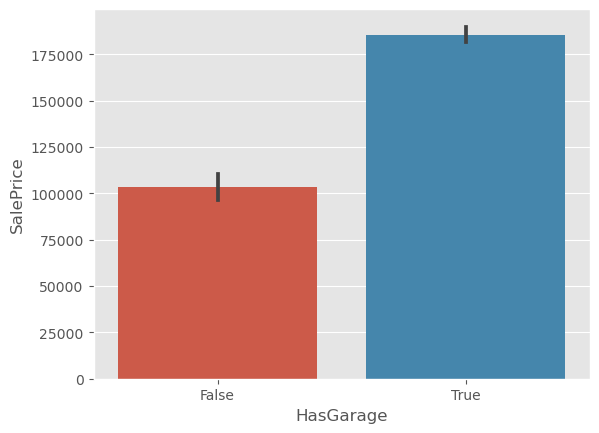

In [146]:
#HasGarage
train_df = df[df['train_test']=='train']
sns.barplot(x='HasGarage',y='SalePrice',data=train_df)
plt.show()

Looks like houses with a garage sells for significantly more compared to those without, which is not surprising.

Next, let's look at DiffHouseGarageYrs.

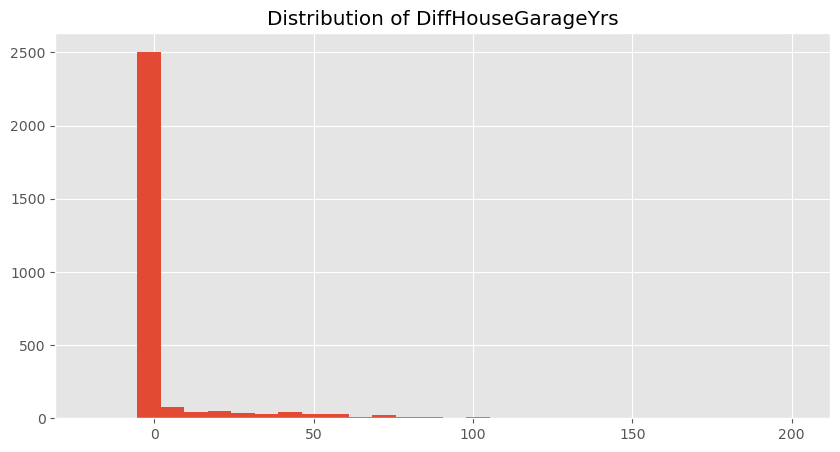

In [147]:
#DiffHouseGarageYrs
plt.figure(figsize=(10,5))
plt.hist(df['DiffHouseGarageYrs'],bins=30)
plt.title('Distribution of DiffHouseGarageYrs')
plt.show()

In [148]:
#Look at the value_counts
df['DiffHouseGarageYrs'].value_counts()

 0.0      2375
 1.0        95
 2.0        25
 3.0        15
 8.0        13
 10.0       12
 15.0       12
 5.0        12
 6.0        11
 18.0       11
 4.0        10
 50.0       10
 40.0       10
 7.0        10
 20.0        8
 37.0        8
 17.0        7
 25.0        7
 26.0        7
 46.0        7
-1.0         7
 21.0        7
 57.0        6
 9.0         6
 47.0        6
 14.0        6
 69.0        6
 30.0        6
 24.0        6
 45.0        6
 27.0        6
 35.0        6
 22.0        5
 39.0        5
 13.0        5
 33.0        5
 53.0        5
 12.0        5
 11.0        5
 60.0        4
 77.0        4
 56.0        4
 59.0        4
 31.0        4
 43.0        4
 41.0        4
 19.0        4
 44.0        4
 85.0        4
 32.0        4
 71.0        4
 62.0        4
 98.0        3
 36.0        3
 48.0        3
 64.0        3
 52.0        3
 58.0        3
 34.0        3
 42.0        3
 70.0        3
 49.0        3
 55.0        3
 38.0        3
 91.0        2
 54.0        2
-5.0      

So there's a lot of zeroes in the histogram. Let's remove the zeros, and see what remains and its relationship with the dependent variable.

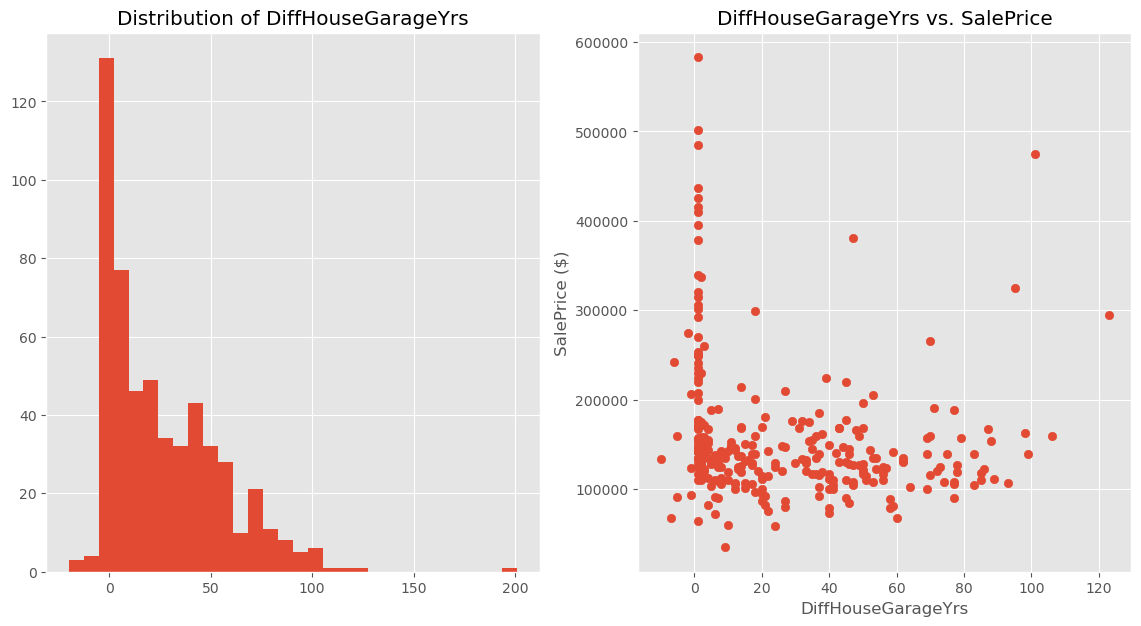

In [149]:
diff_no_zeros = df[df['DiffHouseGarageYrs']!=0]

plt.figure(figsize=(14,7))

plt.subplot(1,2,1)
plt.hist(diff_no_zeros['DiffHouseGarageYrs'],bins=30)
plt.title('Distribution of DiffHouseGarageYrs')

plt.subplot(1,2,2)
plt.scatter(diff_no_zeros['DiffHouseGarageYrs'],diff_no_zeros['SalePrice'])
plt.title('DiffHouseGarageYrs vs. SalePrice')
plt.xlabel('DiffHouseGarageYrs')
plt.ylabel('SalePrice ($)')
plt.show()

Looks like there are negative values for DiffHouseGarageYrs. That's unusual, though not entirely impossible. Let's look at that.

In [150]:
df[df['DiffHouseGarageYrs']<0]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
29      30          30       RM         60.0     6324   Pave   NaN      IR1   
93      94         190  C (all)         60.0     7200   Pave   NaN      Reg   
324    325          80       RL         96.0    11275   Pave   NaN      Reg   
600    601          60       RL         74.0    10927   Pave   NaN      Reg   
736    737          90       RL         60.0     8544   Pave   NaN      Reg   
1103  1104          20       RL         79.0     8910   Pave   NaN      Reg   
1376  1377          30       RL         52.0     6292   Pave   NaN      Reg   
1414  1415          50       RL         64.0    13053   Pave  Pave      Reg   
1418  1419          20       RL         71.0     9204   Pave   NaN      Reg   
61    1522          20       RL         80.0    10032   Pave   NaN      Reg   
116   1577          20       RL         64.0     7360   Pave   NaN      Reg   
345   1806          50       RM         68.0     4080   Pave  Grvl      Reg   
380   1841          90       RL          0.0    10547   Pave   NaN      IR1   
435   1896          50       RL         45.0     8212   Pave  Grvl      Reg   
437   1898          70       RL         43.0     5707   Pave   NaN      Reg   
662   2123          30       RM          0.0     6120   Pave   NaN      Reg   
803   2264          20       RL         52.0    51974   Pave   NaN      IR1   
1049  2510          20       RL         73.0     8760   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
29           Lvl    AllPub    Inside       Gtl      BrkSide      Feedr   
93           Lvl    AllPub    Corner       Gtl      OldTown       Norm   
324          Lvl    AllPub    Corner       Gtl        NAmes       PosN   
600          Lvl    AllPub    Inside       Gtl      NridgHt       Norm   
736          Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1103         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
1376         Bnk    AllPub    Inside       Gtl        SWISU       Norm   
1414         Bnk    AllPub    Inside       Gtl      BrkSide       Norm   
1418         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
61           Lvl    AllPub    Inside       Gtl        NAmes       Norm   
116          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
345          Lvl    AllPub    Inside       Gtl      OldTown       Norm   
380          Lvl    AllPub    Inside       Gtl      Edwards       Norm   
435          Lvl    AllPub    Inside       Gtl      Edwards       Norm   
437          Bnk    AllPub    Inside       Gtl        SWISU      Feedr   
662          Lvl    AllPub    Inside       Gtl      BrkSide       Norm   
803          Lvl    AllPub   CulDSac       Gtl      StoneBr       PosN   
1049         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
29         RRNn     1Fam     1Story            4            6       1927   
93         Norm   2fmCon     2.5Unf            6            6       1910   
324        Norm     1Fam       SLvl            7            7       1967   
600        Norm     1Fam     2Story            8            5       2005   
736        Norm   Duplex     1Story            3            4       1950   
1103       Norm     1Fam     1Story            6            6       1959   
1376       Norm     1Fam     1Story            6            5       1930   
1414       Norm     1Fam     1.5Fin            6            7       1923   
1418       Norm     1Fam     1Story            5            5       1963   
61         Norm     1Fam     1Story            6            5       1959   
116        Norm     1Fam     1Story            7            5       2010   
345        Norm     1Fam     1.5Fin            6            8       1935   
380        Norm   Duplex     SFoyer            5            5       1978   
435        Norm     1Fam     1.5Fin

I don't see anything funky in the sata, so we can keep these.

The above histogram also revealed three different concentrations for the difference in number of years between the build of a house and its garage-- 0-20, 30-50, 70-80, with an extraordinarily high concentration immediately after 0.

In [151]:
diff_no_zeros['DiffHouseGarageYrs'].value_counts()

 1.0      95
 2.0      25
 3.0      15
 8.0      13
 15.0     12
 5.0      12
 10.0     12
 18.0     11
 6.0      11
 7.0      10
 4.0      10
 40.0     10
 50.0     10
 37.0      8
 20.0      8
-1.0       7
 46.0      7
 17.0      7
 21.0      7
 26.0      7
 25.0      7
 24.0      6
 45.0      6
 27.0      6
 9.0       6
 47.0      6
 30.0      6
 57.0      6
 35.0      6
 14.0      6
 69.0      6
 22.0      5
 53.0      5
 39.0      5
 12.0      5
 33.0      5
 11.0      5
 13.0      5
 41.0      4
 56.0      4
 62.0      4
 85.0      4
 43.0      4
 32.0      4
 44.0      4
 77.0      4
 31.0      4
 71.0      4
 60.0      4
 19.0      4
 59.0      4
 36.0      3
 49.0      3
 64.0      3
 34.0      3
 42.0      3
 38.0      3
 52.0      3
 58.0      3
 70.0      3
 98.0      3
 55.0      3
 48.0      3
 72.0      2
-5.0       2
 75.0      2
 93.0      2
 28.0      2
 61.0      2
 91.0      2
 73.0      2
 83.0      2
 78.0      2
 74.0      2
 29.0      2
 51.0      2
 54.0      2

1 is a very popular number after 0, which does make sense. Houses with DiffGarageYrs equal to 1 have a wide range of SalePrice in the above scatterplot, so perhaps they will need to be removed. Ignoring the large number of DiffHouseGarageYrs near 0, the variable also seems to have a positive linear relationship with SalePrice.

Generally DiffHouseGarageYrs is positively correlated with the dependent variable. However, it doesn't seem to be a very large slope. 

There seem to be some outliers, which a log transformation might fix.

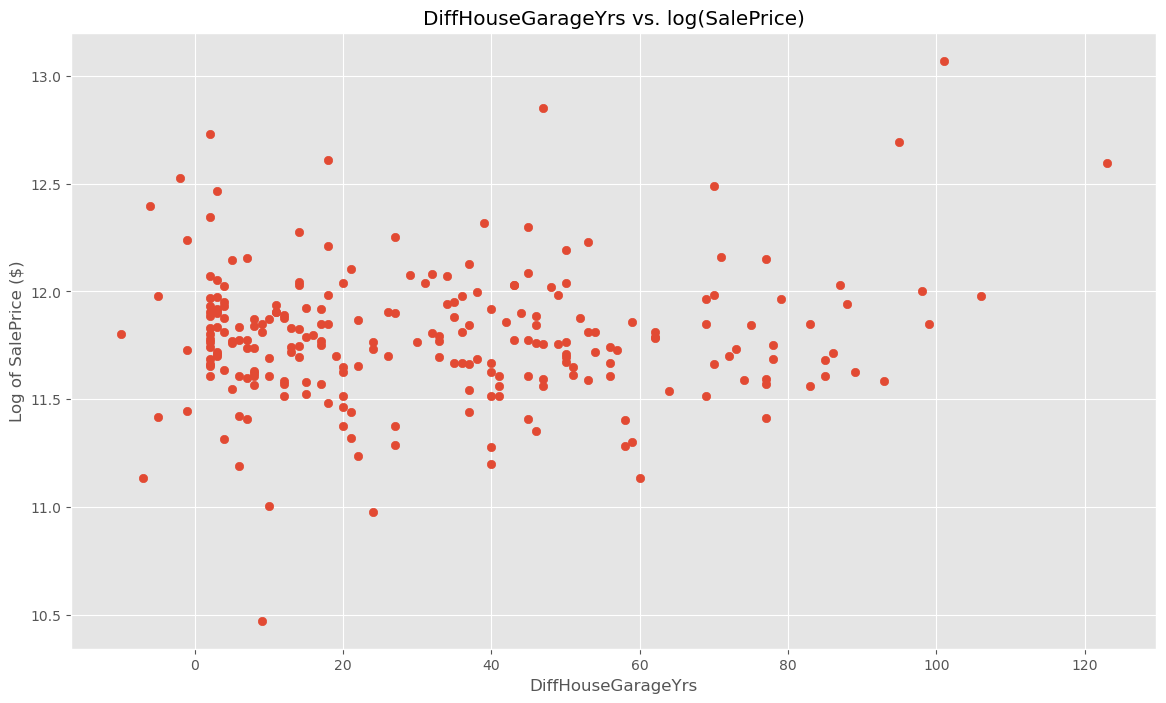

In [152]:
diff_no_lows = df[~df['DiffHouseGarageYrs'].isin([0,1])]

plt.figure(figsize=(14,8))

plt.scatter((diff_no_lows['DiffHouseGarageYrs']),np.log(diff_no_lows['SalePrice']))
plt.title('DiffHouseGarageYrs vs. log(SalePrice)')
plt.xlabel('DiffHouseGarageYrs')
plt.ylabel('Log of SalePrice ($)')
plt.show()

The linear relationship seems to be clearer after removing 1s and 0s from DiffHouseGarageYrs and a log transformation of SalePrice. 

I'll create a new category indicating if a DiffHouseGarageYrs of 1 or 0, since house with these values in DiffHouseGarageYrs have a significantly higher price compared to others. 

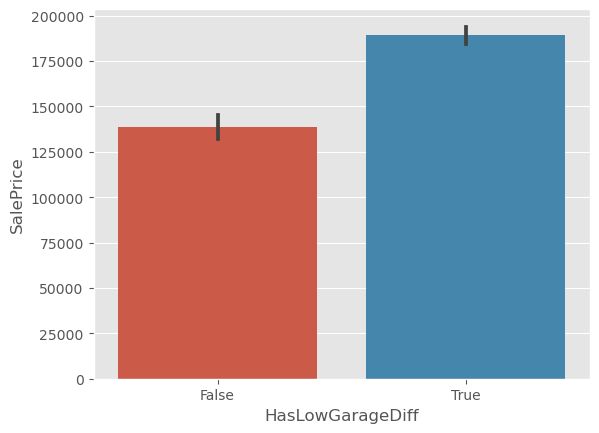

In [153]:
df['HasLowGarageDiff'] = df['DiffHouseGarageYrs'].isin([0,1])
sns.barplot(x='HasLowGarageDiff',y='SalePrice',data=df)
plt.show()

##### TotalBsmtSF - Total square feet of basement area (And other Basement Variables)

I suspect that these variables are like the Garage variables, where they are null because there wasn't a garage. Let's take a look:

In [154]:
df[df['TotalBsmtSF'].isnull()]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
660  2121          20       RM         99.0     5940   Pave   NaN      IR1   

    LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
660         Lvl    AllPub       FR3       Gtl      BrkSide      Feedr   

    Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
660       Norm     1Fam     1Story            4            7       1946   

     YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
660          1950     Gable  CompShg     MetalSd      CBlock       None   

     MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
660         0.0        TA        TA      PConc      NaN      NaN          NaN   

    BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
660          NaN         NaN          NaN         NaN        NaN          NaN   

    Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
660    GasA        TA          Y      FuseA       896         0             0   

     GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
660        896           NaN           NaN         1         0             2   

     KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces  \
660             1          TA             4        Typ           0   

    FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea  \
660         NaN     Detchd       1946.0          Unf         1.0       280.0   

    GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
660         TA         TA          Y           0            0              0   

     3SsnPorch  ScreenPorch  PoolArea PoolQC  Fence MiscFeature  MiscVal  \
660          0            0         0    NaN  MnPrv         NaN        0   

     MoSold  YrSold SaleType SaleCondition  SalePrice train_test  HasGarage  \
660       4    2008    ConLD       Abnorml        NaN       test       True   

     DiffHouseGarageYrs  HasLowGarageDiff  
660                 0.0              True

Looks like that's the case for TotalBsmtSF and most of the other basement variables. I see that BsmtHalfBath and BsmtFullBath don't have the same percentages as the rest, though, so let's take a look at these too.

In [155]:
df[df['BsmtHalfBath'].isnull()]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
660  2121          20       RM         99.0     5940   Pave   NaN      IR1   
728  2189          20       RL        123.0    47007   Pave   NaN      IR1   

    LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
660         Lvl    AllPub       FR3       Gtl      BrkSide      Feedr   
728         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

    Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
660       Norm     1Fam     1Story            4            7       1946   
728       Norm     1Fam     1Story            5            7       1959   

     YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
660          1950     Gable  CompShg     MetalSd      CBlock       None   
728          1996     Gable  CompShg     Plywood     Plywood       None   

     MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
660         0.0        TA        TA      PConc      NaN      NaN          NaN   
728         0.0        TA        TA       Slab      NaN      NaN          NaN   

    BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
660          NaN         NaN          NaN         NaN        NaN          NaN   
728          NaN         0.0          NaN         0.0        0.0          0.0   

    Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
660    GasA        TA          Y      FuseA       896         0             0   
728    GasA        TA          Y      SBrkr      3820         0             0   

     GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
660        896           NaN           NaN         1         0             2   
728       3820           NaN           NaN         3         1             5   

     KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces  \
660             1          TA             4        Typ           0   
728             1          Ex            11        Typ           2   

    FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea  \
660         NaN     Detchd       1946.0          Unf         1.0       280.0   
728          Gd     Attchd       1959.0          Unf         2.0       624.0   

    GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
660         TA         TA          Y           0            0              0   
728         TA         TA          Y           0          372              0   

     3SsnPorch  ScreenPorch  PoolArea PoolQC  Fence MiscFeature  MiscVal  \
660          0            0         0    NaN  MnPrv         NaN        0   
728          0            0         0    NaN    NaN         NaN        0   

     MoSold  YrSold SaleType SaleCondition  SalePrice train_test  HasGarage  \
660       4    2008    ConLD       Abnorml        NaN       test       True   
728       7    2008       WD        Normal        NaN       test       True   

     DiffHouseGarageYrs  HasLowGarageDiff  
660                 0.0              True  
728                 0.0              True

In [156]:
df[df['BsmtFullBath'].isnull()]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
660  2121          20       RM         99.0     5940   Pave   NaN      IR1   
728  2189          20       RL        123.0    47007   Pave   NaN      IR1   

    LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
660         Lvl    AllPub       FR3       Gtl      BrkSide      Feedr   
728         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

    Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
660       Norm     1Fam     1Story            4            7       1946   
728       Norm     1Fam     1Story            5            7       1959   

     YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
660          1950     Gable  CompShg     MetalSd      CBlock       None   
728          1996     Gable  CompShg     Plywood     Plywood       None   

     MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
660         0.0        TA        TA      PConc      NaN      NaN          NaN   
728         0.0        TA        TA       Slab      NaN      NaN          NaN   

    BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
660          NaN         NaN          NaN         NaN        NaN          NaN   
728          NaN         0.0          NaN         0.0        0.0          0.0   

    Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
660    GasA        TA          Y      FuseA       896         0             0   
728    GasA        TA          Y      SBrkr      3820         0             0   

     GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
660        896           NaN           NaN         1         0             2   
728       3820           NaN           NaN         3         1             5   

     KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces  \
660             1          TA             4        Typ           0   
728             1          Ex            11        Typ           2   

    FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea  \
660         NaN     Detchd       1946.0          Unf         1.0       280.0   
728          Gd     Attchd       1959.0          Unf         2.0       624.0   

    GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
660         TA         TA          Y           0            0              0   
728         TA         TA          Y           0          372              0   

     3SsnPorch  ScreenPorch  PoolArea PoolQC  Fence MiscFeature  MiscVal  \
660          0            0         0    NaN  MnPrv         NaN        0   
728          0            0         0    NaN    NaN         NaN        0   

     MoSold  YrSold SaleType SaleCondition  SalePrice train_test  HasGarage  \
660       4    2008    ConLD       Abnorml        NaN       test       True   
728       7    2008       WD        Normal        NaN       test       True   

     DiffHouseGarageYrs  HasLowGarageDiff  
660                 0.0              True  
728                 0.0              True

So looks like we could fill these variables in with zero, too.

In [157]:
for x in [x for x in numcol_nulls.column if 'Bsmt' in x]:
    df[x] = df[x].fillna(0)

### Categorical Variables

As with the numerical variables, we'll begin by filling in all missing values in the columns.

Reading the documentation, I noticed a common pattern for all of these columns aside from "Electrical": null values are said to mean that the variable is not applicable for the house. Thus, I filled these nulls with the string 'None'.

Notably, a few of these ('FireplaceQu','GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC') are really continuous measurements encoded with words and should be converted to integers. I will do so later. But let's fill in missing values first.

As for "Electrical", let's take a look at the problematic row. 

In [158]:
for col in null_cols:
    if col != 'Electrical':
        df[col] = df[col].fillna('None')

In [159]:
df[df['Electrical'].isnull()]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1379  1380          80       RL         73.0     9735   Pave  None      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
1379         Lvl    AllPub    Inside       Gtl       Timber       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
1379       Norm     1Fam       SLvl            5            5       2006   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
1379          2007     Gable  CompShg     VinylSd     VinylSd       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
1379         0.0        TA        TA      PConc       Gd       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
1379           No          Unf         0.0          Unf         0.0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
1379      384.0        384.0    GasA        Gd          Y        NaN   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
1379       754       640             0       1394           0.0           0.0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
1379         2         1             3             1          Gd   

      TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt  \
1379             7        Typ           0        None    BuiltIn       2007.0   

     GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  \
1379          Fin         2.0       400.0         TA         TA          Y   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
1379         100            0              0          0            0   

      PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold SaleType  \
1379         0   None  None        None        0       5    2008       WD   

     SaleCondition SalePrice train_test  HasGarage  DiffHouseGarageYrs  \
1379        Normal  167500.0      train       True                 1.0   

      HasLowGarageDiff  
1379              True

As we can see from below, this column is predominantly one value. There doesn't seem to be anything particularly special about the row with the missing data, so it's reasonable to assume that it would have the same value as the majority.

In [160]:
df['Electrical'].value_counts()

SBrkr    2671
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: Electrical, dtype: int64

In [161]:
df['Electrical'] = df['Electrical'].fillna('SBrkr')

# More in depth examination of the variables.

To begin with, let's take a look at our dependent variable.

### Examining our target variable (SalePrice)

To begin with, let's look at the target variable, examining both its summary statistics and plotting it in a boxplot and histogram.

In [162]:
#Look at the information in describe
df['SalePrice'].describe()

count     2919
unique     664
top       None
freq      1459
Name: SalePrice, dtype: object

/tmp/ipykernel_103485/3255541439.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, ax=ax_hist, kde=False, rug=True, norm_hist=False)


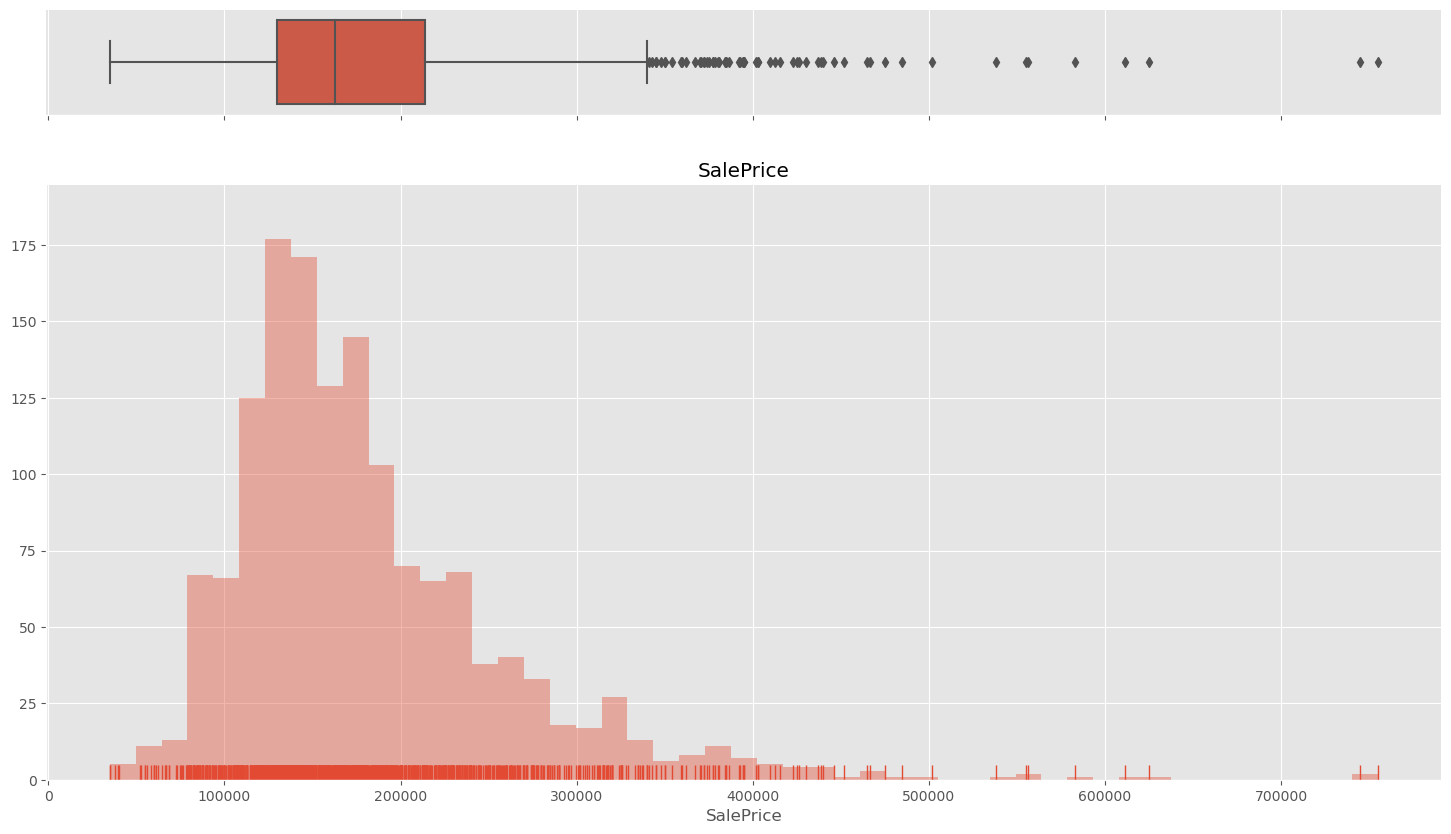

In [163]:
#Plot the Target Variable from the Train dataset in boxplot + histogram and rug plot.
x = df_train['SalePrice']

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize=(18,10))
sns.boxplot(x, ax=ax_box, orient='h')
plt.title('SalePrice')
sns.distplot(x, ax=ax_hist, kde=False, rug=True, norm_hist=False)

ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)
plt.show()

Looks like the data is skewed to the right. Let's look at its kurtosis and skew.

In [164]:
#Ideally both should be zero.
df_train['SalePrice'].kurt()

6.536281860064529

In [165]:
#Ideally both should be zero.
df_train['SalePrice'].skew()

1.8828757597682129

The values confirm what I thought, which is that the distribution is not normal. Let's prove this using 1) The QQ plot, and 2)The D'Agostino test. Since our sample is >20 (1400 something), it satisfies the requirements for 2).

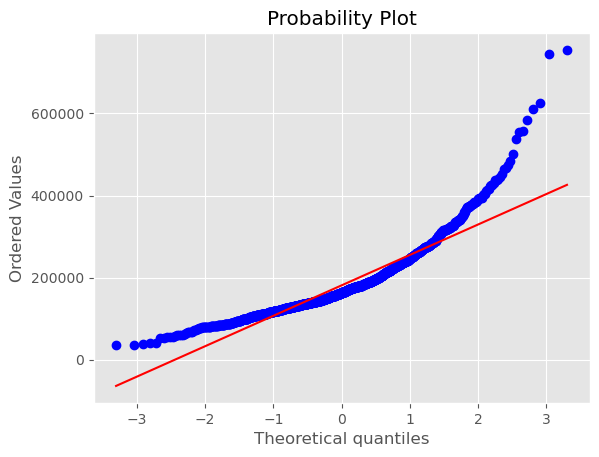

In [166]:
stats.probplot(x, dist="norm", plot=pylab)
pylab.show()

In [167]:
#Definitely doesn't follow a straight line.
f, p = stats.normaltest(x)
"The p-value of the D'Agostino test for normalcy is %.3f , with an alpha of 0.05" % p 

"The p-value of the D'Agostino test for normalcy is 0.000 , with an alpha of 0.05"

So the SalePrice is not normal in our data. Below I took the natural log of it, and see if tht changed anything.

/tmp/ipykernel_103485/3591137083.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, ax=ax_hist, kde=False, rug=True, norm_hist=False)


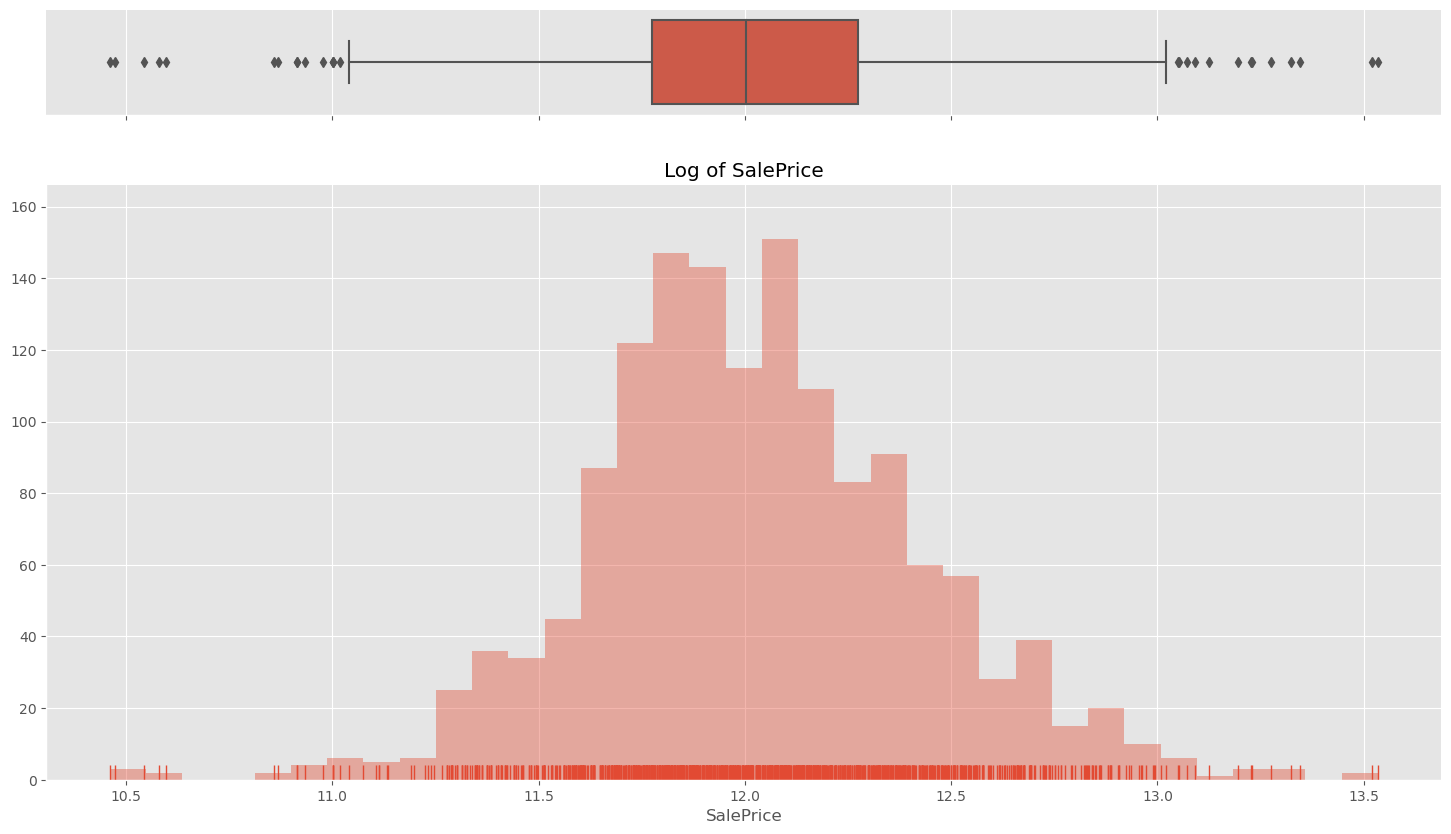

In [168]:
#Boxplot + Histogram
x = np.log(df_train['SalePrice'])

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize=(18,10))
sns.boxplot(x, ax=ax_box, orient = 'h')
plt.title('Log of SalePrice')
sns.distplot(x, ax=ax_hist, kde=False, rug=True, norm_hist=False)

ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)
plt.show()

It certainly looks more normal now, even though there are outliers to both sides. Is it normal, though?

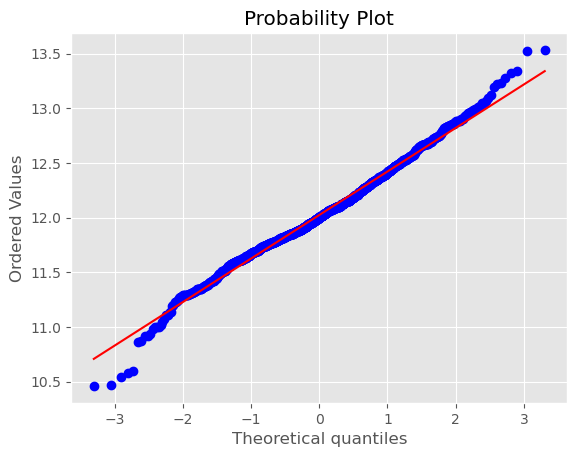

In [169]:
#Normality test and QQ plot
stats.probplot(x, dist="norm", plot=pylab)
pylab.show()

In [170]:
f, p = stats.normaltest(x)
stmt = """The kurtosis of log(SalePrice) is %.3f, the skew is %.3f, and The p-value of the D'Agostino test for normalcy is %.3f ,
with an alpha of 0.05.""" % (x.kurt(), x.skew(), p)
print(stmt)

The kurtosis of log(SalePrice) is 0.810, the skew is 0.121, and The p-value of the D'Agostino test for normalcy is 0.000 ,
with an alpha of 0.05.


No. If we do end up needing a normal dependent variable, a stronger transformation is needed. Or we need to remove some outliers.

### Looking at the remaining variables.
I separated all of the remaining variables into several groups. For each group, I'll 1) view the distribution of the values in the column (Barplot for Categorical, Histogram for Numerical), 2) view the variables' relationships with SalePrice (Barplot for categorical, Scatterplot for numerical), as well as 3) any relationship between the variable that may be going on. I'll make some simple conversions and observations, and perhaps some rudimentary feature engineering.

To start with, I will define some functions that enables me to draw graphs more quickly.

In [171]:
#Plots Distributions of Column Values:
def plot_dists(cols):
    n_rows = len(cols)//2 + 1
    plt.figure(figsize=(16,7*n_rows))
    plt.title('Distribution for the columns: '+' ,'.join(cols))
    for i in range(len(cols)):
        #Create subplots
        plt.subplot(n_rows,2,i+1)
        #Numerical variables
        if df[cols[i]].dtype in ['int64','float64']:
            plt.hist(df[cols[i]])
            plt.xlabel(cols[i])
        else:
        #Categorical variables
            barplot = sns.countplot(x=df[cols[i]])
            [item.set_rotation(45) for item in barplot.get_xticklabels()]
            
#Plots variables against SalePrice
def vs_price(cols, log=False):
    n_rows = len(cols)//2 + 1
    plt.figure(figsize=(16,7*n_rows))
    df_train = df[df['train_test']=='train']
    if log == True:
        target = np.log(df_train['SalePrice'])
    else:
        target = (df_train['SalePrice'])
    for i in range(len(cols)):
        #Create subplots
        plt.subplot(n_rows,2,i+1)
        #Numerical variables
        if df_train[cols[i]].dtype in ['int64','float64']:
            plt.scatter(df_train[cols[i]],target)
            plt.xlabel(cols[i])
            plt.ylabel('SalePrice')
        else:
        #Categorical variables
            barplot = sns.barplot(y=target,x=df_train[cols[i]])
            [item.set_rotation(45) for item in barplot.get_xticklabels()]
    plt.show()

## "Subjective" overall measurements of the house.

In [172]:
cols = ['OverallQual','OverallCond','ExterQual','ExterCond','Functional']

To begin with, while ExterQual and ExterCond appear categorical, they're really numerical measurements. For example, the description for ExterQual appears below:
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
     
This really is a scale measurement, ranging from Poor to Excellent. Thus, I converted columns with these "categorical" measurements to numerical, with 0 being none present, 1 being Poor, and 4 being excellent.

In [173]:
external_d = {'None':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}
df['ExterQual'] = df['ExterQual'].map(external_d)
df['ExterCond'] = df['ExterCond'].map(external_d)

The same can be said for the "Functional" column also. The description appears below; like ExterQual and ExterCond shown above, it is a scale, ranging from Typical Functionality to Salvage only.

       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only
    
0 will be Typical, and 7 will be salvage only. I expect this variable to have a negative correlation with the dependent variable.

In [174]:
functional_d = {'None':0, 'Typ':0, 'Min1':1, 'Maj1':4, 'Min2':2, 'Mod':3, 'Maj2':5, 'Sev':6, 'Sal':7}
df['Functional'] = df['Functional'].fillna('Typ')
df['Functional'] = df['Functional'].map(functional_d)

/tmp/ipykernel_103485/2017967103.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(n_rows,2,i+1)


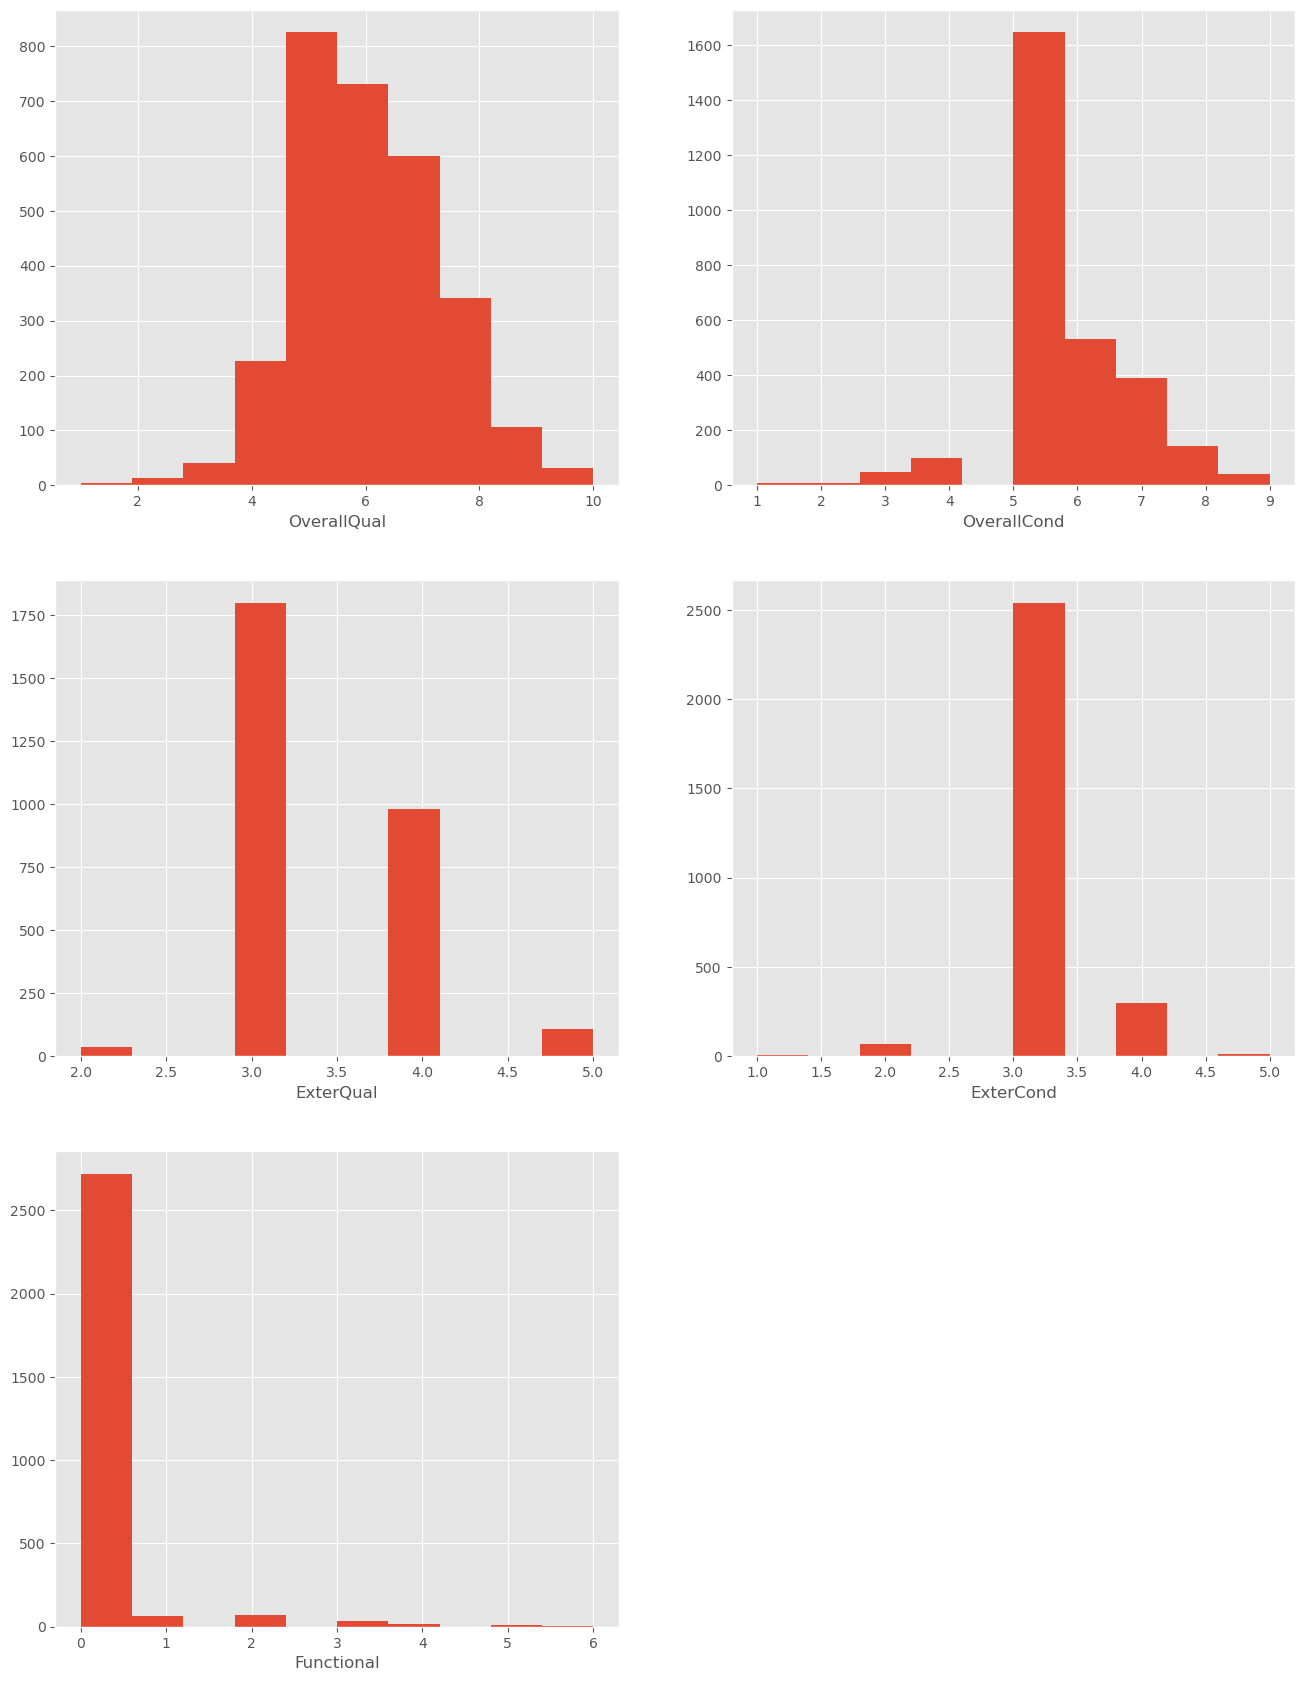

In [175]:
plot_dists(cols)

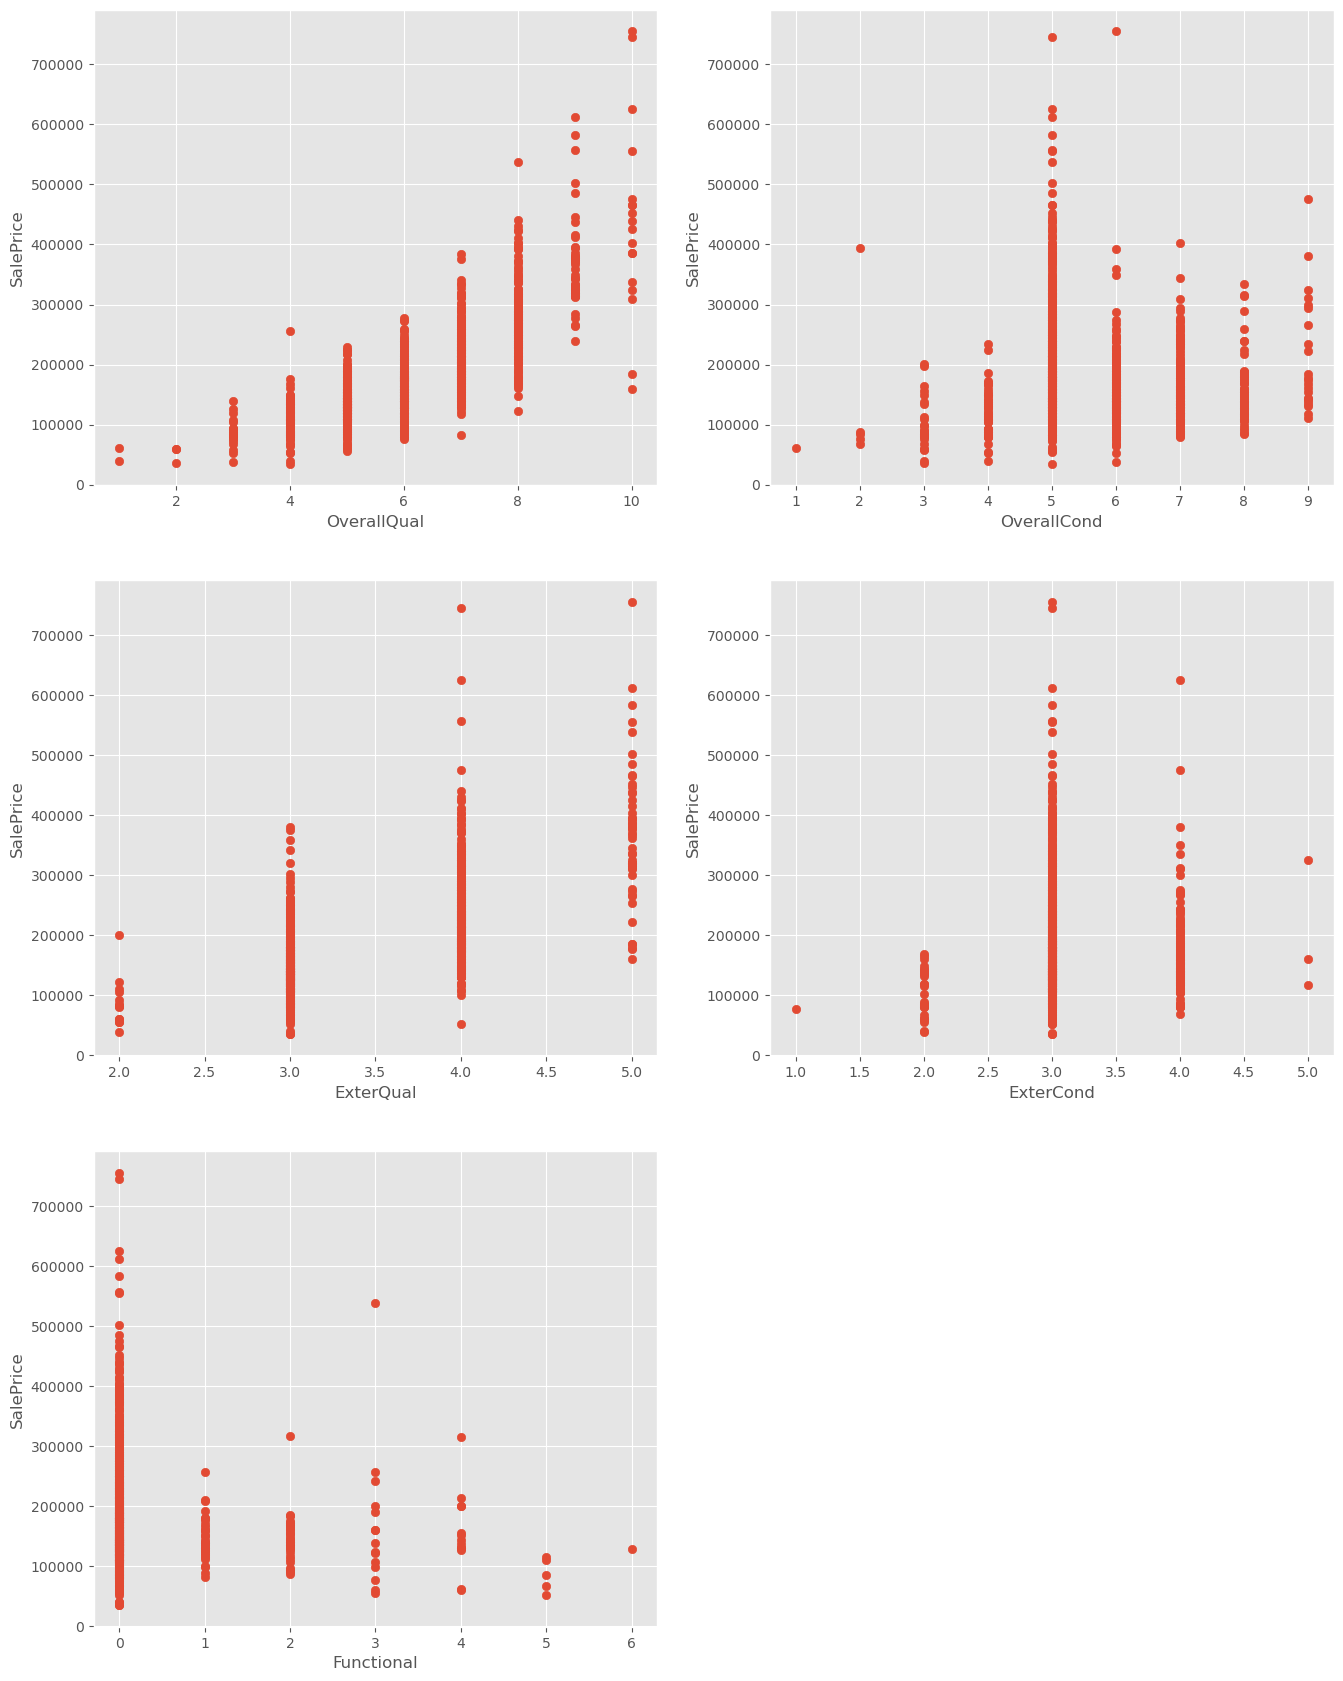

In [176]:
vs_price(cols)

OverallQual, ExterQual, and Functional were all to our expectations. However, the linear relationship SalePrice has with ExterCond and OverallCond was not as obvious as one'd expect. Why would this be the case? 

Probably because the middle in both variables represent "average", and while not being in bad condition would increase the price, there are many other factors at play when it comes to the price of the house. This makes me wonder about their importance as variables, though.

I wonder if there's a linear relationship between ExterQual vs OverallQual, likewise between ExterCond and OverallCond.

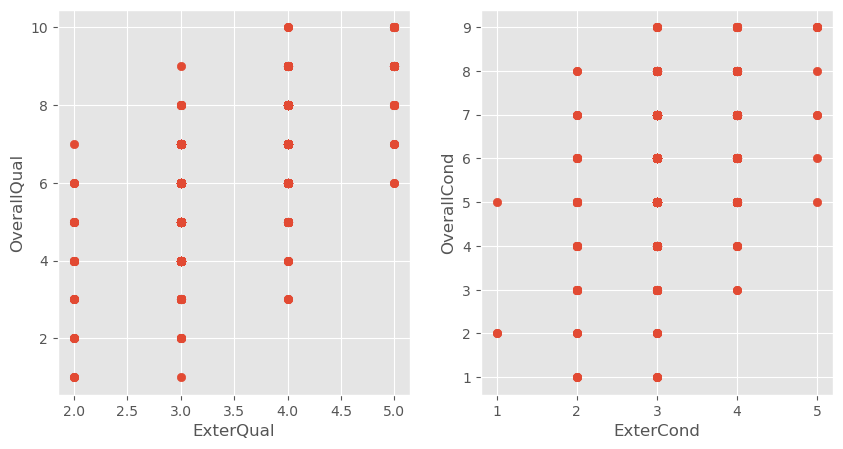

In [177]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)

plt.scatter(df['ExterQual'],df['OverallQual'])
plt.xlabel('ExterQual')
plt.ylabel('OverallQual')

plt.subplot(1,2,2)
plt.scatter(df['ExterCond'],df['OverallCond'])
plt.xlabel('ExterCond')
plt.ylabel('OverallCond')

plt.show()

So looks like there is a relationship, but not entirely linear. For example, in ExterQual vs OverallQual, higher ExterQual generally correlated with higher OverallQual, but with ExterQual = 1 the OverallQual ranged from 0 to 7. Looks like other factors determine OverallQual aside from ExterQual.


## Properties of the sale itself.

In [178]:
cols = ['MoSold','YrSold','SaleType','SaleCondition']

MoSold and YrSold are really categorical variables, even though they have numbers in them. Thus, I will convert them to such before plotting them.

/tmp/ipykernel_103485/2017967103.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(n_rows,2,i+1)


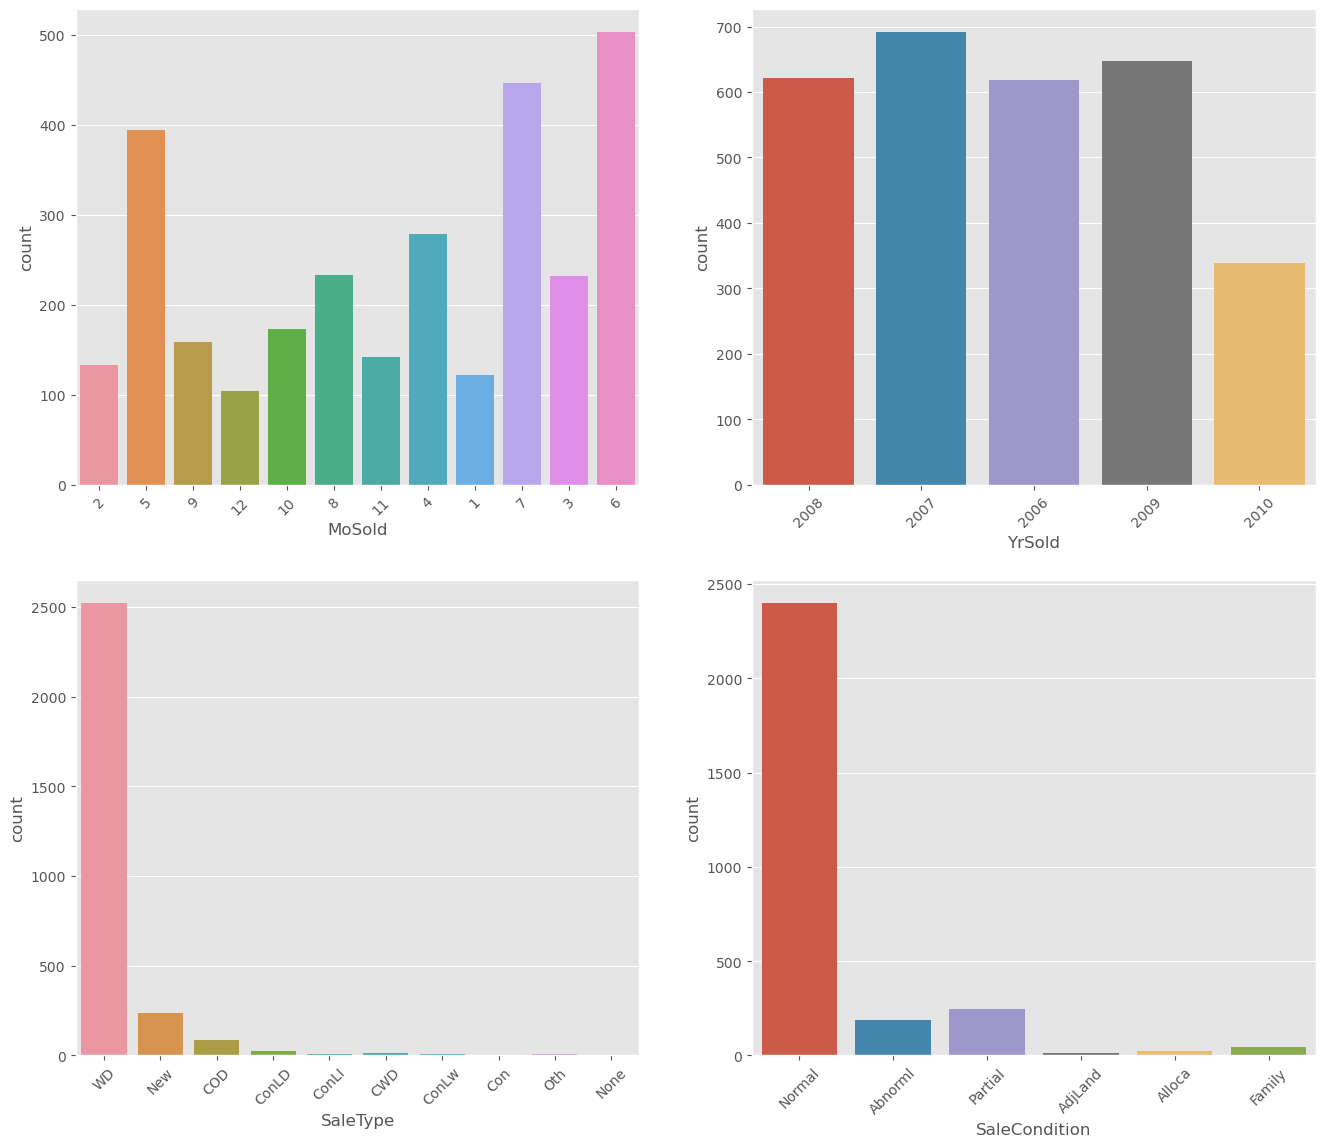

In [179]:
df['MoSold'] = df['MoSold'].astype('str')
df['YrSold'] = df['YrSold'].astype('str')

plot_dists(cols)

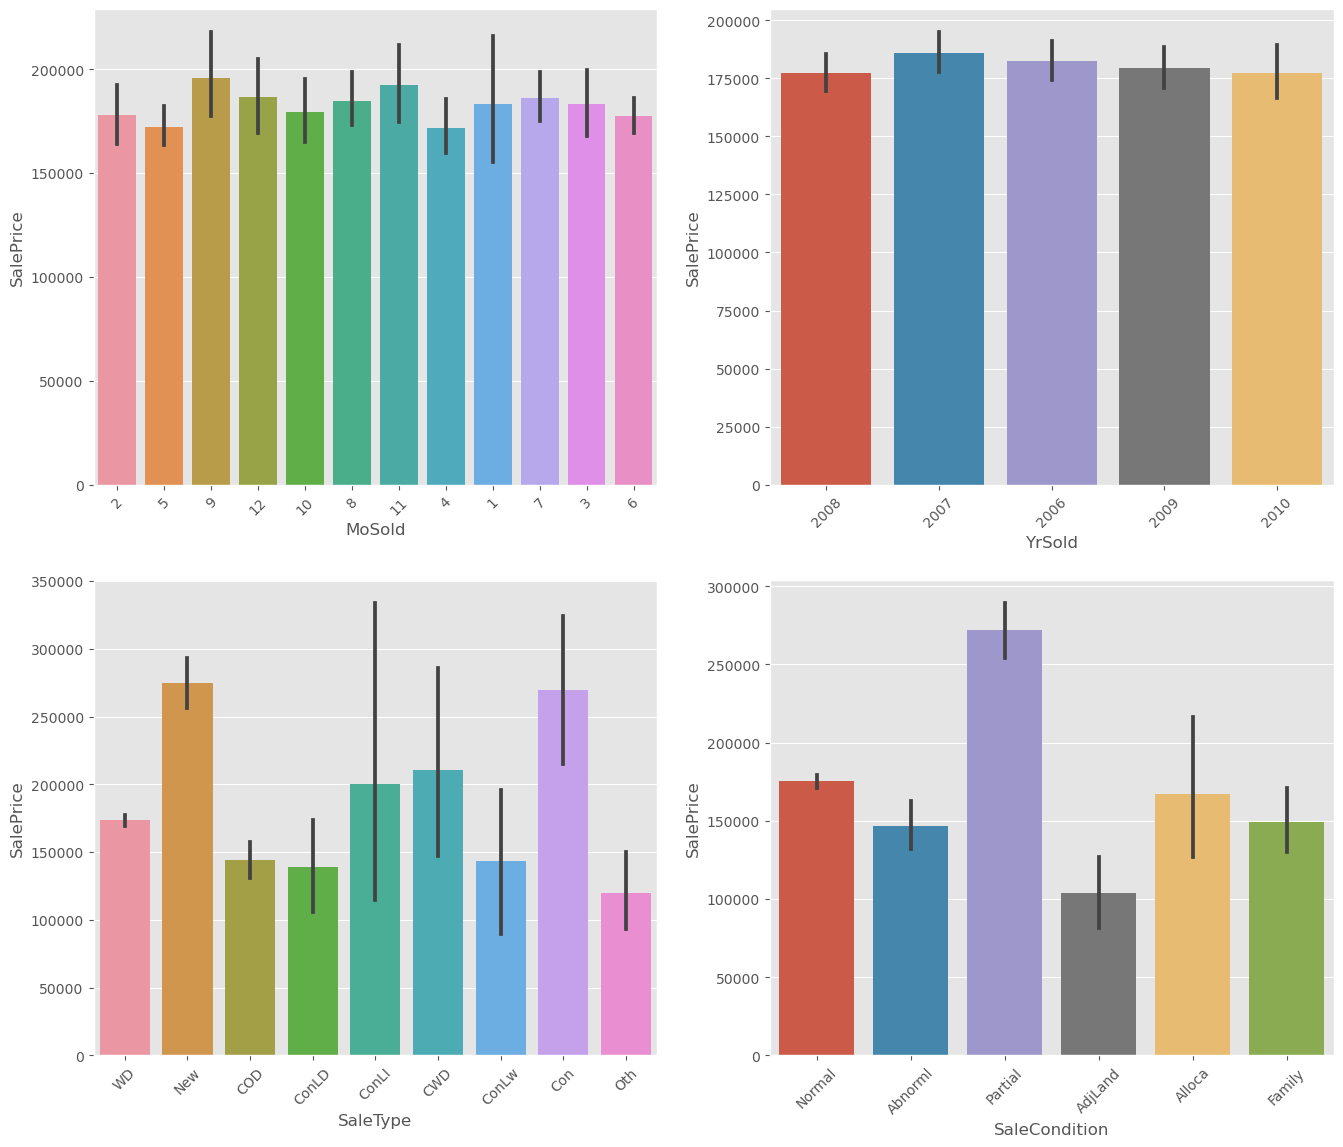

In [180]:
vs_price(cols)

Judging from the graphs above, the month and year of the sale have no significant impact on the house's price. I wonder, though, if I can find any time-series based indicators by converting the Year and Month to datetime. 

In the below chart I plotted the median SalePrice for each date, along with the 25% and 75% percentiles to give a better idea of what the values look like.

/tmp/ipykernel_103485/3173627326.py:4: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  date_sold = pd.to_datetime(date_sold,format='%Y-%m').astype('datetime64')


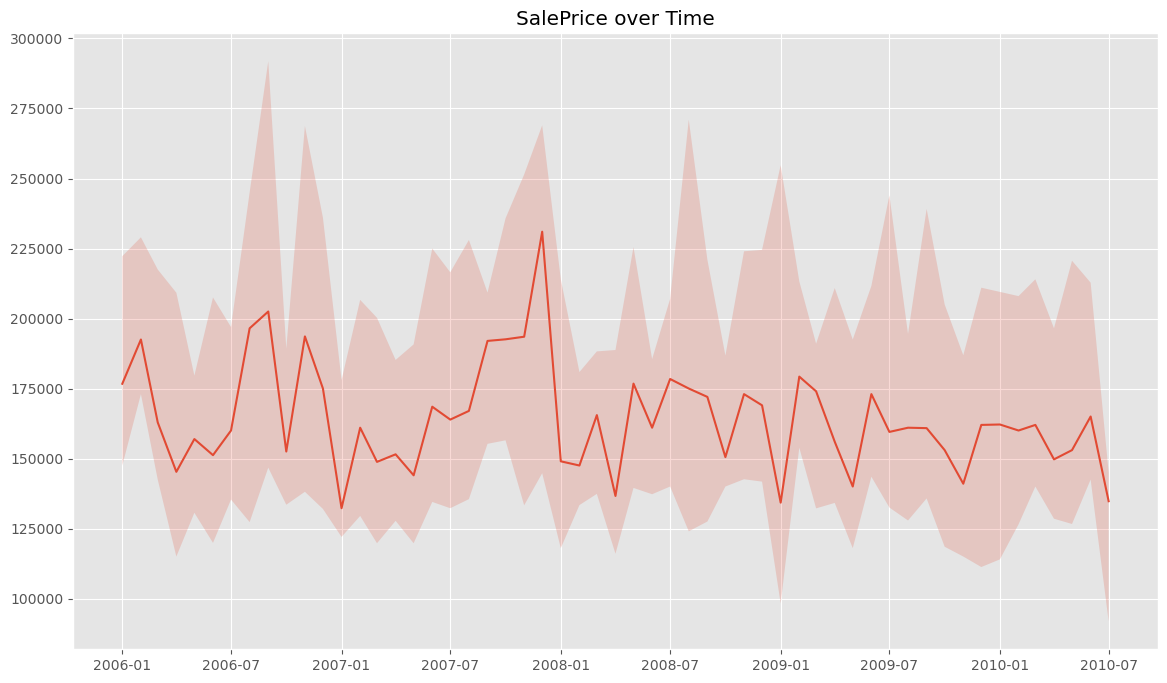

In [181]:
#I need the SalePrice to not be null for the following, so switched over to df_train

date_sold = df_train['YrSold'].astype('str') + '-' + df_train['MoSold'].astype('str')
date_sold = pd.to_datetime(date_sold,format='%Y-%m').astype('datetime64')
date_price = df_train['SalePrice'].groupby(date_sold)

plt.figure(figsize=(14,8))
plt.title('SalePrice over Time')
plt.plot(date_price.median())
plt.fill_between(date_price.size().index,date_price.quantile(0.25),date_price.quantile(0.75),alpha=0.2)
plt.show()

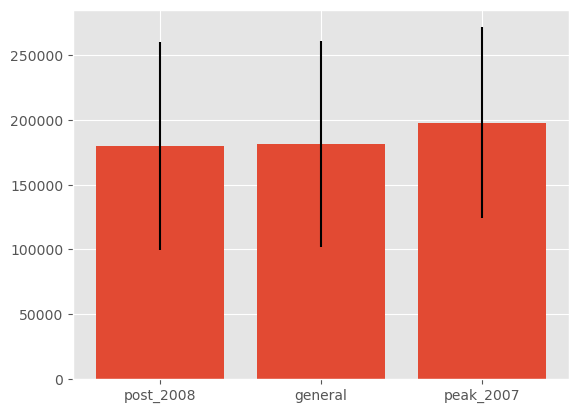

In [182]:
post_2008 = df_train['SalePrice'][date_sold>"2008-07"]
general = df_train['SalePrice']
peak_2007 = df_train['SalePrice'][(date_sold>"2007-07")&(date_sold<"2008-01")]

means = [np.mean(post_2008),np.mean(general),np.mean(peak_2007)]
stds = [np.std(post_2008),np.std(general),np.std(peak_2007)]

plt.bar(["post_2008","general","peak_2007"],means,yerr=stds)
plt.show()

The difference isn't significant. However, this might be useful information to consider.

On the other hand, a few options in the type and conditions of sale appears to yield significantly different prices. The options are listed as below:

SaleType: Type of sale
		
       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other

SaleCondition: Condition of sale

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)
       
Homes just constructed and those sold with 15% Down payment regular terms appear to have a higher price, and so do homes not completed when last assessed. On the other hand, Conventional warranty deeds, Court Officer Deed/Estate, Contract Low down, abnormal sales, and adjoinging land purchases correspond with lower prices in SaleCondition.

## General House Descriptors.

In [183]:
cols = ['MSSubClass','BldgType','HouseStyle','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','YearBuilt','YearRemodAdd']

MSSubClass, upon reading the description, really should be a categorical variable. Let us convert it, and the visualize the effects.

In [184]:
df['MSSubClass'] = df['MSSubClass'].astype('str')

Below find the description for MSSubClass. Looking at the barplot below, 20, 60, and 120 are correlated with higher prices while 30, 45, and 180 are correlated with lower prices. 

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES
       

/tmp/ipykernel_103485/2017967103.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(n_rows,2,i+1)


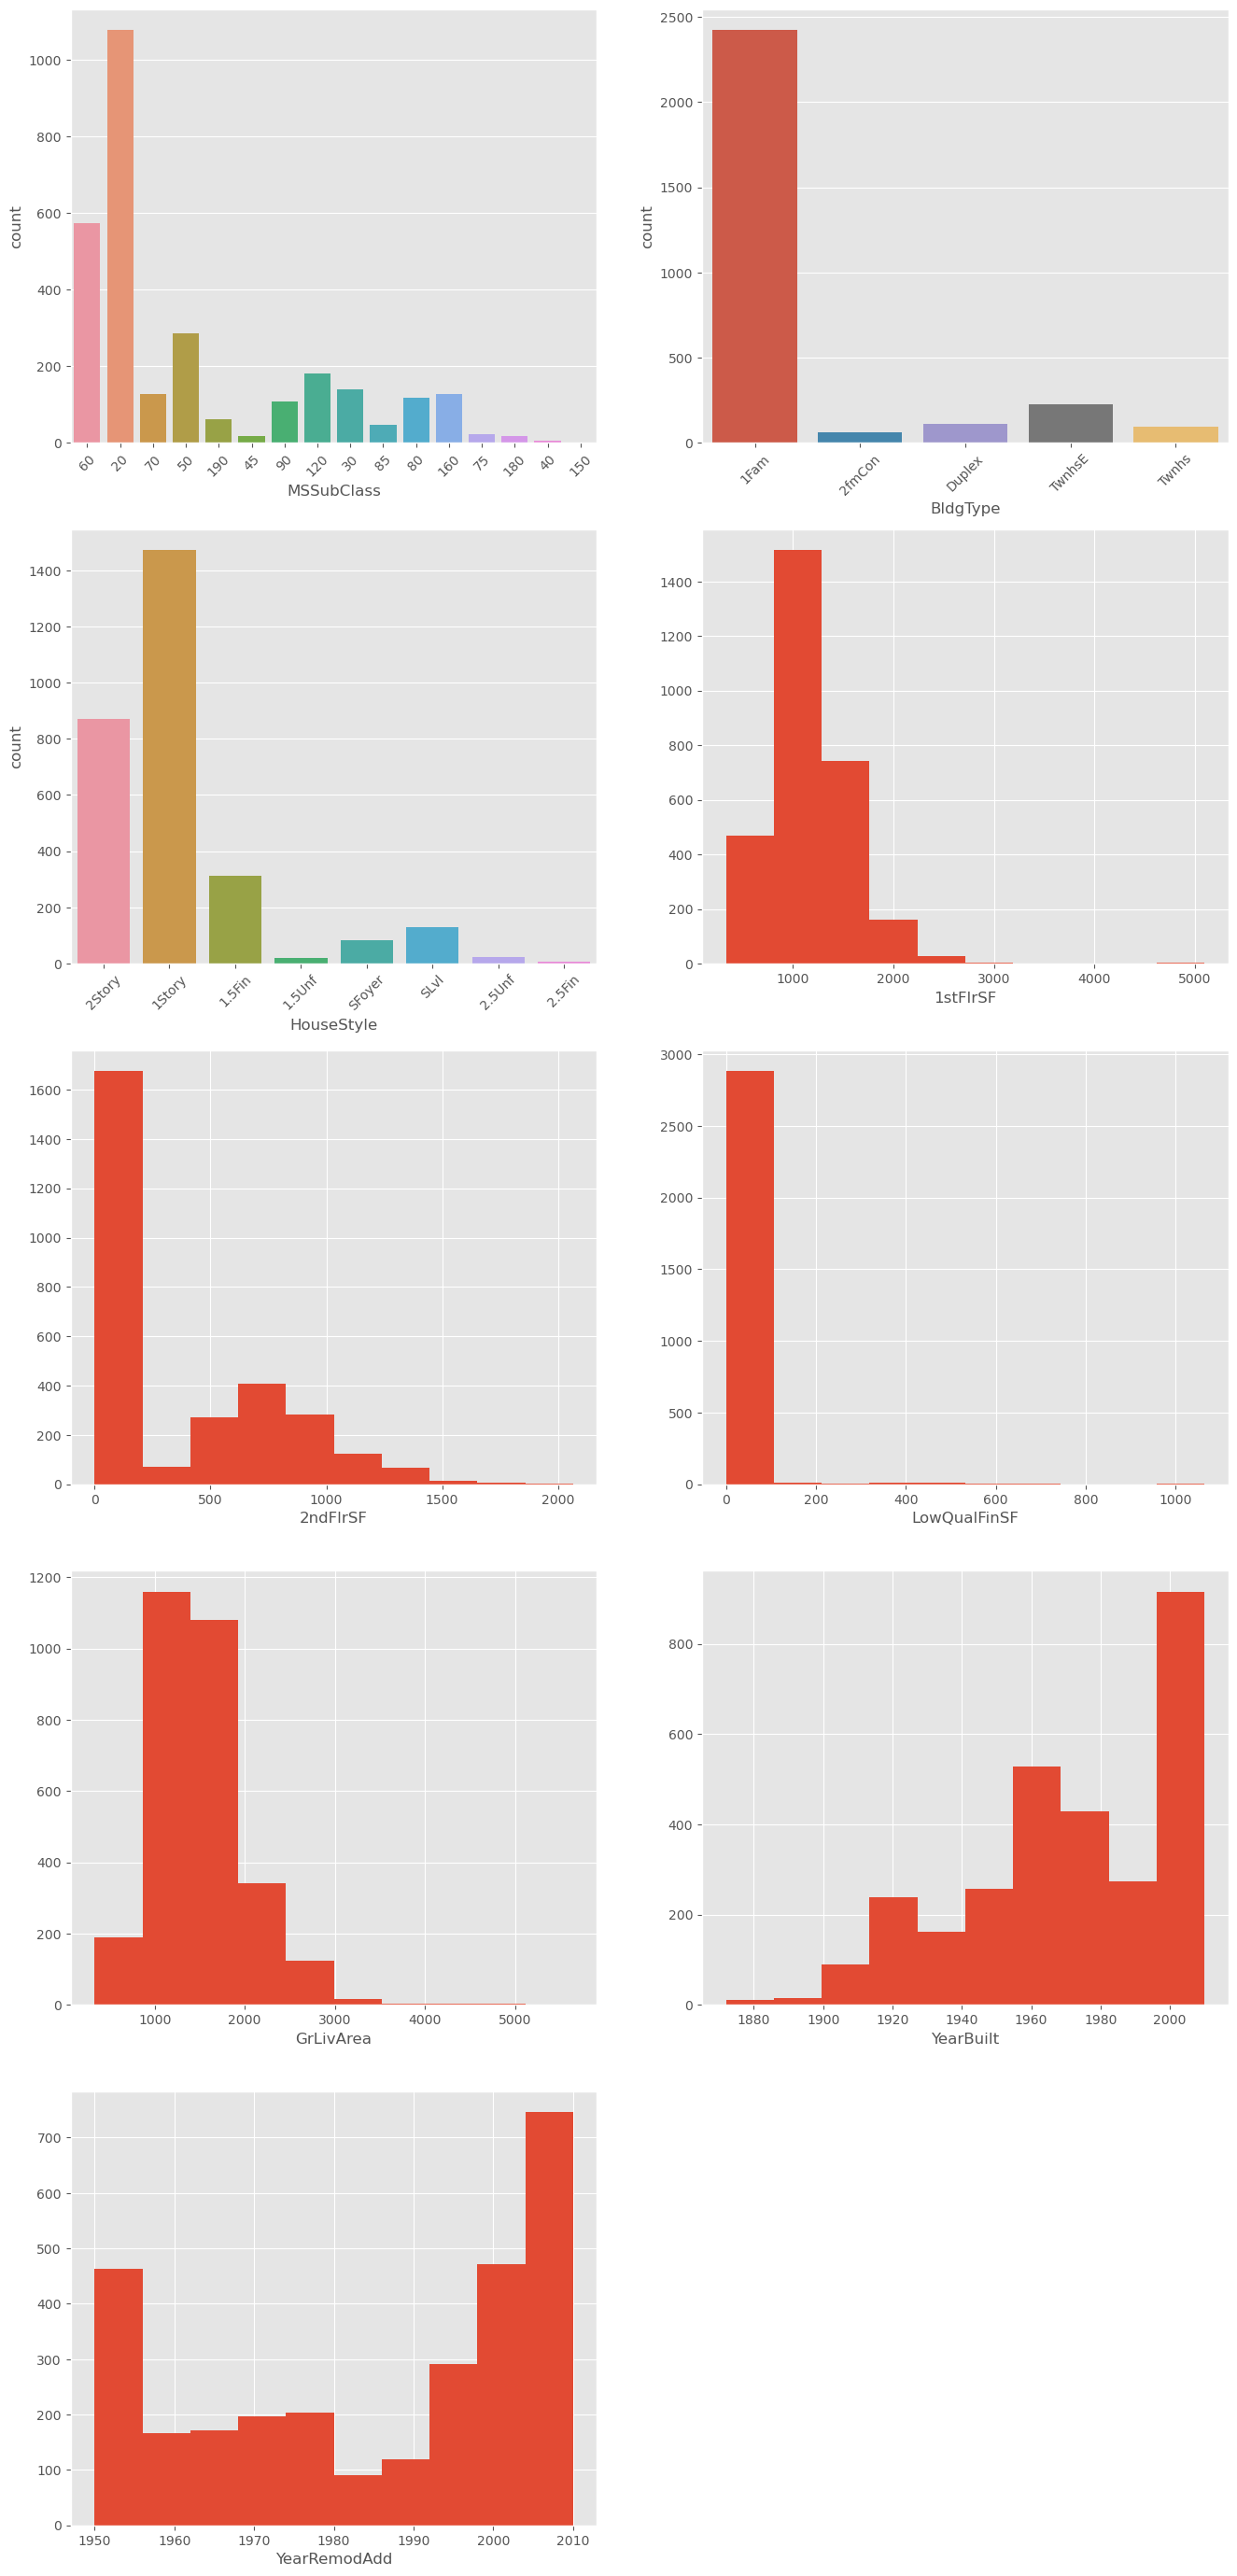

In [185]:
#Distribution of Values
plot_dists(cols)

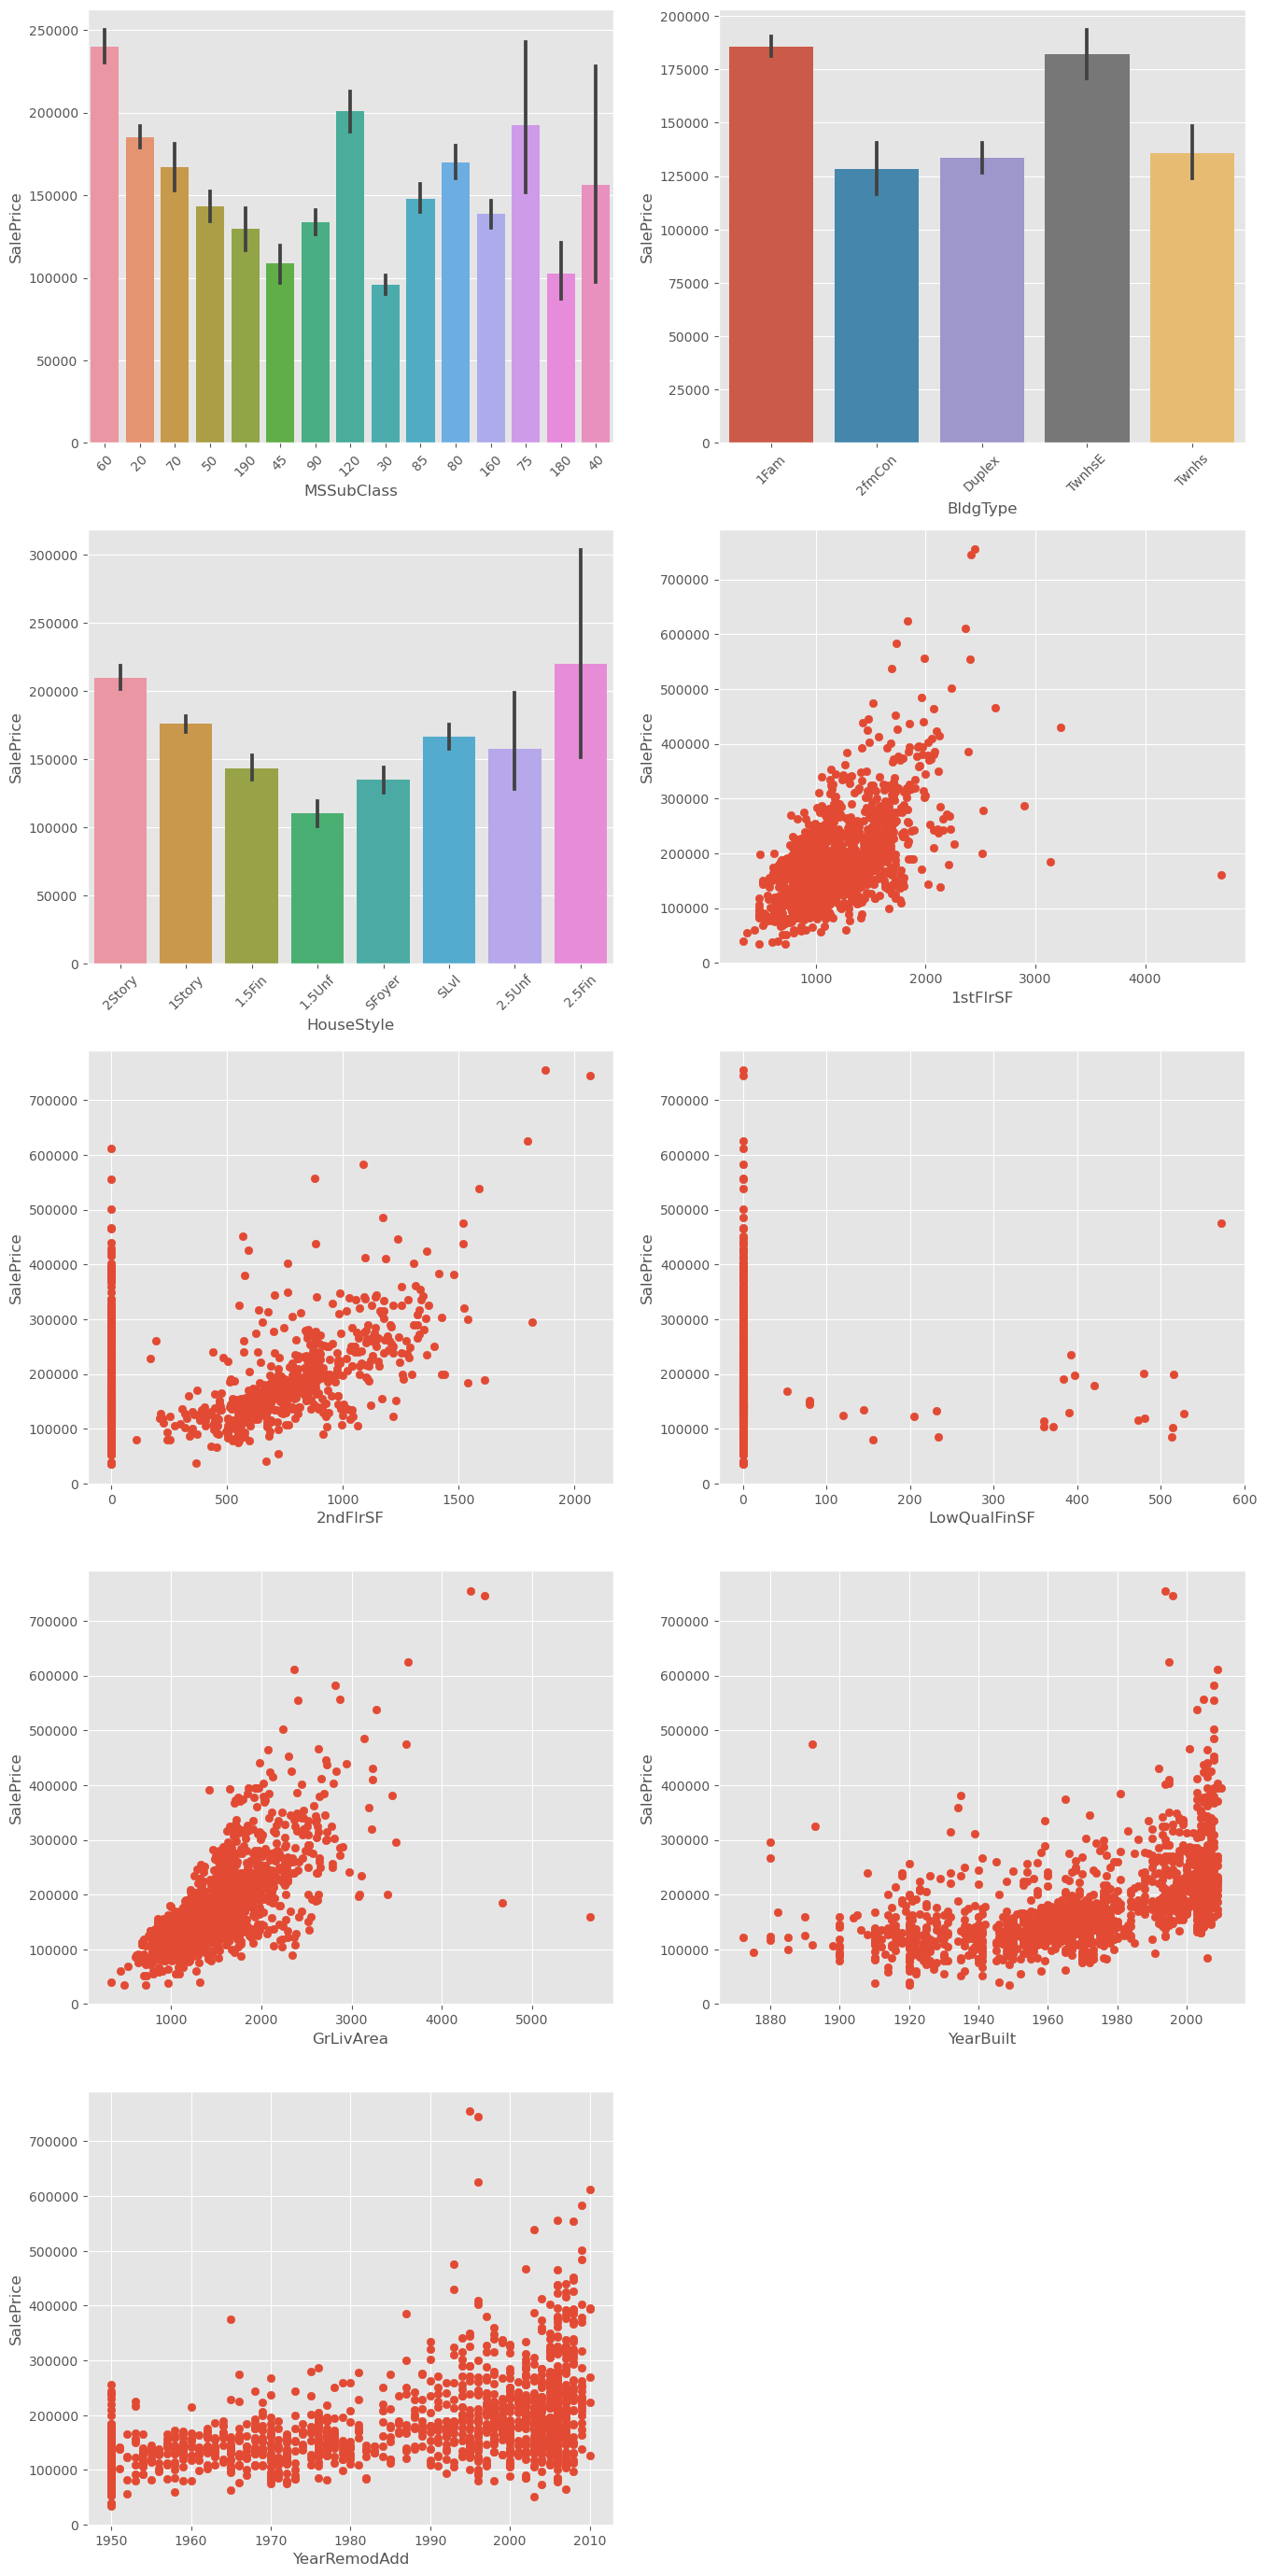

In [186]:
vs_price(cols)

Observations:
* MsSubclass, as expected, is significant. 20, 45, 180 correlate with lower prices while 60, 120, and 20 correpond with higher prices. 
* BldgType significant: 1Fam and TwnhsE have higher prices, while 2FmCon, Duplex, and Twnhs have lower prices.
* HouseStyle was also significant: 2Story has the highest prices, while 1.5Unf has the lowest. Everything else was in the middle with small error bars except 2.5Unf and 2.5F.
* Both both 1stFloorSF and GrLivArea have a strong positive linear relationship with SalePrice. 
* 2ndFlrSF also appears to have a positive linear relationship with SalePrice. However, there are a lot of Zeros.
* LowQualFinSF appears to have a negative linear relationship with SalePrice. However, the large amount of zeros obfuscate the true relationship.
* Generally both YearBuilt and YearRemodAdd correlate positively with SalePrice; that is, newer houses tend to sell for more.

GrLivArea sounds like it would be pretty similar to the combination of the 1stFlrSF and the 2ndFlrSF. I wonder if plotting it will give us a straight line

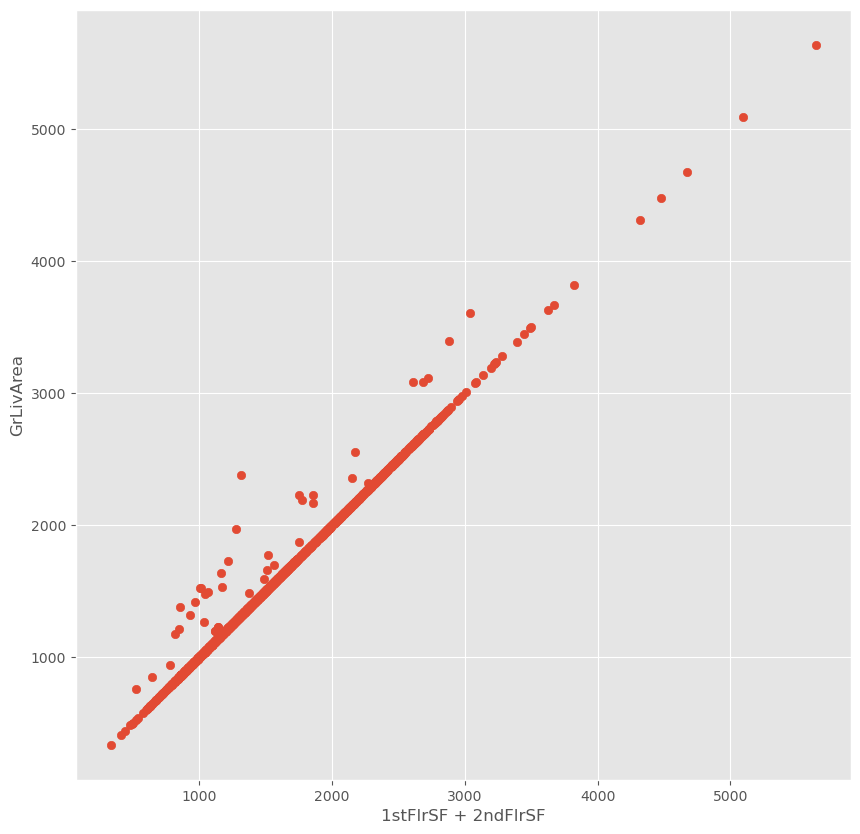

In [187]:
#GrLivArea is pretty much the same as 1stFlrSF and 2ndFlrSF combined
plt.figure(figsize=(10,10))
plt.scatter(df['1stFlrSF']+df['2ndFlrSF'],df['GrLivArea'])
plt.xlabel('1stFlrSF + 2ndFlrSF')
plt.ylabel('GrLivArea')
plt.show()

As expected, the two are closely related. There are points which don't fall neatly on the line, which is probably due to having a third floor or other external living space. This makes me wonder if GrLivArea is even needed as a variable.

Next, 2ndFlrSF has a positive relationship with SalePrice. However, I wonder if having a second floor, regardless of area, correlate with higher prices.

In [188]:
df['SalePrice'] = df['SalePrice'].replace('None',np.nan)
df['SalePrice'] = df['SalePrice'].astype('float64')

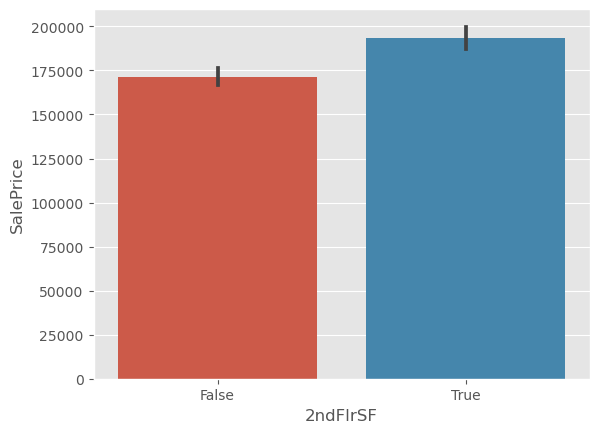

In [189]:
Is2ndFlr = df['2ndFlrSF'] > 0
sns.barplot(x=Is2ndFlr, y=df['SalePrice'])
plt.show()

So having a second floor, regardless of its surface area, increases the house's price. I'll make a variable indicating this since it looks like there's very large variation in House Prices for 2ndFlrSF = 0, which might potentially confuse the model.

In [190]:
df['Has2ndFlr'] = Is2ndFlr

Next, I wonder if refurbishing the house makes a difference in the price. 

According to the description, if there is no remodeling added the YearRemodAdd will be the same as the YearBuilt. Out of the 1400 sales, 696 houses have remodeling done. There doesn't appear to be a difference between the two in Terms of SalePrice.

In [191]:
diff = df.YearRemodAdd - df.YearBuilt
sum(diff != 0)

1359

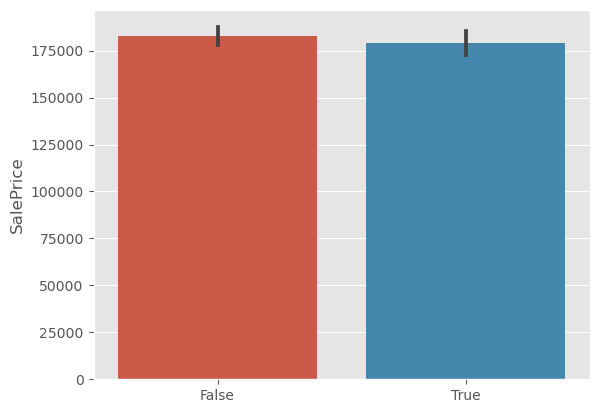

In [192]:
sns.barplot(x=(diff != 0),y=df['SalePrice'])
plt.show()

However, given that the house has been refurbished, does the number of years between when the house was built and when it was refurbished make a difference?

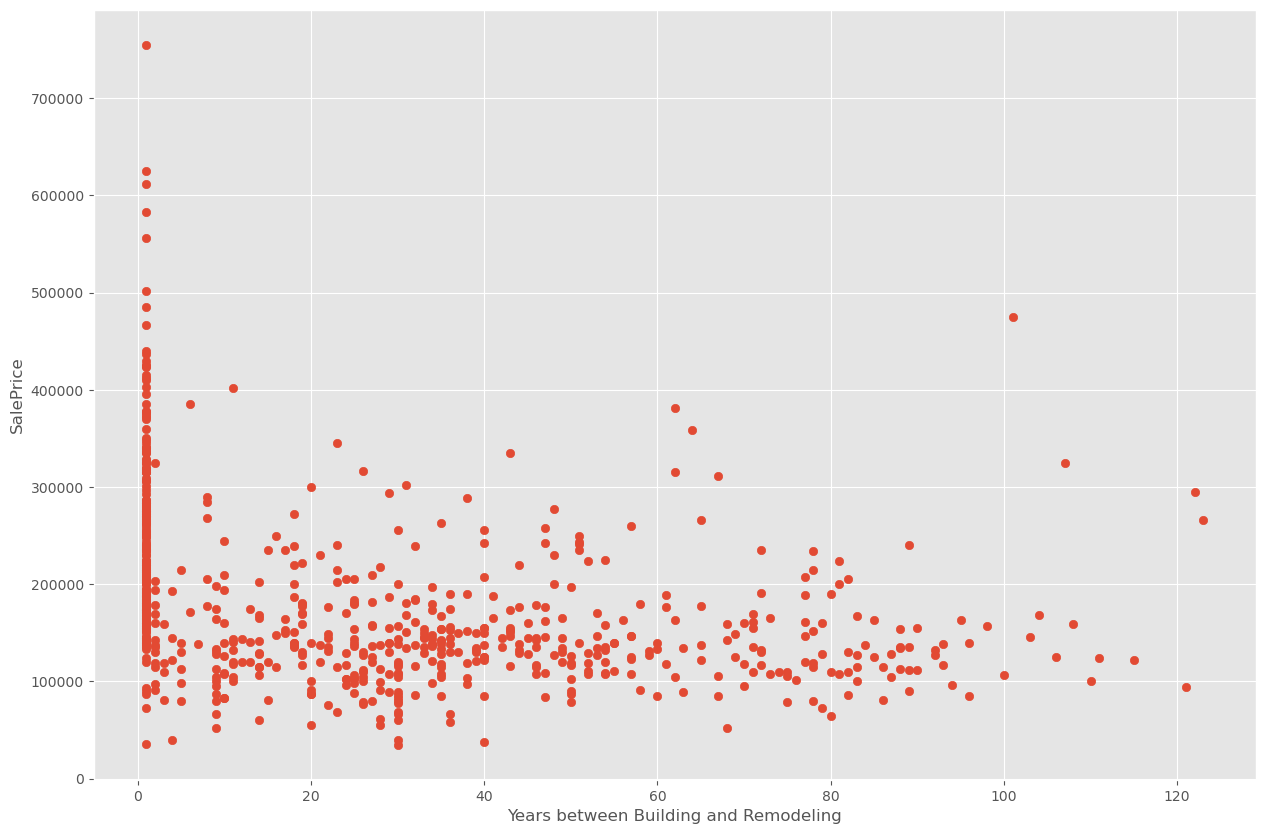

In [193]:
#Let's eliminate the 0s.
df_w_remodel = df[diff > 0]

#Plot this
remodel_years = diff[diff > 0]

plt.figure(figsize=(15,10))
plt.xlabel('Years between Building and Remodeling')
plt.ylabel('SalePrice')
plt.scatter(remodel_years,df_w_remodel['SalePrice'])
plt.show()

I don't really see a linear relationship between the two in the above chart. Let's remove the values closest to 0.

In [194]:
diff.value_counts()

 0      1560
 1       433
 30       38
 40       32
 25       27
 35       25
 2        24
 10       22
 50       20
 20       20
 11       19
 9        19
 26       18
 27       17
 24       15
 33       14
 23       14
 28       14
 36       14
 5        13
 32       13
 34       13
 4        13
 29       13
 14       13
 54       12
 46       12
 43       12
 19       12
 8        11
 12       11
 72       11
 31       11
 47       11
 38       10
 15       10
 18       10
 65       10
 44       10
 42        9
 22        9
 49        9
 21        9
 39        9
 51        8
 55        8
 77        8
 3         8
 57        8
 37        8
 13        7
 78        7
 45        7
 52        7
 53        7
 71        7
 62        7
 89        6
 93        6
 90        6
 75        6
 17        6
 16        6
 79        6
 83        6
 67        6
 58        5
 48        5
 61        5
 73        5
 63        5
 70        5
 41        5
 56        5
 60        4
 81        4
 68        4

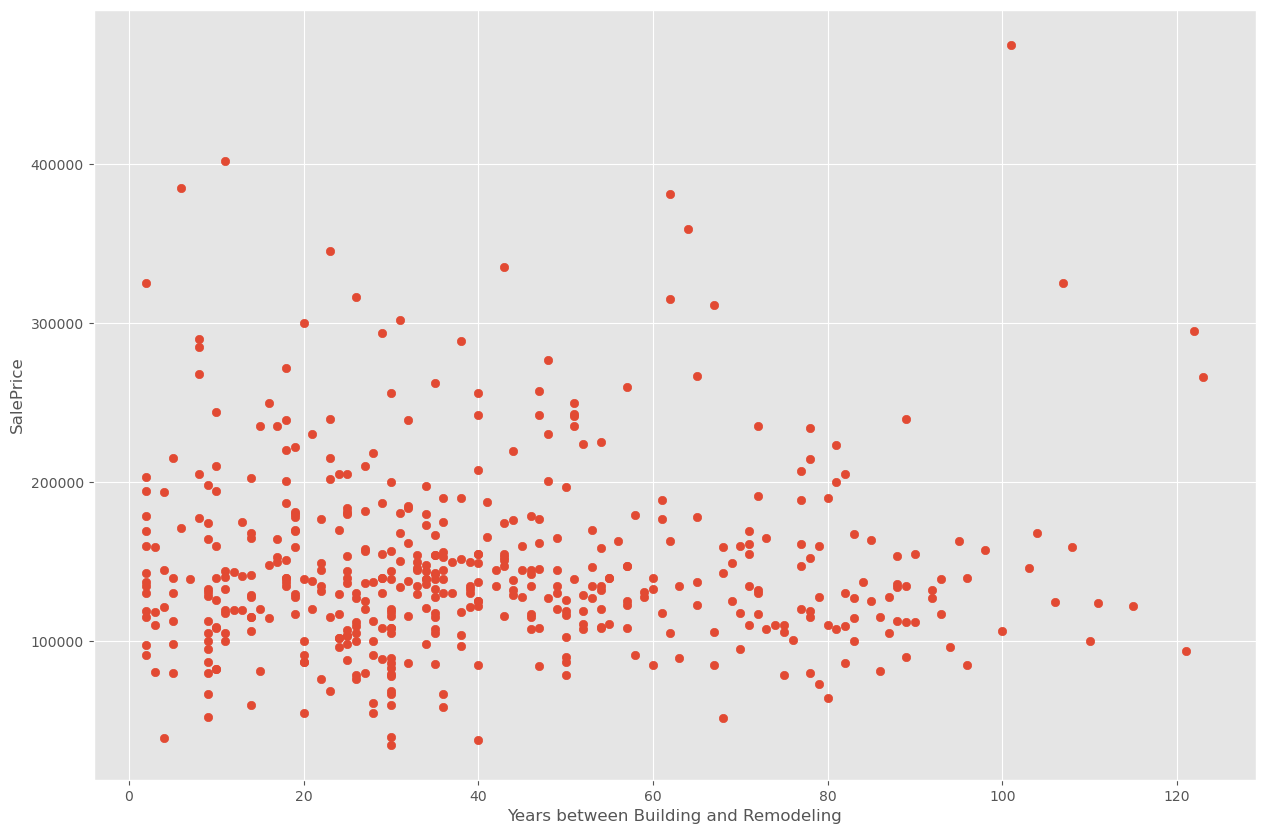

In [195]:
#Let's eliminate the 0s and 1s.
df_w_remodel = df[diff > 1]

#Plot this
remodel_years = diff[diff > 1]

plt.figure(figsize=(15,10))
plt.xlabel('Years between Building and Remodeling')
plt.ylabel('SalePrice')
plt.scatter(remodel_years,df_w_remodel['SalePrice'])
plt.show()

There appears to be a negative relationship between LowQualFinSF and SalePrice, but there were so many 0s that it was difficult to visualize correctly. Thus, I'll first visualize the relationship between non-0 LowQualFinSF and SalePrice.

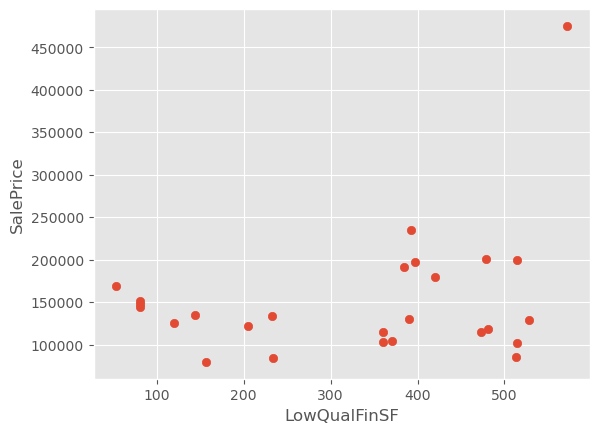

In [196]:
lqfsf = df[df['LowQualFinSF']>0]
plt.scatter(lqfsf['LowQualFinSF'],lqfsf['SalePrice'])
plt.xlabel('LowQualFinSF')
plt.ylabel('SalePrice')
plt.show()

Let's remove the outlier.

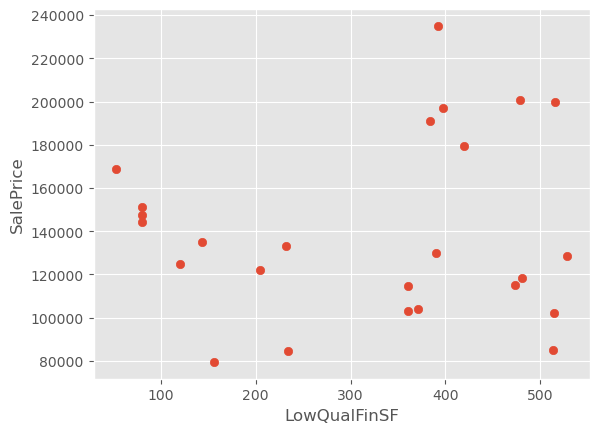

In [197]:
#No Outliers
lqfsf = df[(df['LowQualFinSF']>0)&(df['LowQualFinSF']<540)]
plt.scatter(lqfsf['LowQualFinSF'],lqfsf['SalePrice'])
plt.xlabel('LowQualFinSF')
plt.ylabel('SalePrice')
plt.show()

The relationship doesn't appear to be negative--in fact, there doesn't appear to be much of a relationship at all. Let's compare the mean SalePrice of houses with LowQualFinSF and those without.

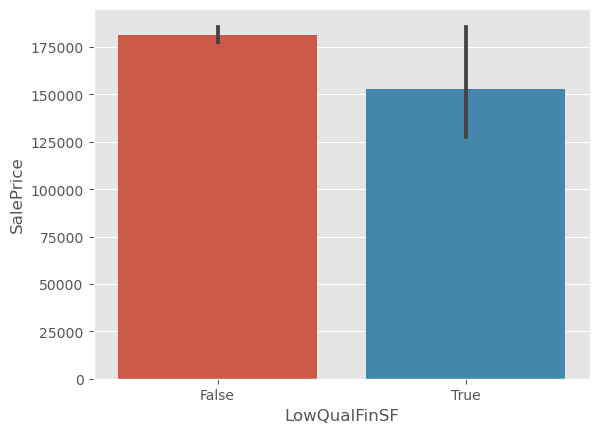

In [198]:
sns.barplot(x=(df['LowQualFinSF']>0),y=df['SalePrice'])
plt.show()

It appears that any LowQualFinSF, regardless of surface area, correlates with a lower price, but there is a large error bar. Once again, I'll remove the outlier to see if there is a more obvious relationship.

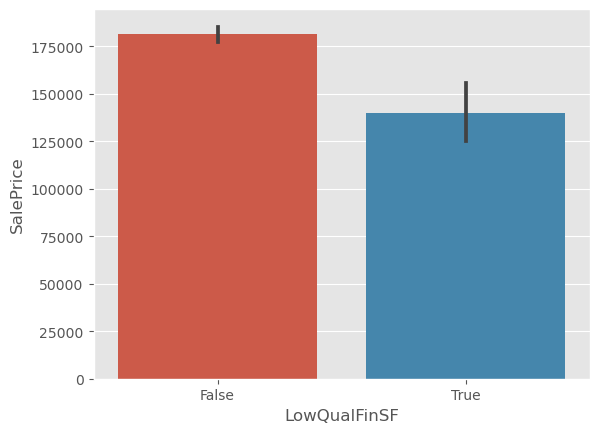

In [199]:
temp = df.drop(185)
sns.barplot(x=(temp['LowQualFinSF']>0),y=(temp['SalePrice']))
plt.show()

Looks like having LowQualSF, regardless of how much, correlates with a lower house price. Let's make it a feature.

In [200]:
df['HasLowQualSF'] = (df['LowQualFinSF']>0)

## Descriptors of the area around the house

In [201]:
cols = ['MSZoning','LotFrontage','LotArea','Street','Alley','LotShape','LandContour',
        'LotConfig','LandSlope','Neighborhood','Condition1','Condition2']

Reading the descriptions, LandSlope and LotShape should be converted to numerical as they are really numerical measurements of the land's slopeness and the irregularity of the house, respectively.

In [202]:
landslope_dict = {'Gtl':0,'Mod':1,'Sev':2}
df['LandSlope'] = df['LandSlope'].map(landslope_dict)
lotshape_dict = {'Reg':0,'IR1':1,'IR2':2,'IR3':3}
df['LotShape'] = df['LotShape'].map(lotshape_dict)

/tmp/ipykernel_103485/2017967103.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(n_rows,2,i+1)


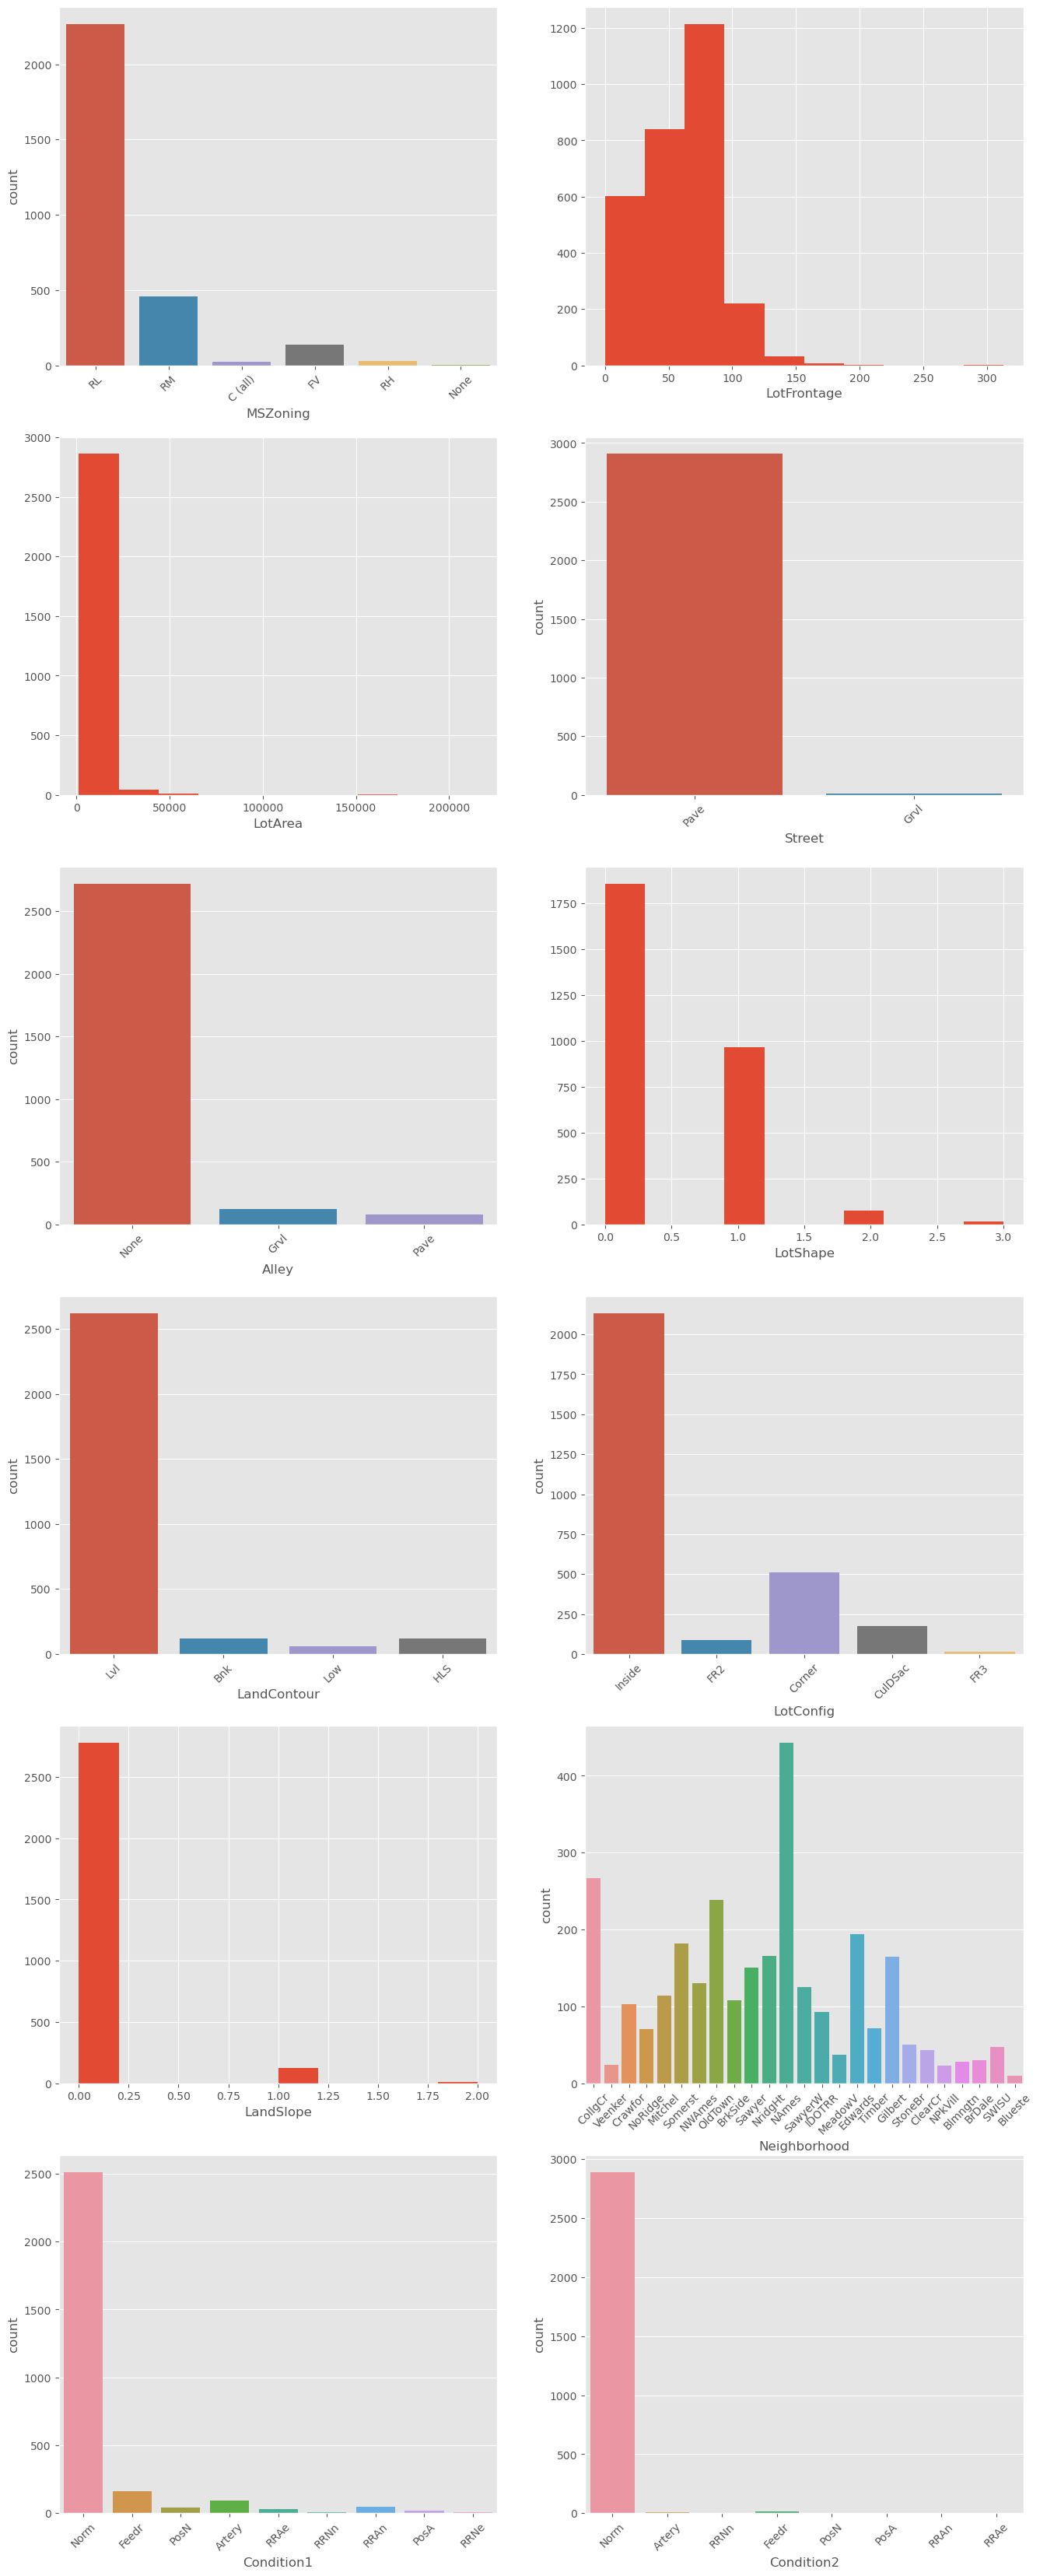

In [203]:
plot_dists(cols)

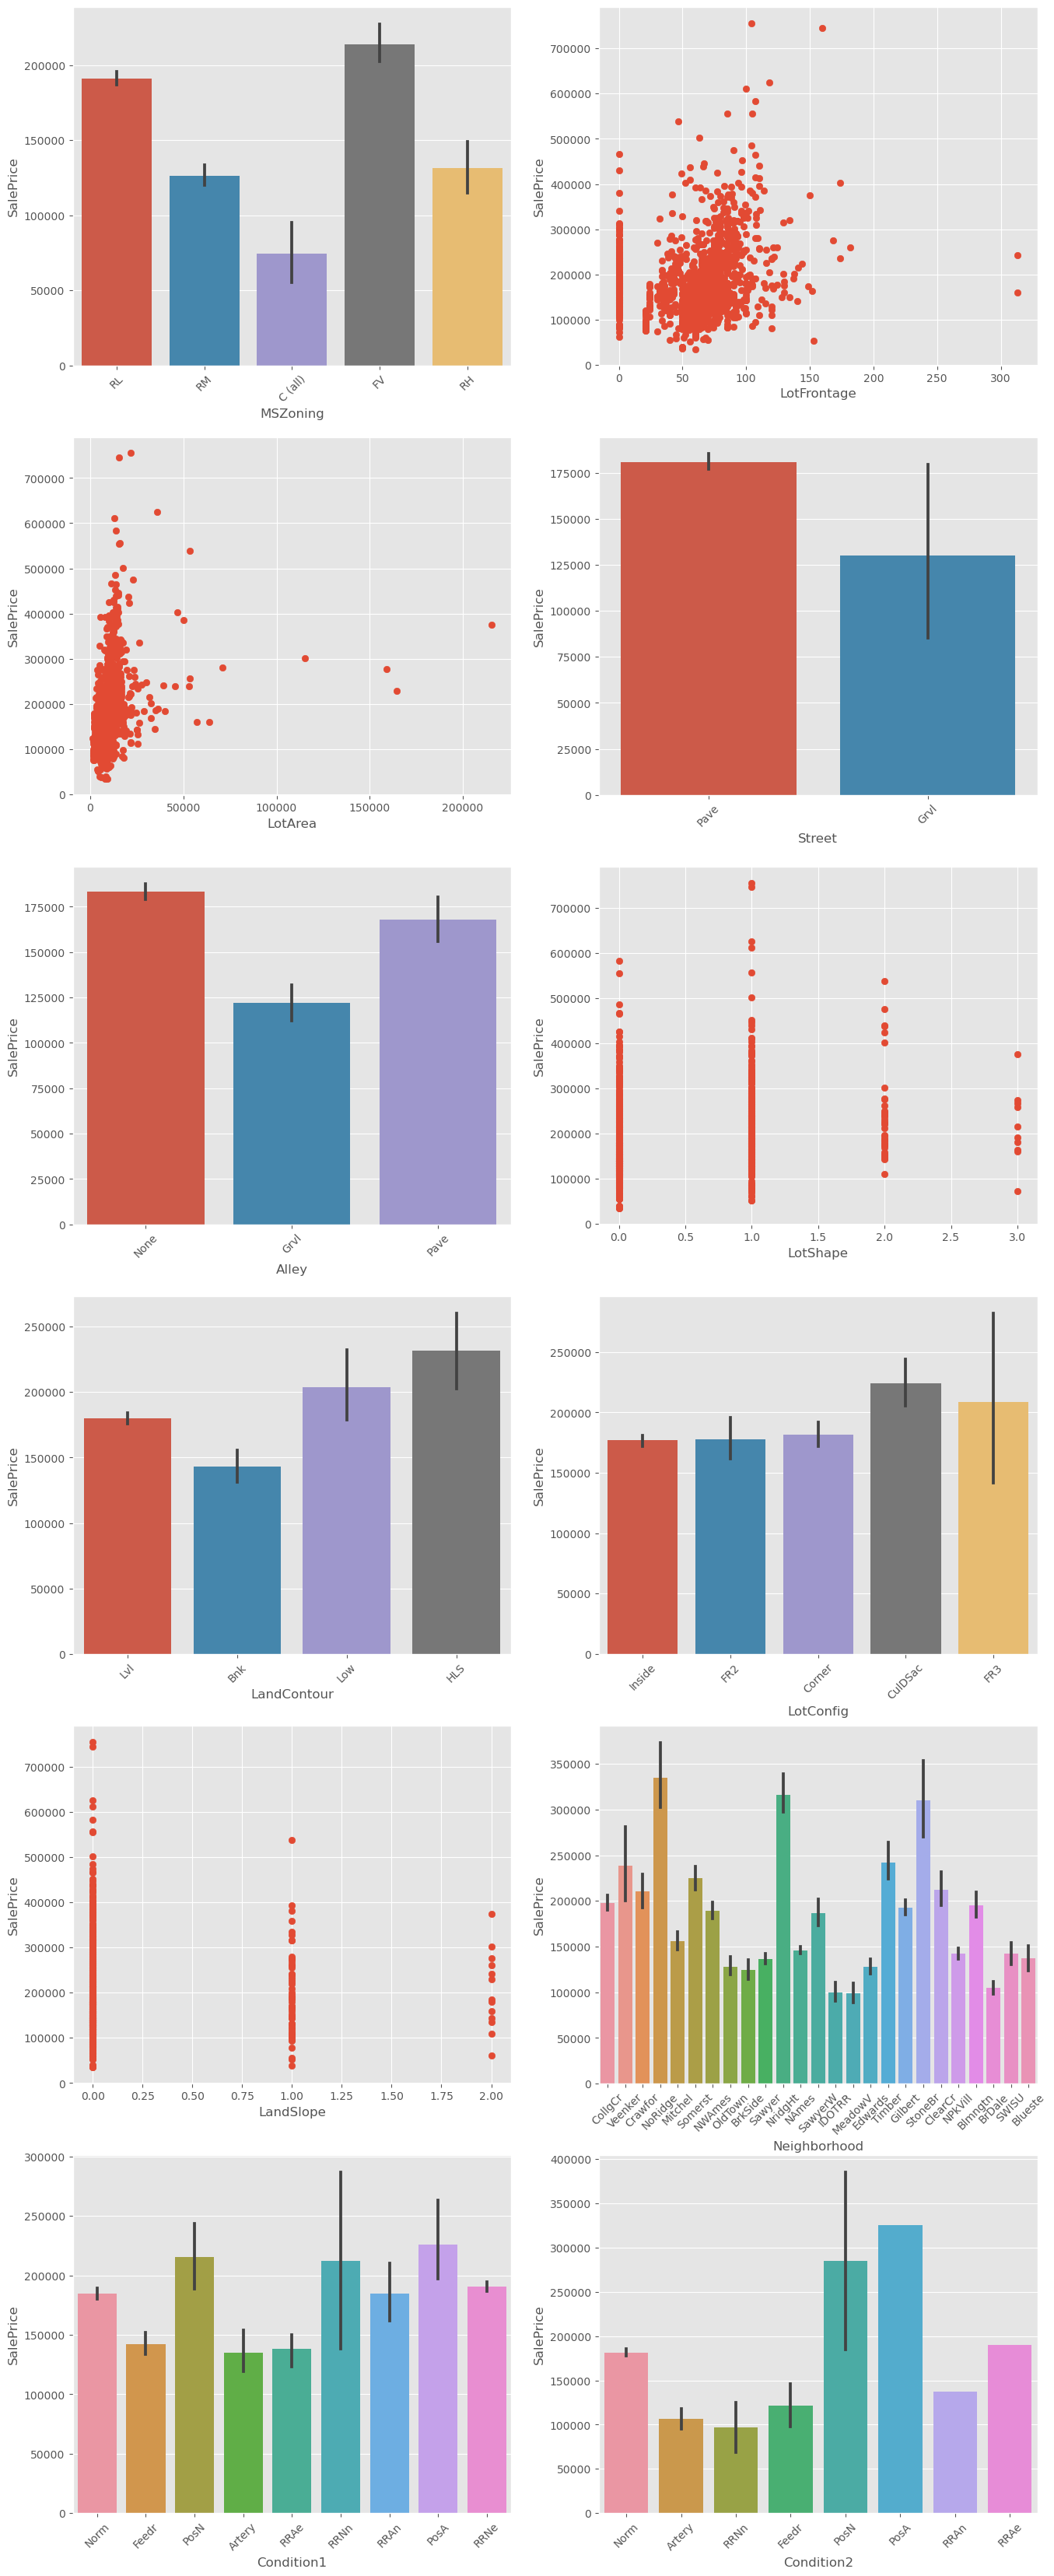

In [204]:
vs_price(cols)

Observations:
* Different MsZoning Values yield distinctly different prices. Of those, FV (Floating Residential Villages) have higher prices and C (Commercial) yields the lowest.
* LotFrontage and LotArea both appear to have a positive correlations with price, but are skewed by outliers.
* As expected, different neighborhoods correspond with different prices.
* Street appears to be a factor in house price, but there are large error bars.
* The alley category is significant, with None yielding the higest and Gravel yielding the lowest price.
* Generally, the more irregular LotShape is, the less the price is; the more tiled the Landslope is, the less the price is.
* For LandContour, HLS (Hillside) had the highest prices while Bnk (Banked) yielded the lowest.
* Cul-De-Sac yielded a significantly higher price in LotConfig, but not the other options.
* In both conditions 1 and 2, PosA (Adjacent to positive offsite feature) and PosN (have positive off-site feature) corresponded to higher prices while Artery (Adjacent to arterial street) and Feedr (Adjacent to Feeder Street) correlated with lower street.

We mentioned above that some outliers are obfuscating the relationship the independent variables LotFrontage and LotArea have with SalePrice. Below I have removed some outliers and replotted them.

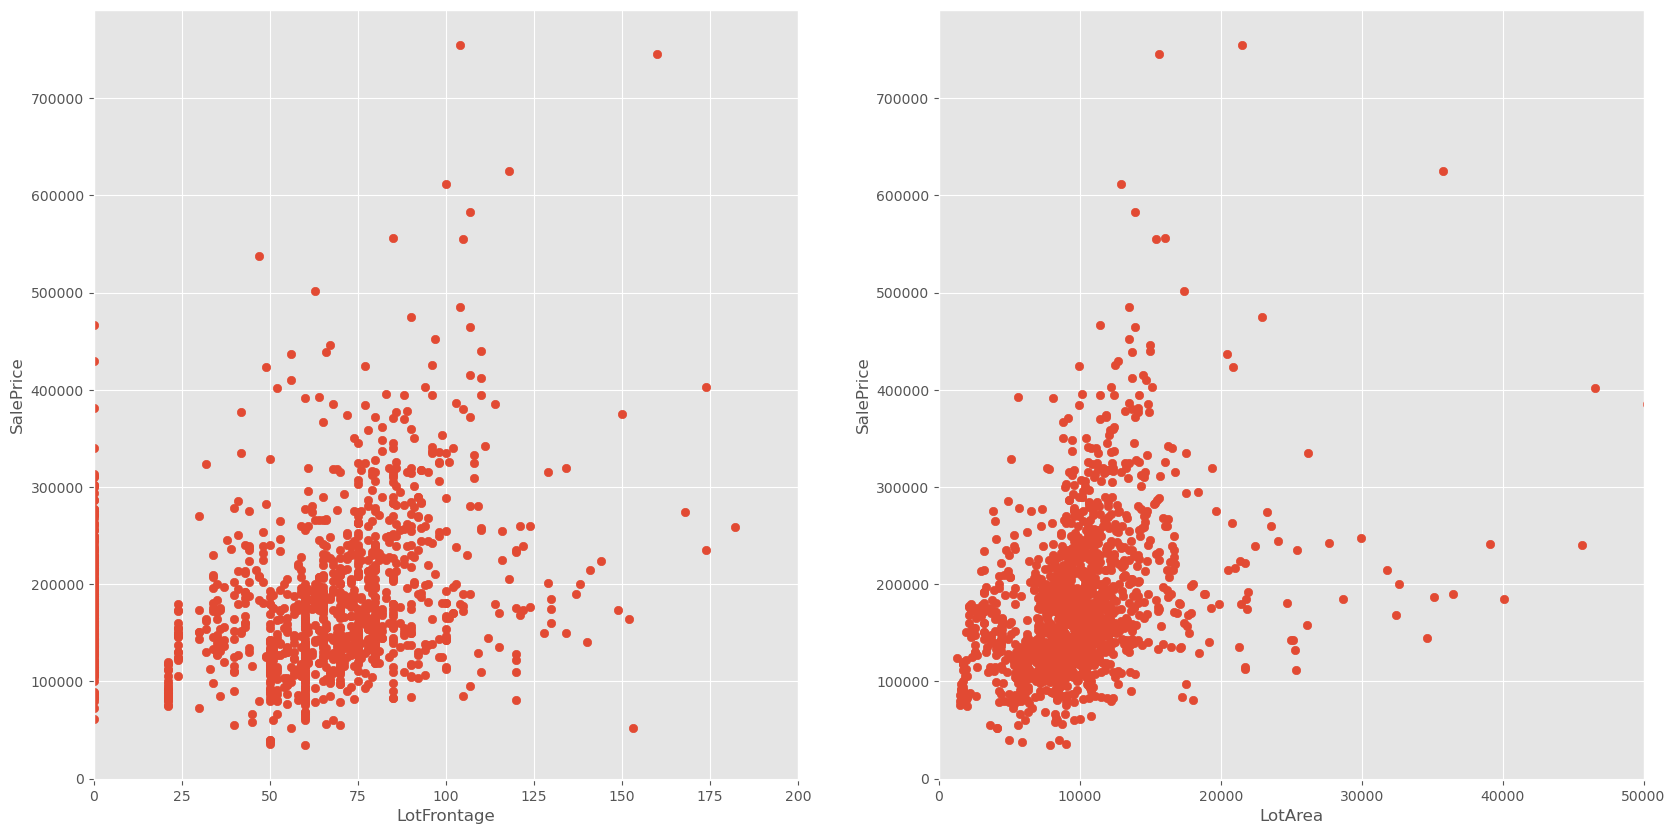

In [205]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.scatter(df['LotFrontage'],df['SalePrice'])
plt.xlim(0,200)
plt.xlabel('LotFrontage')
plt.ylabel('SalePrice')
plt.subplot(1,2,2)
plt.scatter(df['LotArea'],df['SalePrice'])
plt.xlim(0,50000)
plt.xlabel('LotArea')
plt.ylabel('SalePrice')
plt.show()

Looks like the positive linear relationship is made more apparent. However, the data is still very congregated to the lower left corner. From the graph it looks like both LotArea and Lot Frontage are skewed to the left, so let's try logging them and seeing if a clearer linear relationship can be established. And while we're in the logging business, let's log the SalePrice also.

/home/sophia/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


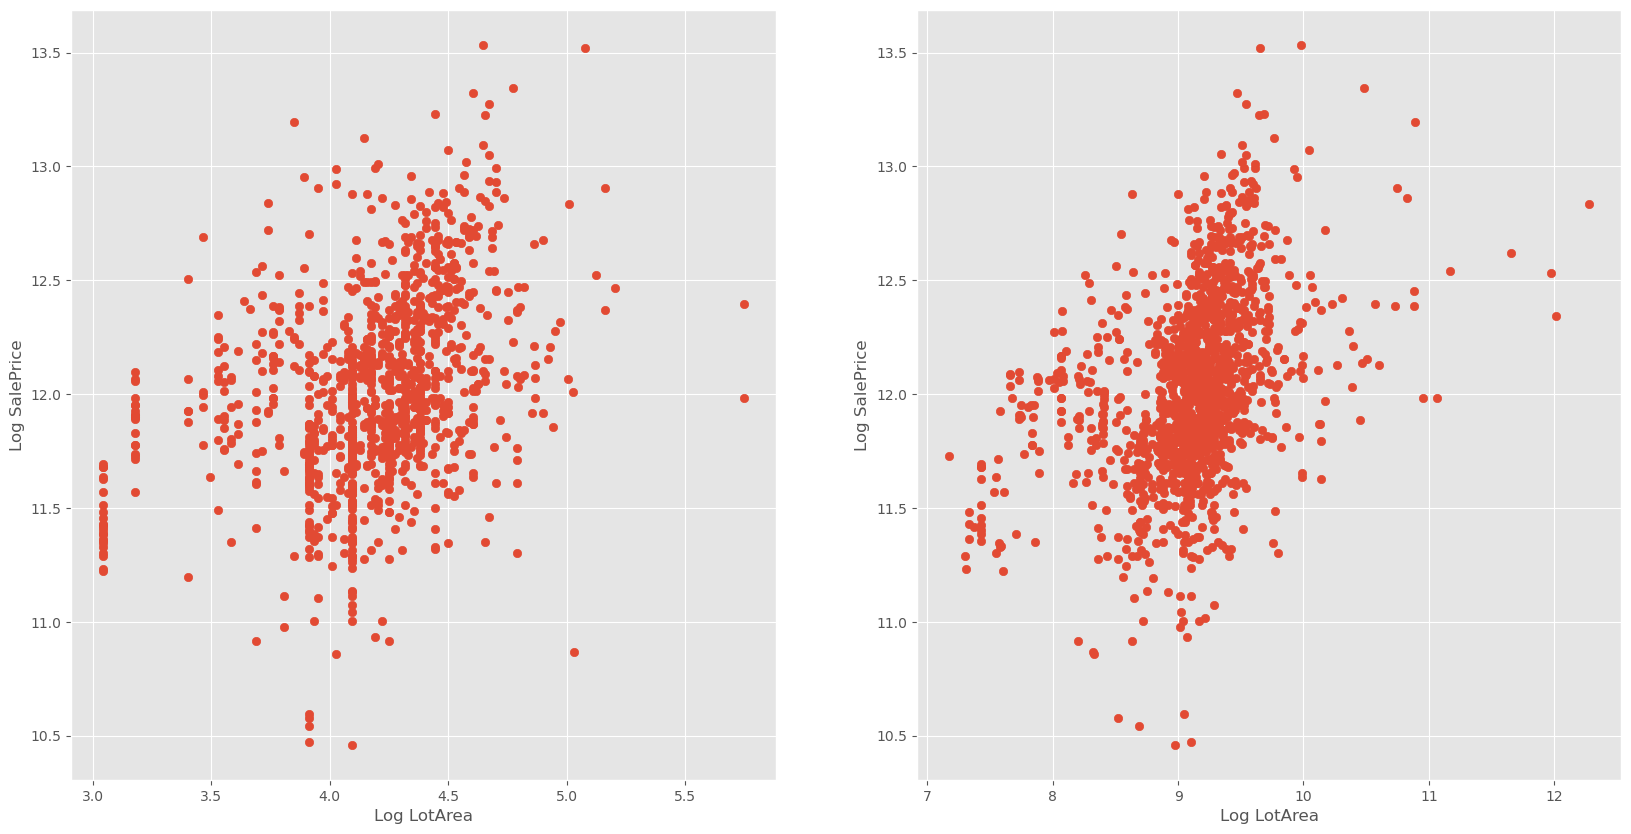

In [206]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.scatter(np.log(df['LotFrontage']),np.log(df['SalePrice']))
plt.xlabel('Log LotArea')
plt.ylabel('Log SalePrice')
plt.subplot(1,2,2)
plt.scatter(np.log(df['LotArea']),np.log(df['SalePrice']))
plt.xlabel('Log LotArea')
plt.ylabel('Log SalePrice')
plt.show()

After converting to logarithm, the positive linear relationships seem more apparent. 

Next, we should convert the condition columns so that each option is a column of its own. If the sale fits that criteria, it has a 1 in the column. If not, then a 0. We do this for each of the two condition columns and add the results together. 

In [207]:
options = pd.get_dummies(df[['Condition1','Condition2']])
for x in df['Condition1'].unique():
    if 'Condition2_'+x in options.columns:
        options[x] = options['Condition1_'+x] + options['Condition2_'+x]
        options = options.drop(['Condition1_'+x,'Condition2_'+x],axis=1)
    else:
        options[x] = options['Condition1_'+x]
        options = options.drop(['Condition1_'+x],axis=1)
options.head()

Norm  Feedr  PosN  Artery  RRAe  RRNn  RRAn  PosA  RRNe
0     2      0     0       0     0     0     0     0     0
1     1      1     0       0     0     0     0     0     0
2     2      0     0       0     0     0     0     0     0
3     2      0     0       0     0     0     0     0     0
4     2      0     0       0     0     0     0     0     0

Regarding the Norm column: if there is a 2 (both condition columns in df indicate normality), then we change it to 1 to indicate that the sale was normal, likewise, if there is a 1 in the Norm column (only one condition column indicates normality) then we change it to 0 to reflect that the sale was not, in fact, normal.

For all of the other columns, we would need to look at the difference in SalePrice for each of the options. It's possible that a value of two means that the label is true for different instances, but it's also possible that this could be due to erroneous data. Thus, we need to look at the difference to determine if there's value in keeping 2s.

/home/sophia/anaconda3/lib/python3.8/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/home/sophia/anaconda3/lib/python3.8/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/home/sophia/anaconda3/lib/python3.8/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/home/sophia/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1556: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,
/home/sophia/anaconda3/lib/python3.8/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


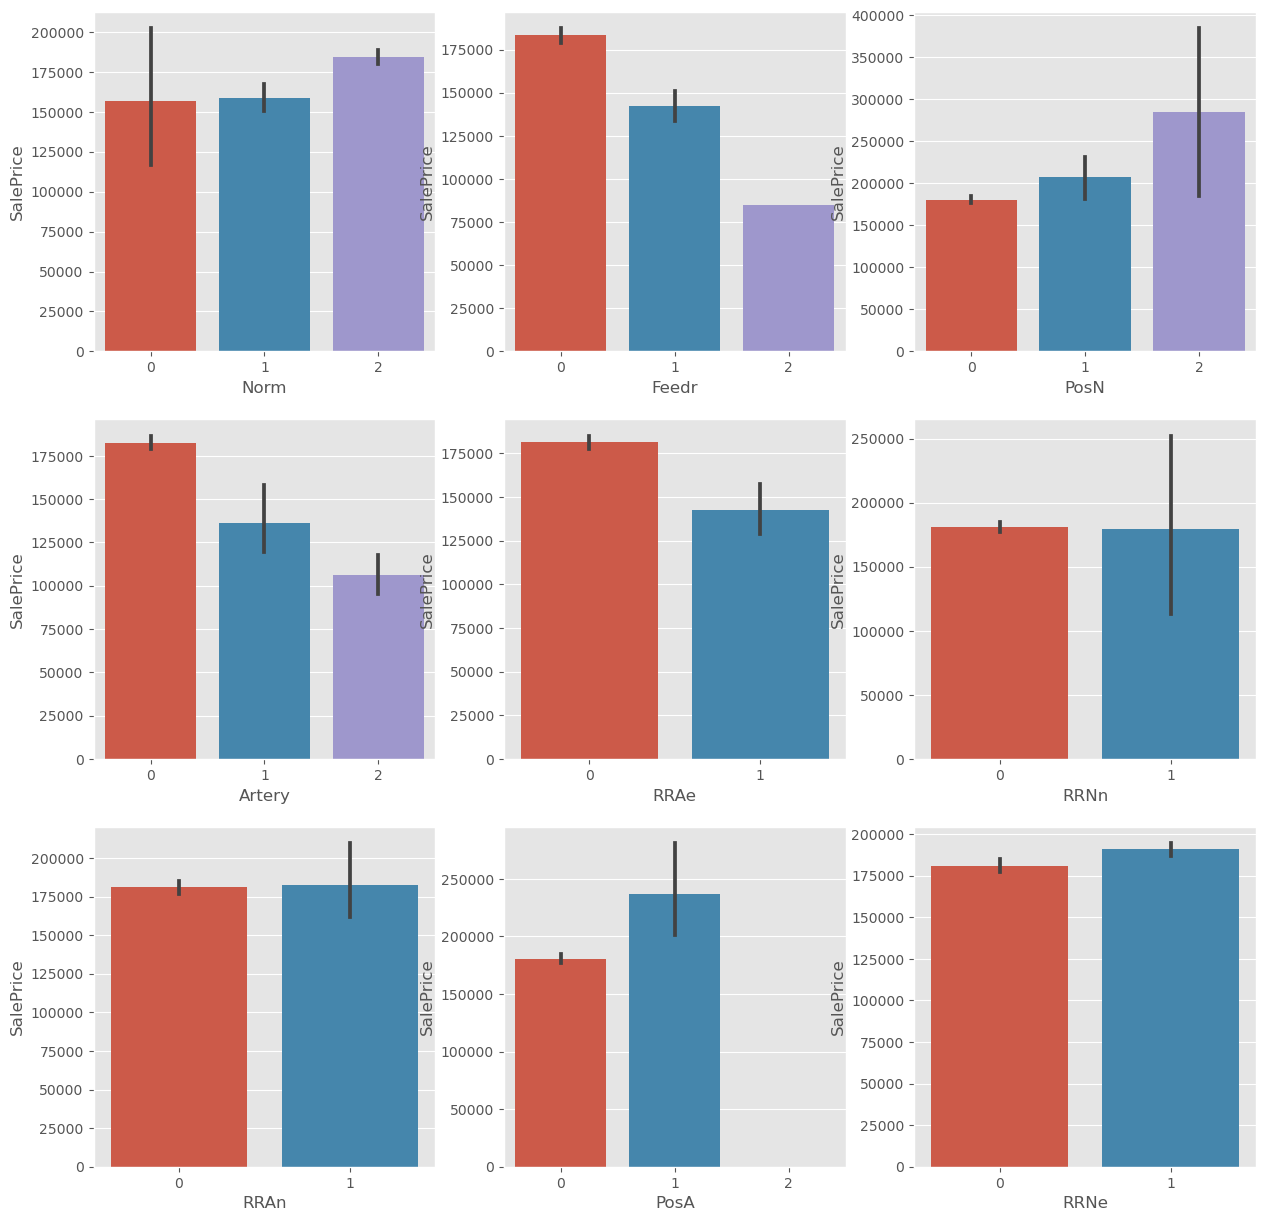

In [208]:
plt.figure(figsize=(15,15))

for i in range(9):
    column = options.columns[i]
    plt.subplot(3,3,i+1)
    sns.barplot(x=options[column],y=df['SalePrice'])

plt.show()

The above boxplots show that it is a good idea to make the 2s in Norm 1 and the 1s 0. Fr the others, though, I will keep the 2s because it appears that there is a significant difference between 2s and 1s in the columns that do have 2s.

In [209]:
options['Norm'] = options['Norm'].apply(lambda x: max(x-1,0))
options.head()

Norm  Feedr  PosN  Artery  RRAe  RRNn  RRAn  PosA  RRNe
0     1      0     0       0     0     0     0     0     0
1     0      1     0       0     0     0     0     0     0
2     1      0     0       0     0     0     0     0     0
3     1      0     0       0     0     0     0     0     0
4     1      0     0       0     0     0     0     0     0

In [210]:
df = pd.concat([options,df],axis=1)
df = df.drop(['Condition1','Condition2'],axis=1)

## Exterior construction descriptors

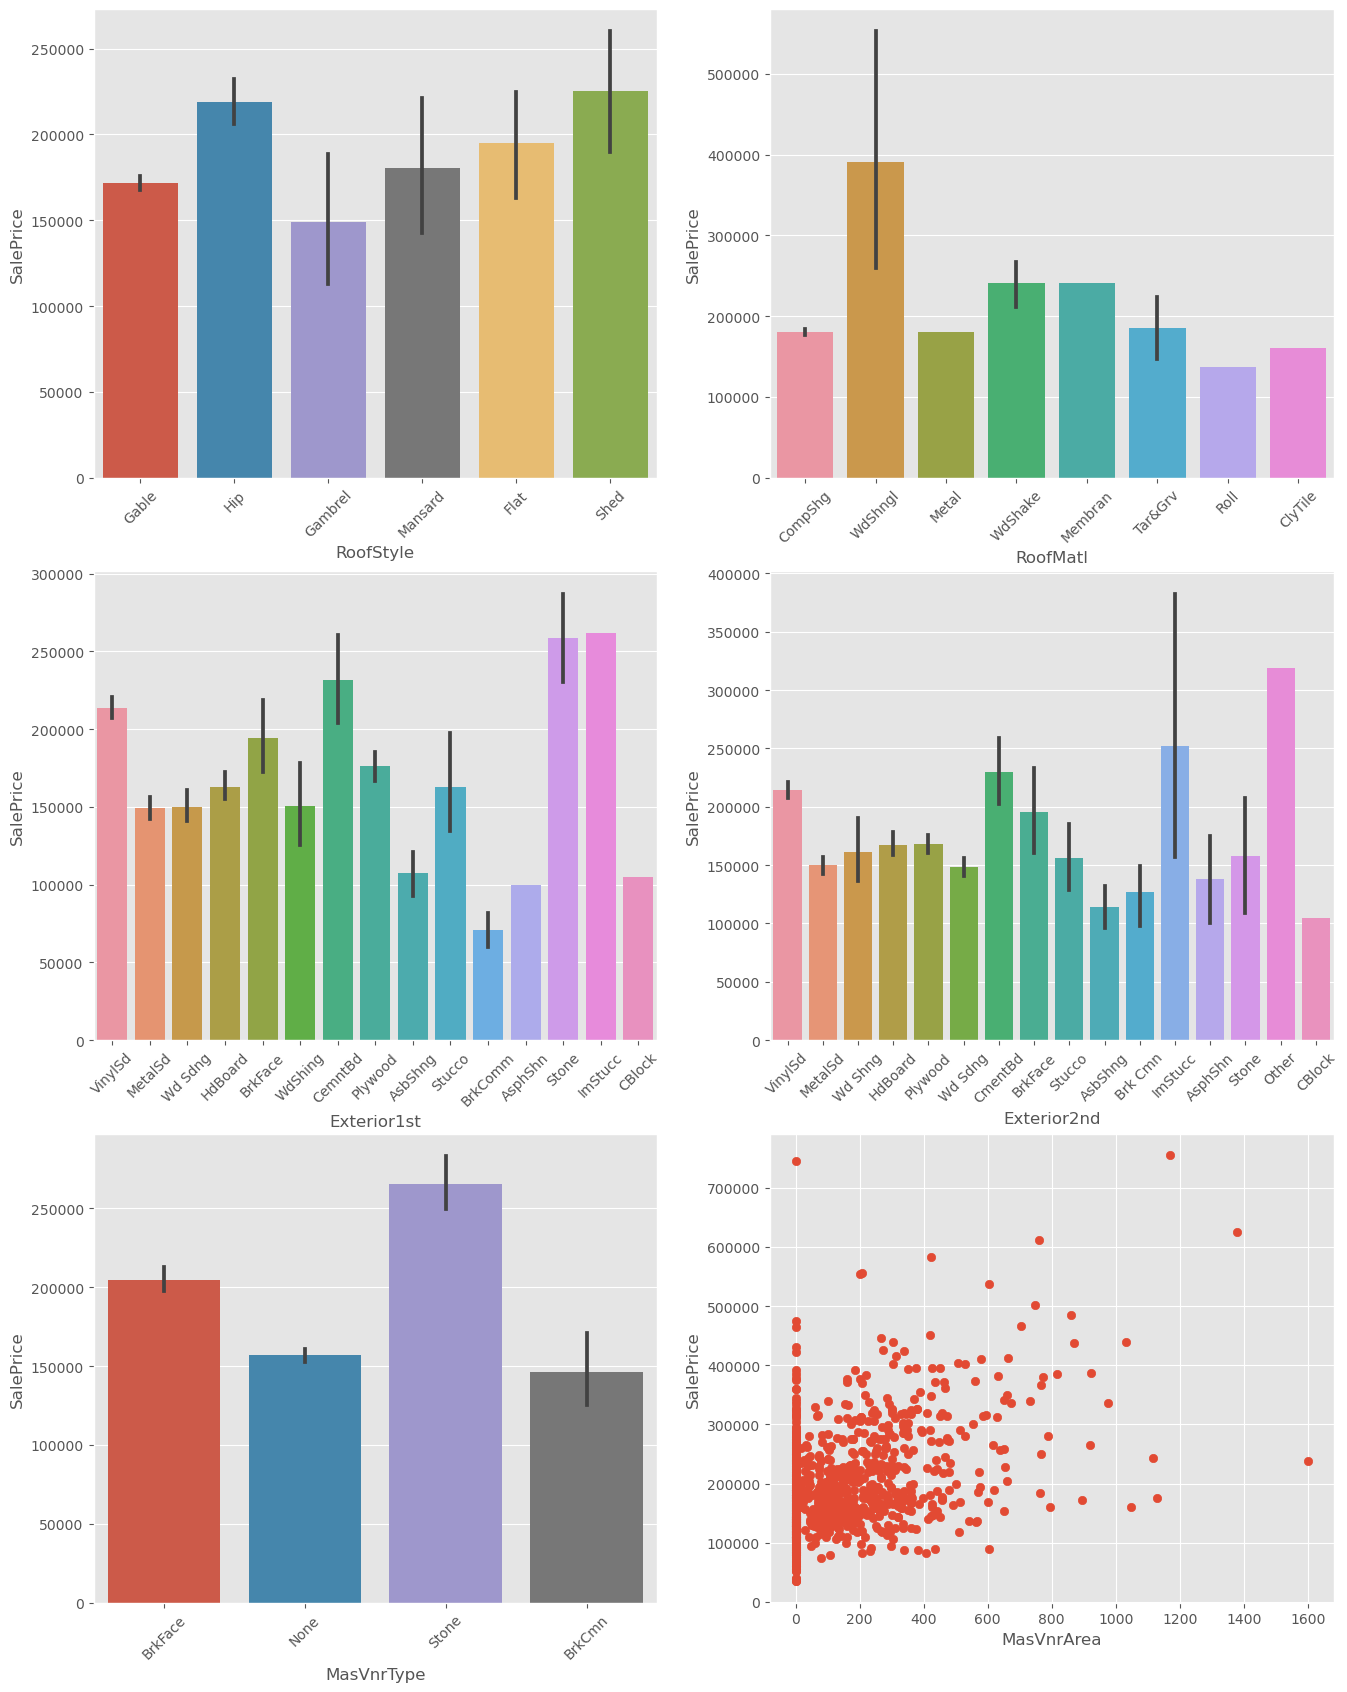

In [211]:
cols = ['RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','MasVnrArea']
vs_price(cols)

Observations:
* RoofStyle appears to be significant, but the error bars are large and overlapping.
* In RoofMatl, WdShngl (Wood Shingles) appears to have a higher SalePrice compared to the others.
* In both Exterior1st and 2nd, BrkCmn (Brick Common) and AsbShng (Asbestos Shingles) have lower SalePrices while CementBd (Cement Board) has higher. Generally the trends are consistent in both except for Stone and other.
* MasVnrType has significant difference in price between its options; BrnCmn (Brick Common) has the lowest, and Stone has the highest. 
* There may be a positive relationship between MasVnrArea and SalePrice, but too much of the the values are in the lower right corner.

First, let's take a look as MasVnrArea. First, there's a lot of 0s in there. Is there a difference in price between those with a MasVnrArea of 0 and those that are not?

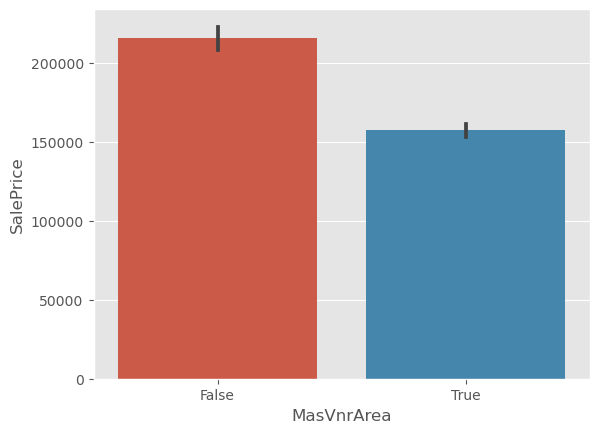

In [212]:
sns.barplot(x=(df['MasVnrArea']==0), y=(df['SalePrice']))
plt.show()

Looks like True yields lower SalePrices compared to False. I'll create a separate column for it. Let's take a look at the relationship between the numerical values MasVnrArea and the SalePrice. First, I logged MasVnrArea.

/home/sophia/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


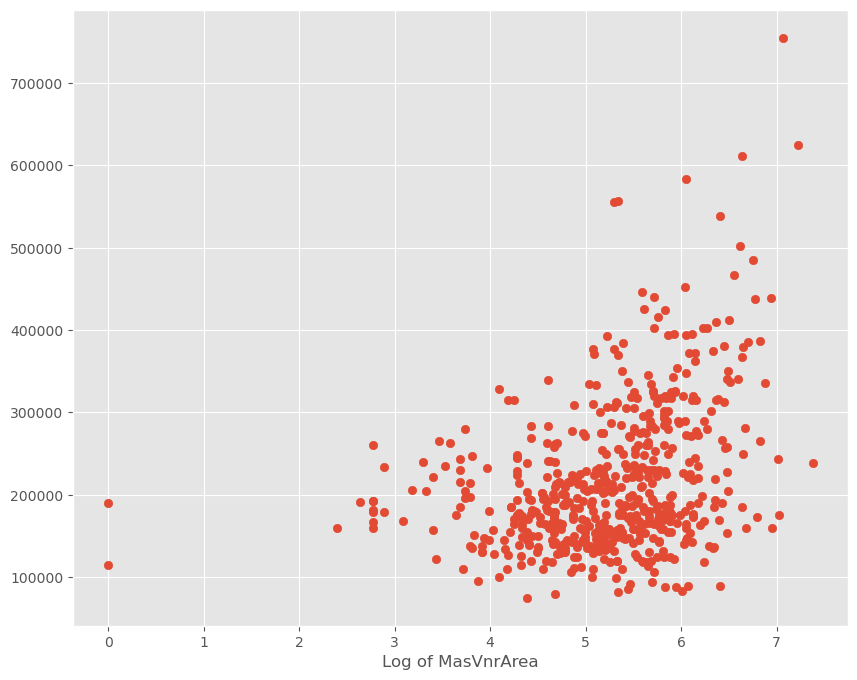

In [213]:
#create column
df['HasVnrArea'] = (df['MasVnrArea']==0)

#See 
plt.figure(figsize=(10,8))
plt.scatter(np.log(df['MasVnrArea']),(df['SalePrice']))
plt.xlabel('Log of MasVnrArea')
plt.show()

There is a more obvious positive correlation now. Let's try logging both.

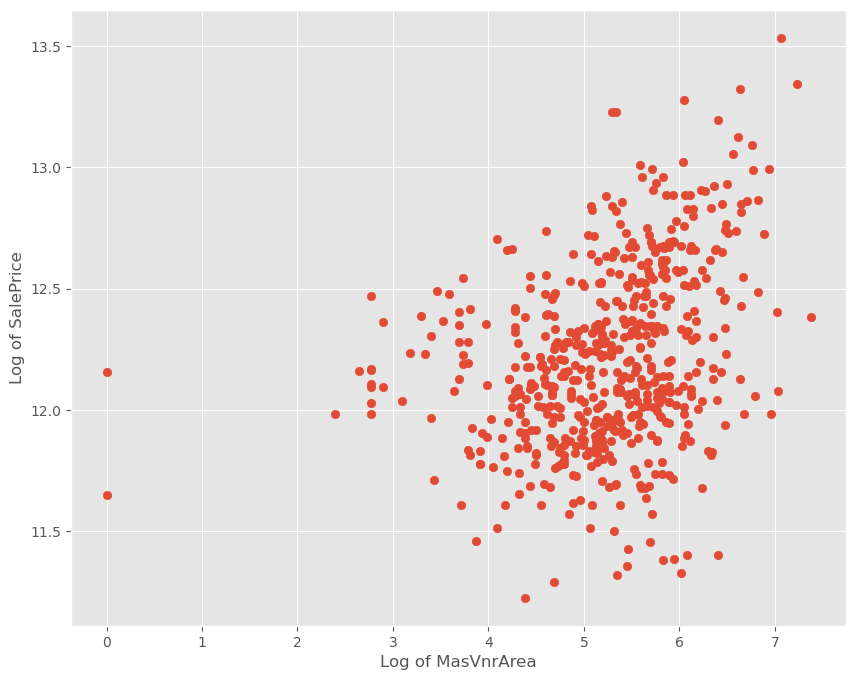

In [214]:
plt.figure(figsize=(10,8))
plt.scatter(np.log(df_train['MasVnrArea']),np.log(df_train['SalePrice']))
plt.xlabel('Log of MasVnrArea')
plt.ylabel('Log of SalePrice')
plt.show()

It looks even clearer than before, though there are two outliers. 

Exterior1st and Exterior2nd both refer to the material covering on the outside of the house, so it makes sense to do what we did for the conditions column above. However, we might wish to examine possible combinations of two different material with those who only have one.

In [215]:
OrderedCombo = df['Exterior1st'] + '+' + df['Exterior2nd']
dictionary = {}
for x in OrderedCombo.unique():
    x_list = x.split('+')
    if x_list[1] == x_list[0]:
        reverse = x_list[0]
        dictionary[x] = reverse
    else:
        reverse = x_list[1] + '+' + x_list[0]
        dictionary[x] = reverse
        dictionary[reverse] = reverse
    
NoOrderCombo = OrderedCombo.map(dictionary)

In [216]:
df['ExMaterial'] = NoOrderCombo
df = df.drop(['Exterior1st','Exterior2nd'],axis=1)

/home/sophia/anaconda3/lib/python3.8/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/home/sophia/anaconda3/lib/python3.8/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/home/sophia/anaconda3/lib/python3.8/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/home/sophia/anaconda3/lib/python3.8/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/home/sophia/anaconda3/lib/python3.8/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/home/sophia/anaconda3/lib/python3.8/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/home/sophia/anaconda3/lib/python3.8/site-pack

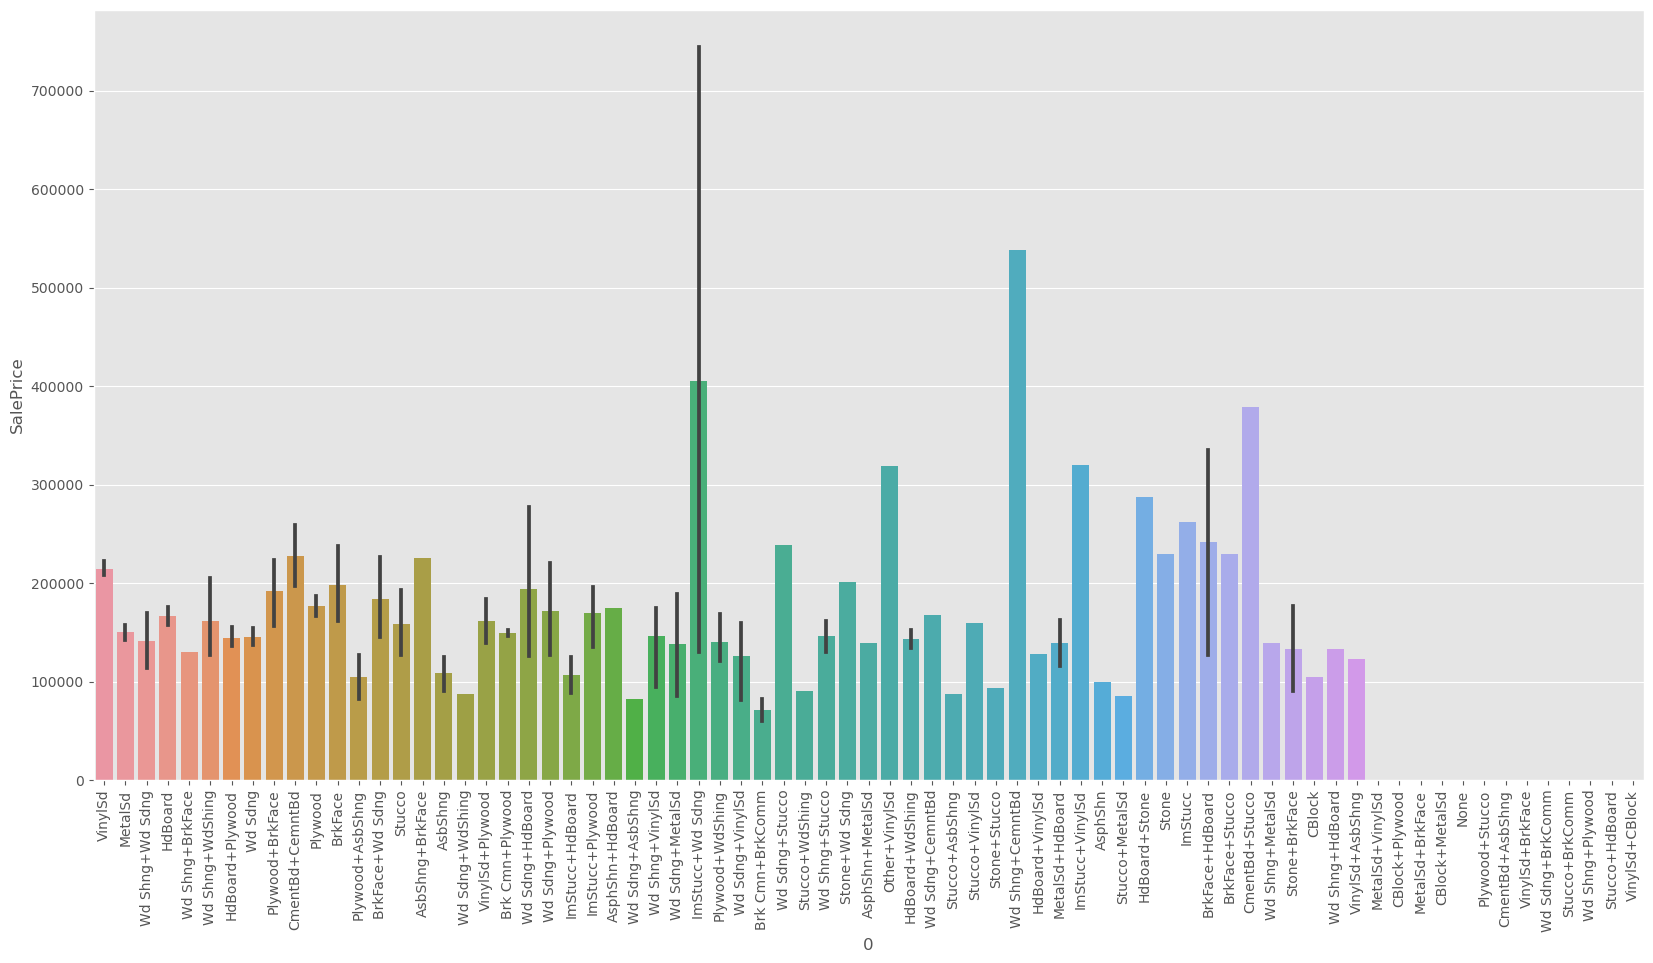

In [217]:
df = df.reset_index()
plt.figure(figsize=(20,10))
g = sns.barplot(x=NoOrderCombo.reset_index()[0],y=df['SalePrice'])
g.set_xticklabels(g.get_xticklabels(),rotation=90)
plt.show()

From the above graph, it looks like WdShng+CemntBg, ImStucc+WdShng, Cemnt+Stucco, Other+VinylSd, and ImStucc+VinylSd yield higher prices compared to the others.

Next, let's look to see if two-material exterior houses have a different price point in general.

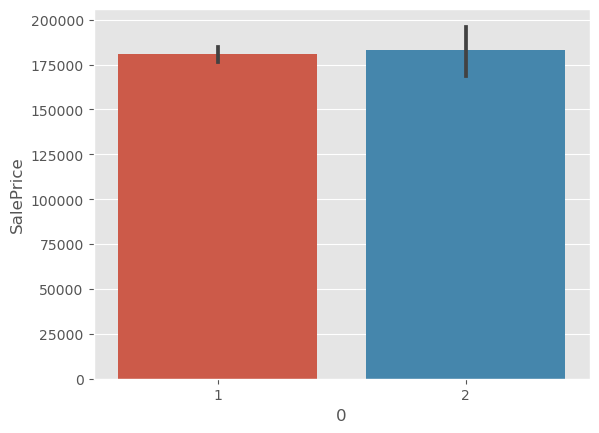

In [218]:
f = lambda x: len(x.split('+'))
numberMaterials = NoOrderCombo.apply(f)
sns.barplot(x=numberMaterials.reset_index()[0],y=df['SalePrice'])
plt.show()

There doesn't seem to be a difference between the two.

# Utilities
To begin with, I noticed HeatingQC is really a numerical measurement, so I mapped it to the dictionary I created earlier. In addition, CentralAir really should be a Boolean Column. I made these conversions below.

Notably, I noticed the the way of encoding quality is the same across several measures, so I made it a dictionary I could reference.

In [219]:
#Excellency_d
excellency_d = {'None':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}

df['HeatingQC'] = df['HeatingQC'].map(excellency_d)
df['CentralAir'] = (df['CentralAir']=='Y').astype('int')

/tmp/ipykernel_103485/2017967103.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(n_rows,2,i+1)


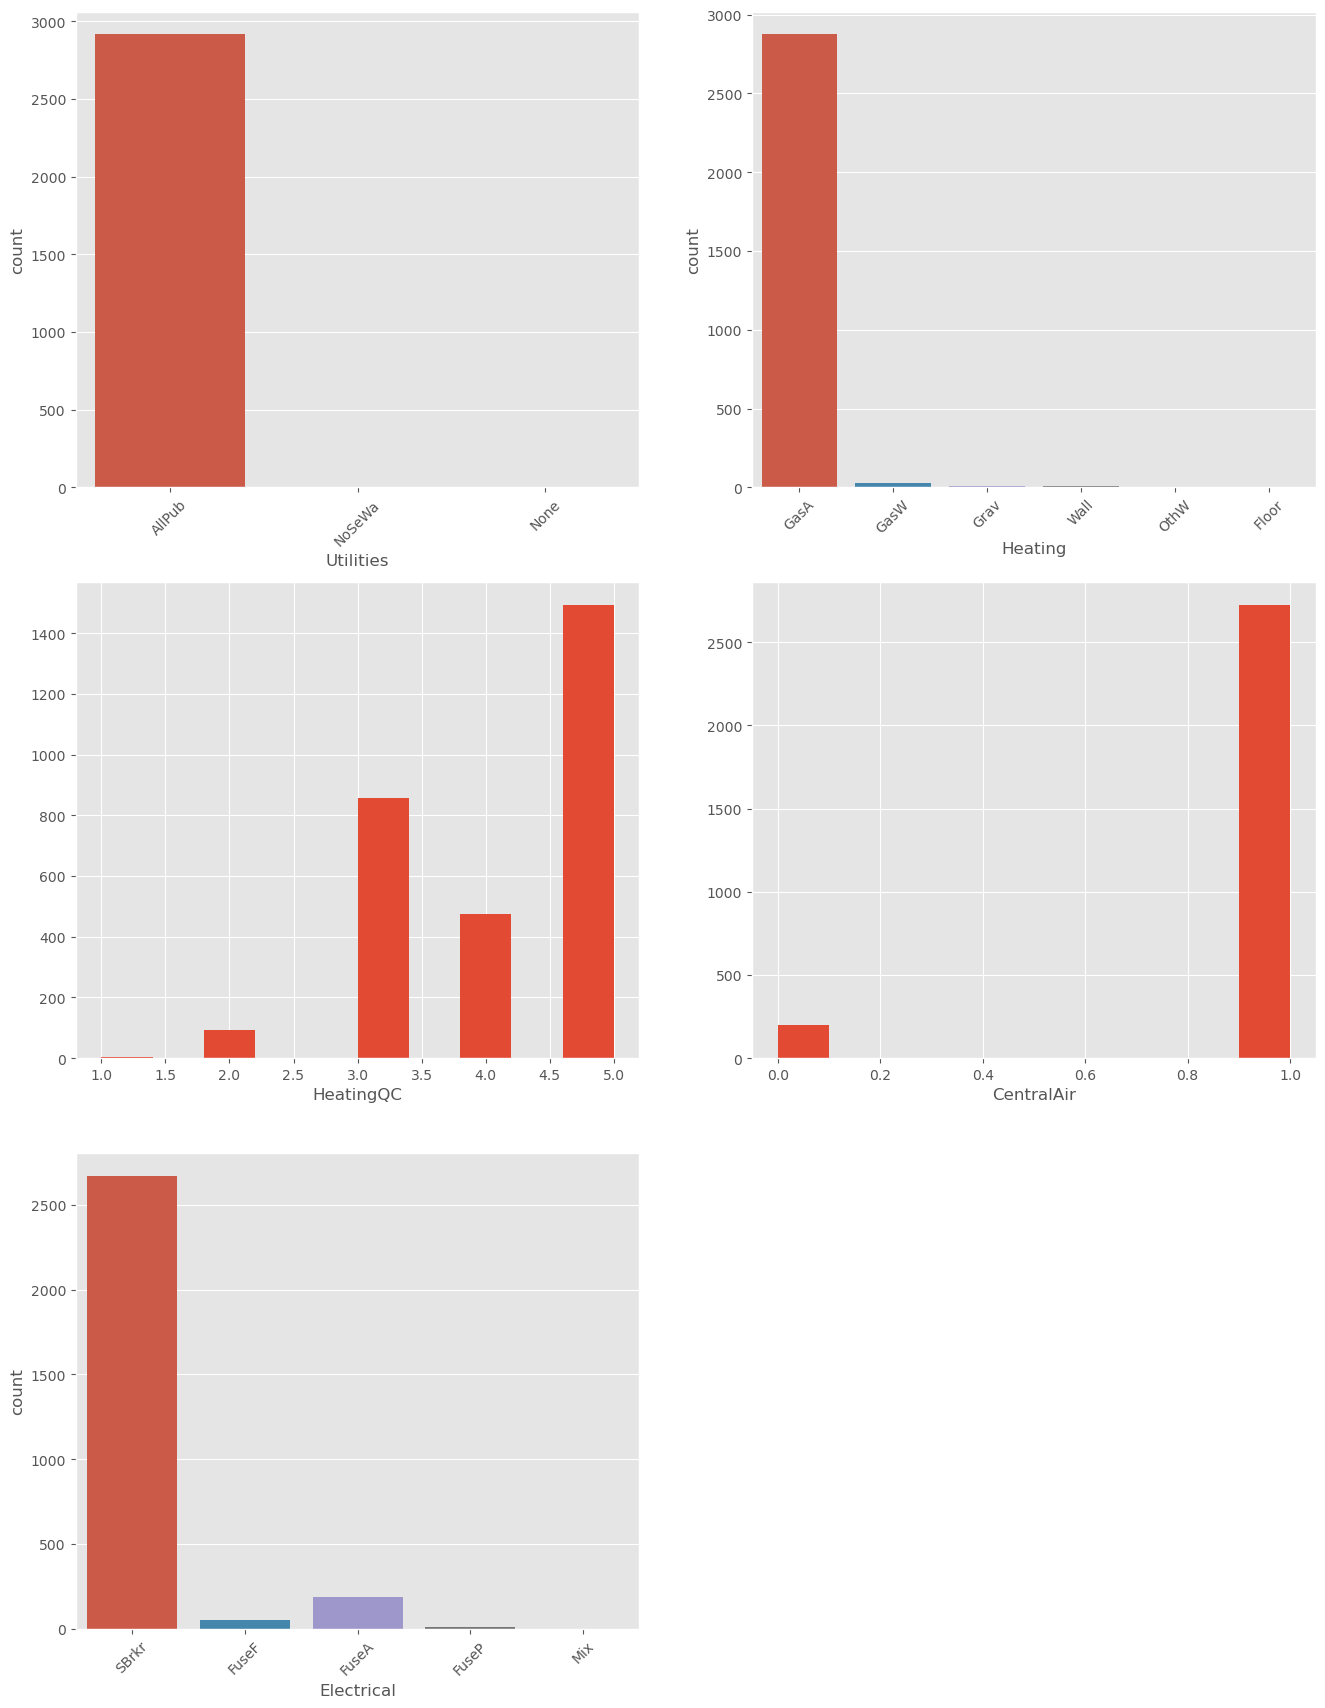

In [220]:
cols = ['Utilities','Heating','HeatingQC','CentralAir','Electrical']
plot_dists(cols)

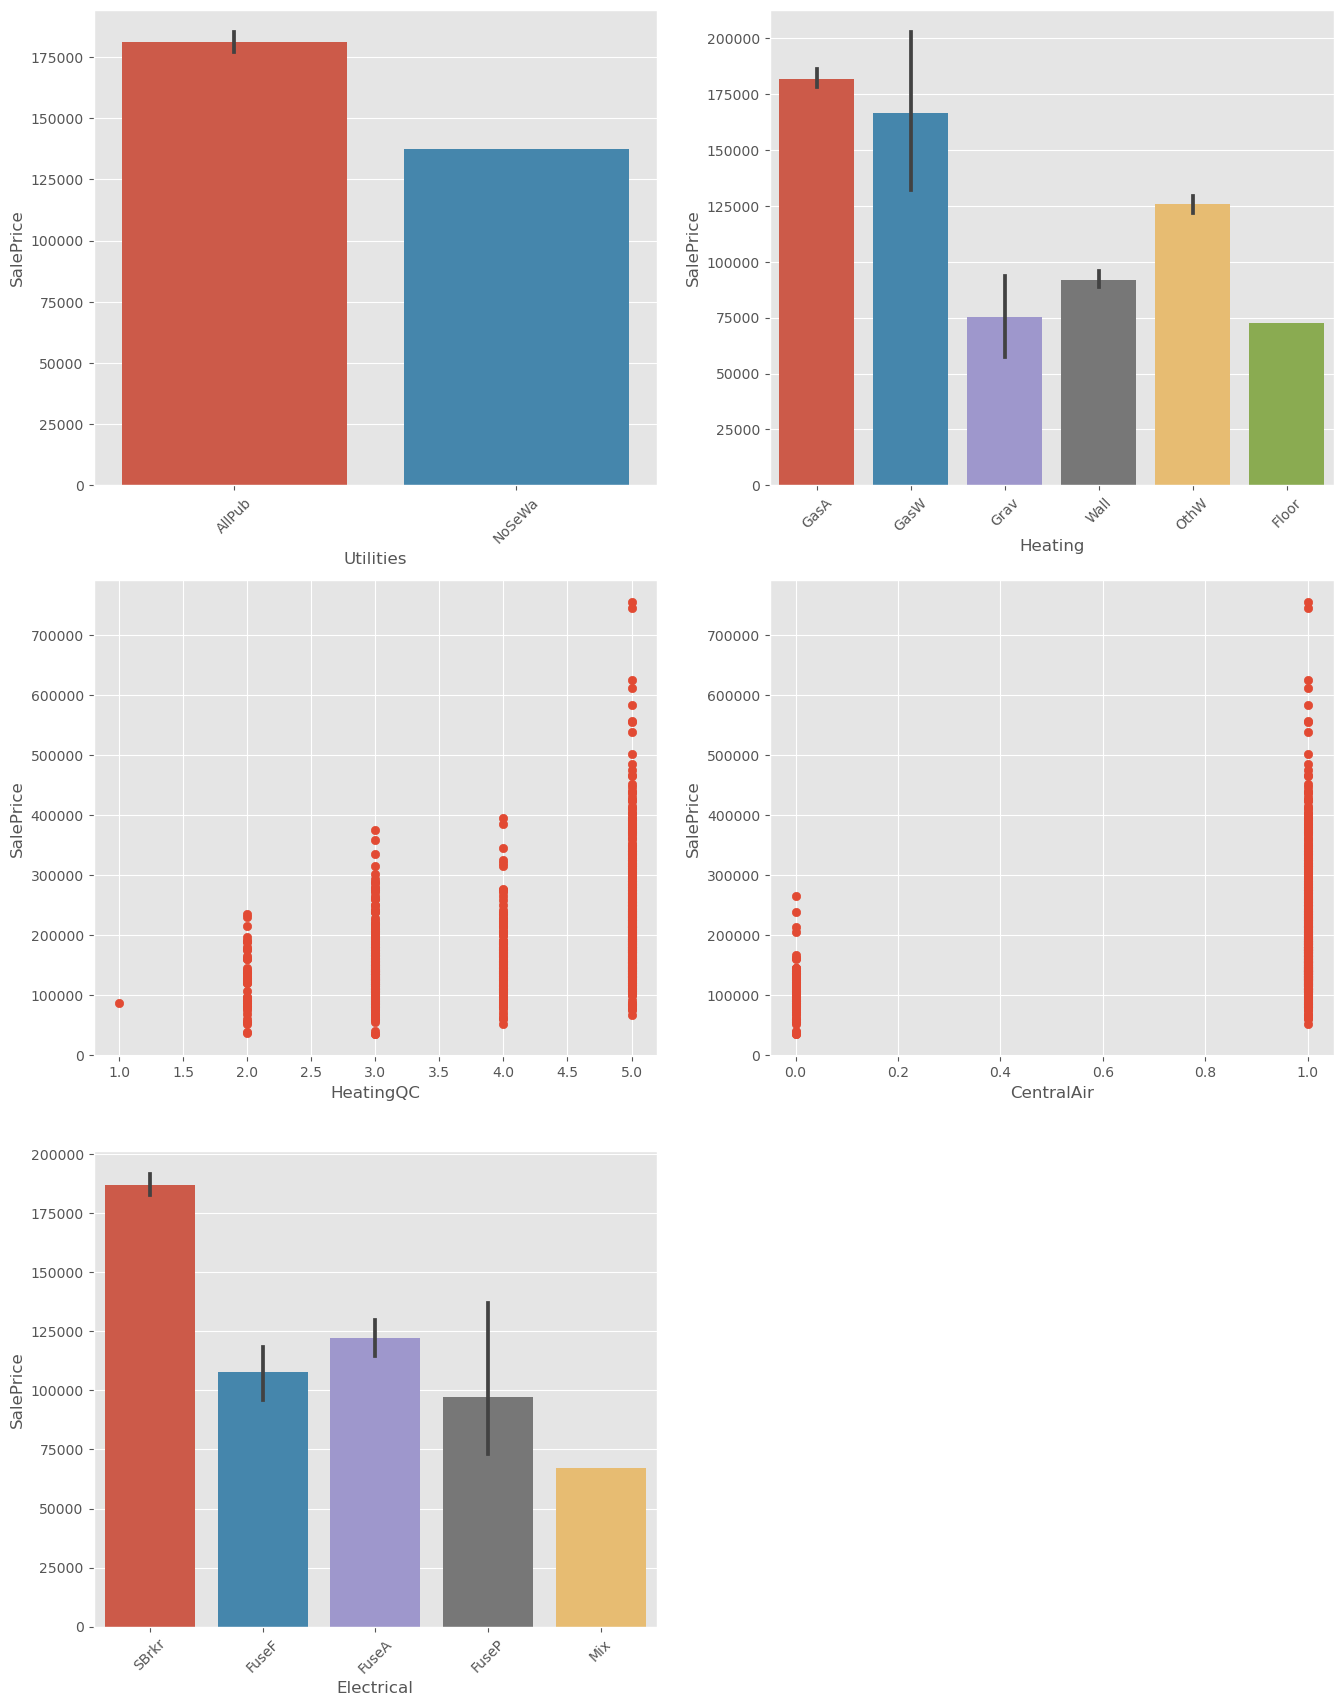

In [221]:
vs_price(cols)

Observations:
* In Utilities, houses with NoSeWa (Electricity and Gas Only) sold of significantly less than those with all utilities, but there is only one sample.
* GasA (Gas forced warm air furnace) and GasW (Gas hot water or steam heat) have significantly higher prices than the other options in Heating, even with GasW's wide standard deviation.
* As expected, HeatingQC has a positive correlation with SalePrice.
* Also as expected, those with CentralAir has a higher price compared to those without,
* In Electrical, those with SBrKr (Standard Circuit Breakers & Romex) sold the highest, while those with mixed sold for the lowest.


# Below the ground qualities

In [222]:
for col in ['BsmtQual','BsmtCond']:
    df[col] = df[col].map(excellency_d)
df['BsmtExposure'] = df['BsmtExposure'].map({'None':0, 'No':1, 'Mn':2, 'Av':3, 'Gd':4})

/tmp/ipykernel_103485/2017967103.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(n_rows,2,i+1)


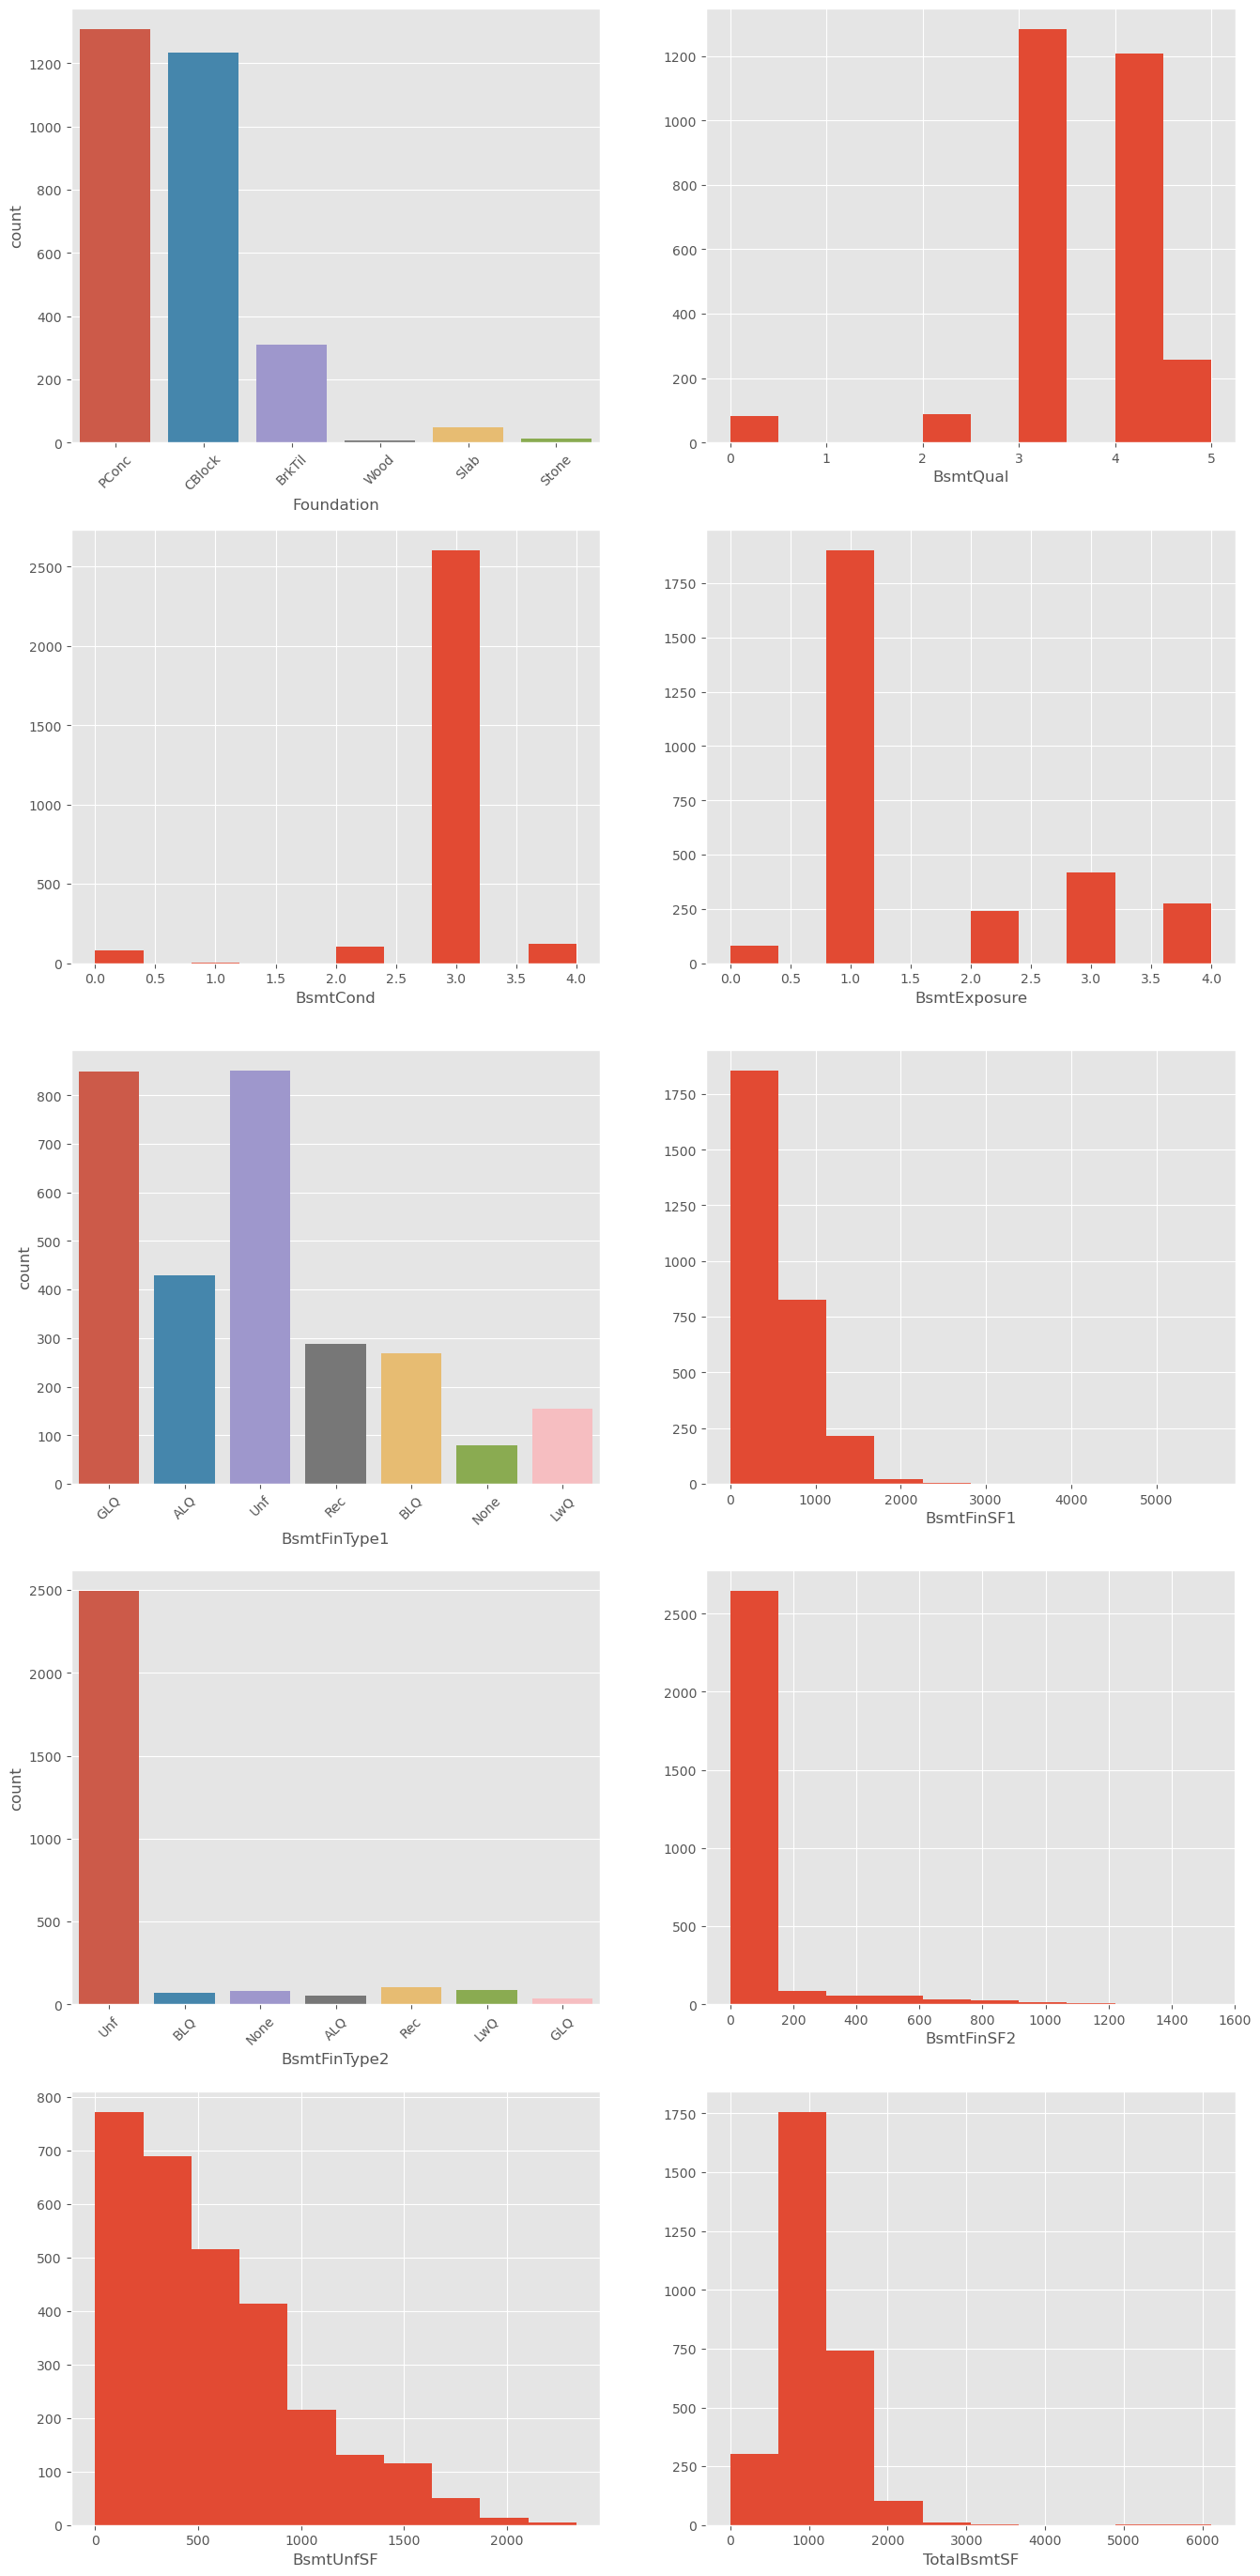

In [223]:
cols = ['Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtFinType2','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF']
plot_dists(cols)

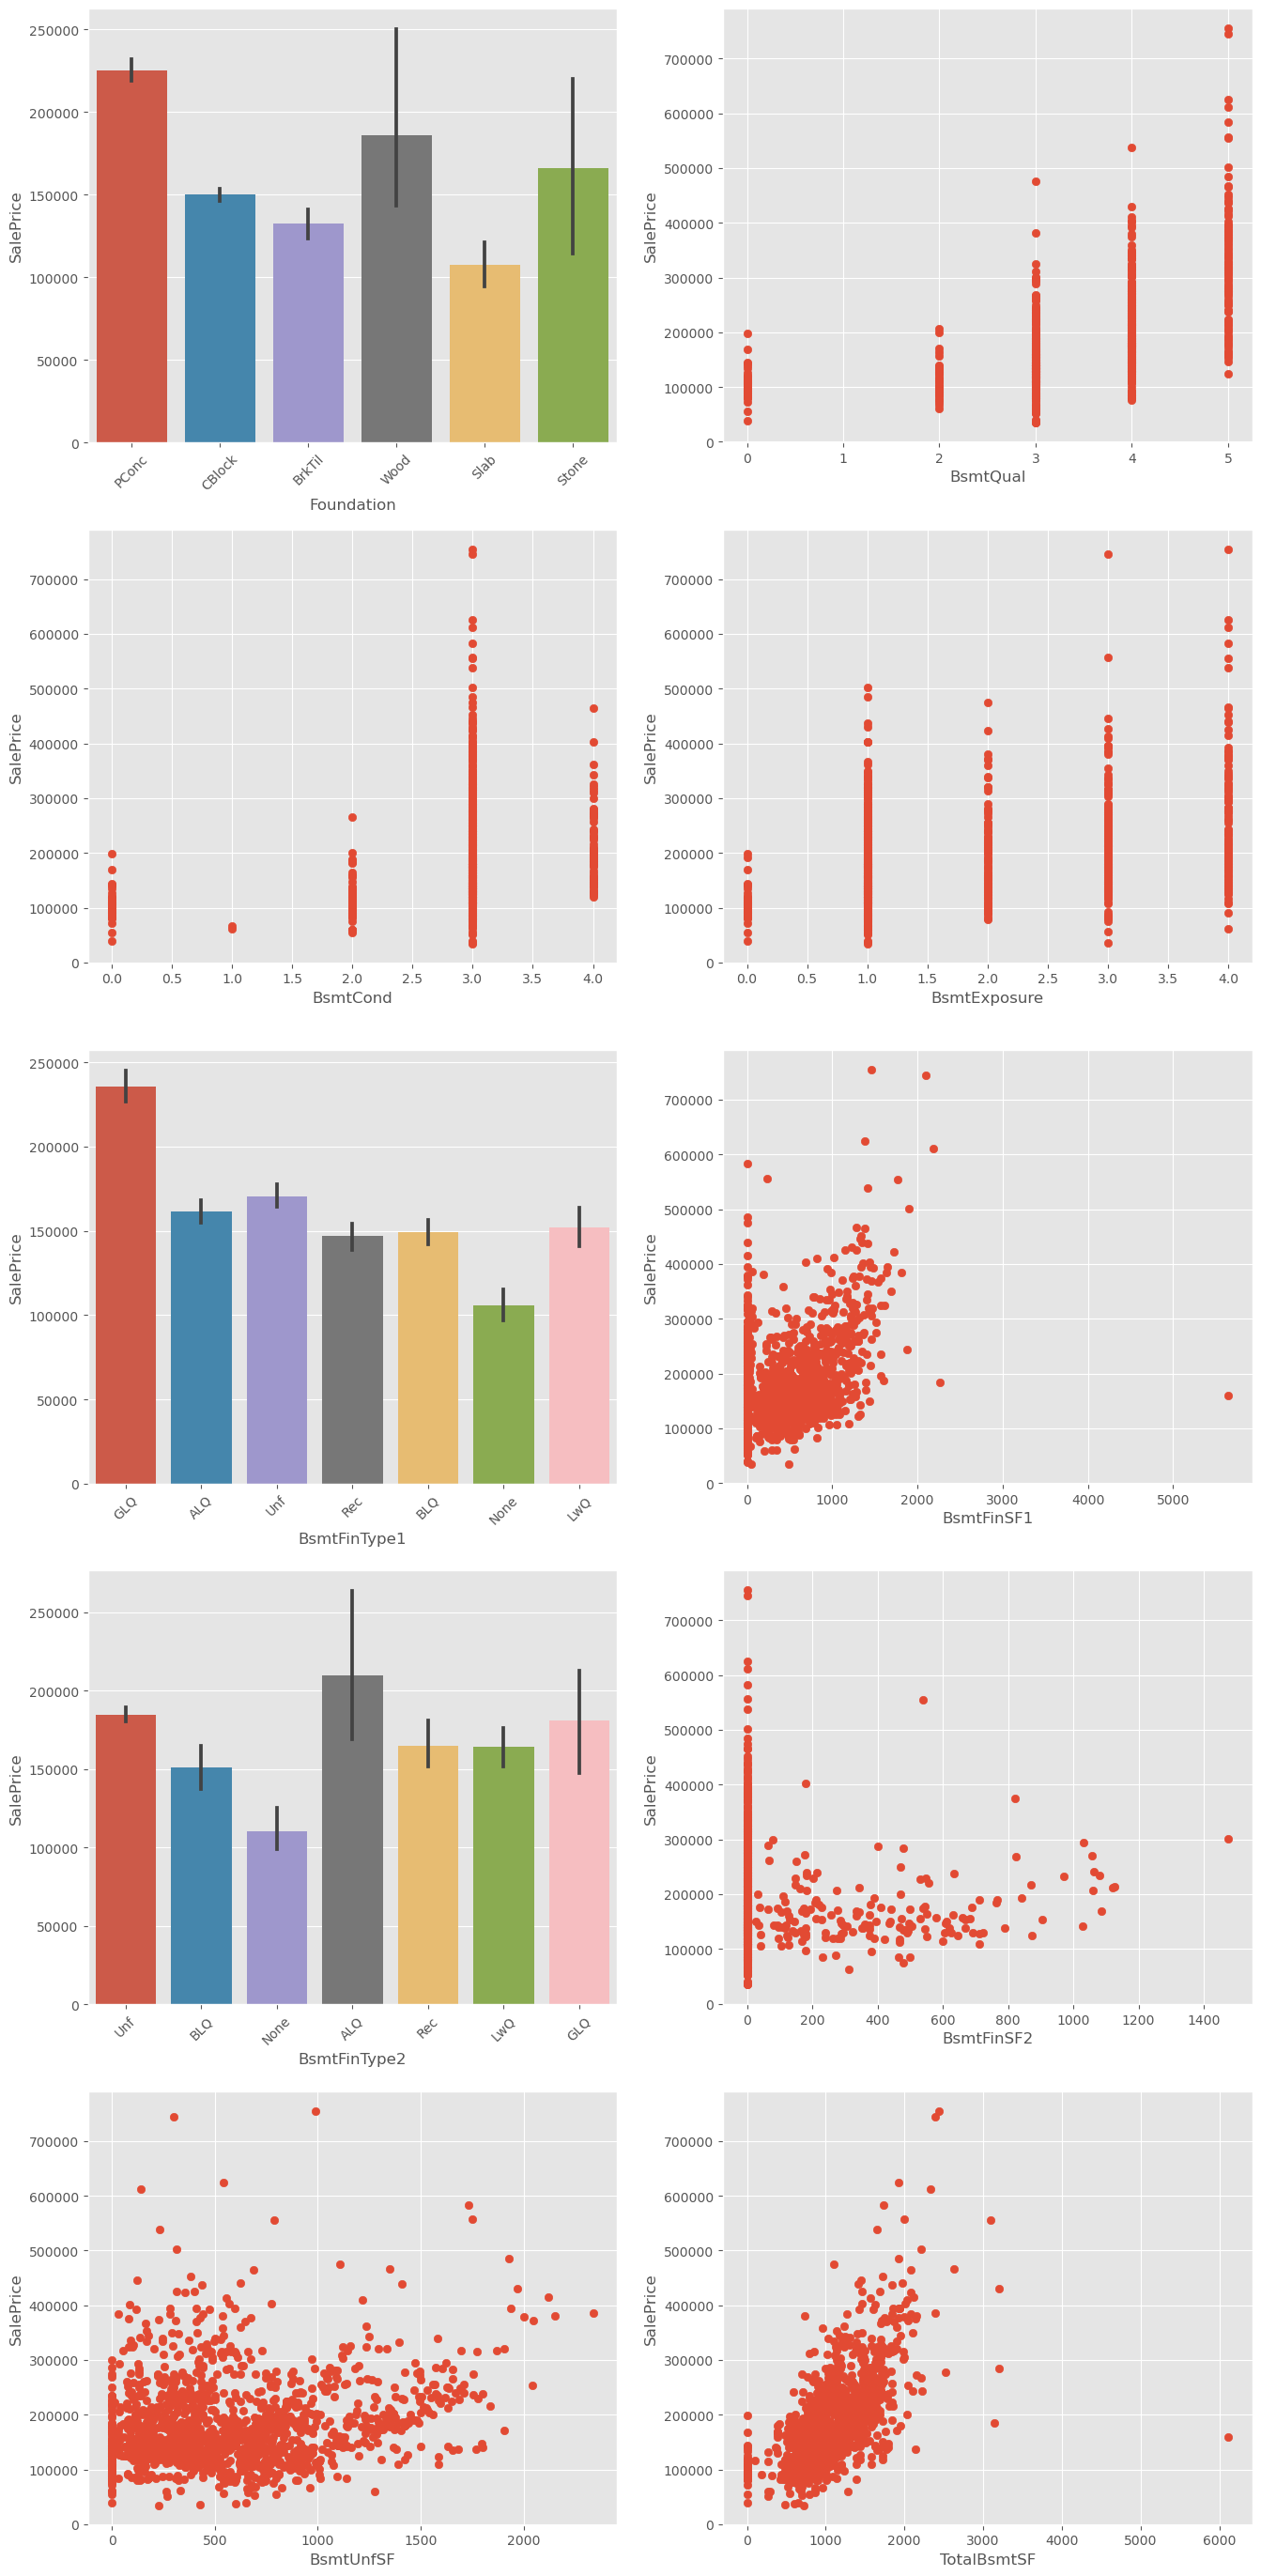

In [224]:
vs_price(cols)

Observations:
* Foundation: CBlock, BrkTil, and Slob all have significantly lower prices, and PConc is significantly higher. The others, Wood and Stone, have very wide standard deviations.
* BsmtQual and Bsmt Cond: Generally the higher quality the basement the higher the price was for the house, which is not surprising. However, it seems that houses with a "fair" quality basement sold as approximately the same price point as houses with no basement at all, and houses with a "poor" quality basement actually sold cheaper.
* BsmtExposure: Of course, having a basement with good exposure is more expensive than having no basement at all.
* BsmtFinType1 and BsmtFinType2: This is a similar situation with Exterior1st and Exterior2nd, where there's a lot of variation in the categories' relationship to each other. The only constant is having no basement yielded lower prices than all of them.
* BsmtFinSF1 and TotalBsmtSF have a strong positive correlation with SalePrice.
* The positive correlation is not as obvious in BsmtFinSF2.
* BsmtUnfSF seems to have a curvilinear relationship going on with Saleprice, with the a negative relationship when BsmtUnfSF < 1000 and a positive relationship when BsmtUnfSF > 1000.

Reading the documentation, it seems that BsmtFinTypes 1 and 2 are in a similar situation with Condition1 and Condition2 earlier, where each unique value in column should really be its own category, filled with the values in the BsmtFinSF1 and 2, respectively.

In [225]:
BsmtFinType1 = df.pivot(columns='BsmtFinType1',values='BsmtFinSF1').fillna(0)
BsmtFinType2 = df.pivot(columns='BsmtFinType2',values='BsmtFinSF2').fillna(0)

I wonder how many houses have one type of basement finish vs two, and if that has an impact on the house's SalePrice.

In [226]:
NumBsmtFinTpes = df.apply(lambda x: 2 if x.BsmtFinType1 != x.BsmtFinType2 else 1, axis=1)
NumBsmtFinTpes.value_counts()

2    1988
1     931
dtype: int64

<Axes: ylabel='SalePrice'>

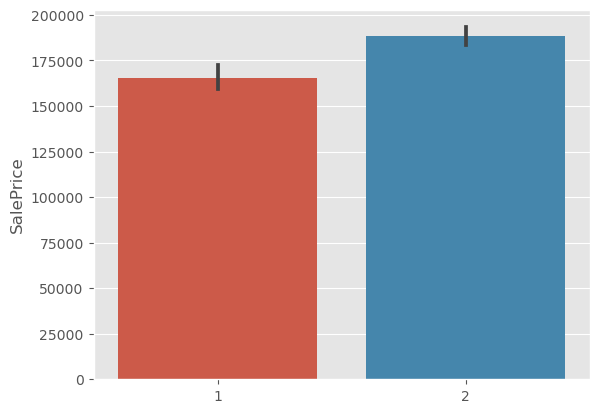

In [227]:
sns.barplot(x=NumBsmtFinTpes,y=df['SalePrice'])

Looks like there is a difference between the SalePrice of houses with one type of basement finish vs two. I'll add that as a new column. Also, lets sum up the amount of area for each type of finish.

In [228]:
df['NumBsmtFinType'] = NumBsmtFinTpes

BsmtAreaTypes = BsmtFinType1 + BsmtFinType2
BsmtAreaTypes.columns = BsmtAreaTypes.columns.map(lambda x: 'Bsmt_{}_Area'.format(x))
BsmtAreaTypes

BsmtFinType1  Bsmt_ALQ_Area  Bsmt_BLQ_Area  Bsmt_GLQ_Area  Bsmt_LwQ_Area  \
0                       0.0            0.0          706.0            0.0   
1                     978.0            0.0            0.0            0.0   
2                       0.0            0.0          486.0            0.0   
3                     216.0            0.0            0.0            0.0   
4                       0.0            0.0          655.0            0.0   
5                       0.0            0.0          732.0            0.0   
6                       0.0            0.0         1369.0            0.0   
7                     859.0           32.0            0.0            0.0   
8                       0.0            0.0            0.0            0.0   
9                       0.0            0.0          851.0            0.0   
10                      0.0            0.0            0.0            0.0   
11                      0.0            0.0          998.0            0.0   
12                    737.0            0.0            0.0            0.0   
13                      0.0            0.0            0.0            0.0   
14                      0.0          733.0            0.0            0.0   
15                      0.0            0.0            0.0            0.0   
16                    578.0            0.0            0.0            0.0   
17                      0.0            0.0            0.0            0.0   
18                      0.0            0.0          646.0            0.0   
19                      0.0            0.0            0.0          504.0   
20                      0.0            0.0            0.0            0.0   
21                      0.0            0.0            0.0            0.0   
22                      0.0            0.0            0.0            0.0   
23                      0.0            0.0          840.0            0.0   
24                    668.0            0.0            0.0            0.0   
25                      0.0            0.0            0.0            0.0   
26                      0.0          234.0            0.0            0.0   
27                      0.0            0.0         1218.0            0.0   
28                      0.0         1277.0            0.0            0.0   
29                      0.0            0.0            0.0            0.0   
30                      0.0            0.0            0.0            0.0   
31                      0.0            0.0            0.0            0.0   
32                      0.0            0.0            0.0            0.0   
33                      0.0            0.0            0.0            0.0   
34                      0.0            0.0         1153.0            0.0   
35                      0.0            0.0            0.0            0.0   
36                      0.0            0.0            0.0            0.0   
37                      0.0            0.0            0.0            0.0   
38                      0.0            0.0          731.0            0.0   
39                      0.0            0.0            0.0            0.0   
40                      0.0            0.0            0.0            0.0   
41                      0.0          967.0            0.0            0.0   
42                    747.0            0.0            0.0           93.0   
43                      0.0          491.0            0.0          280.0   
44                    179.0          506.0            0.0            0.0   
45                      0.0            0.0          456.0            0.0   
46                      0.0            0.0         1351.0            0.0   
47                      0.0            0.0           24.0            0.0   
48                      0.0            0.0            0.0            0.0   
49                      0.0          763.0            0.0            0.0   
50                      0.0            0.0          182.0            0.0   
51                      0.0            0.0      

In [229]:
df = pd.concat([df,BsmtAreaTypes],axis=1)

For BsmtUnfSF, I had wondered if a squaring the basement surface area would reveal a more linear relationship with the dependent variable, but I don't think that is the case.

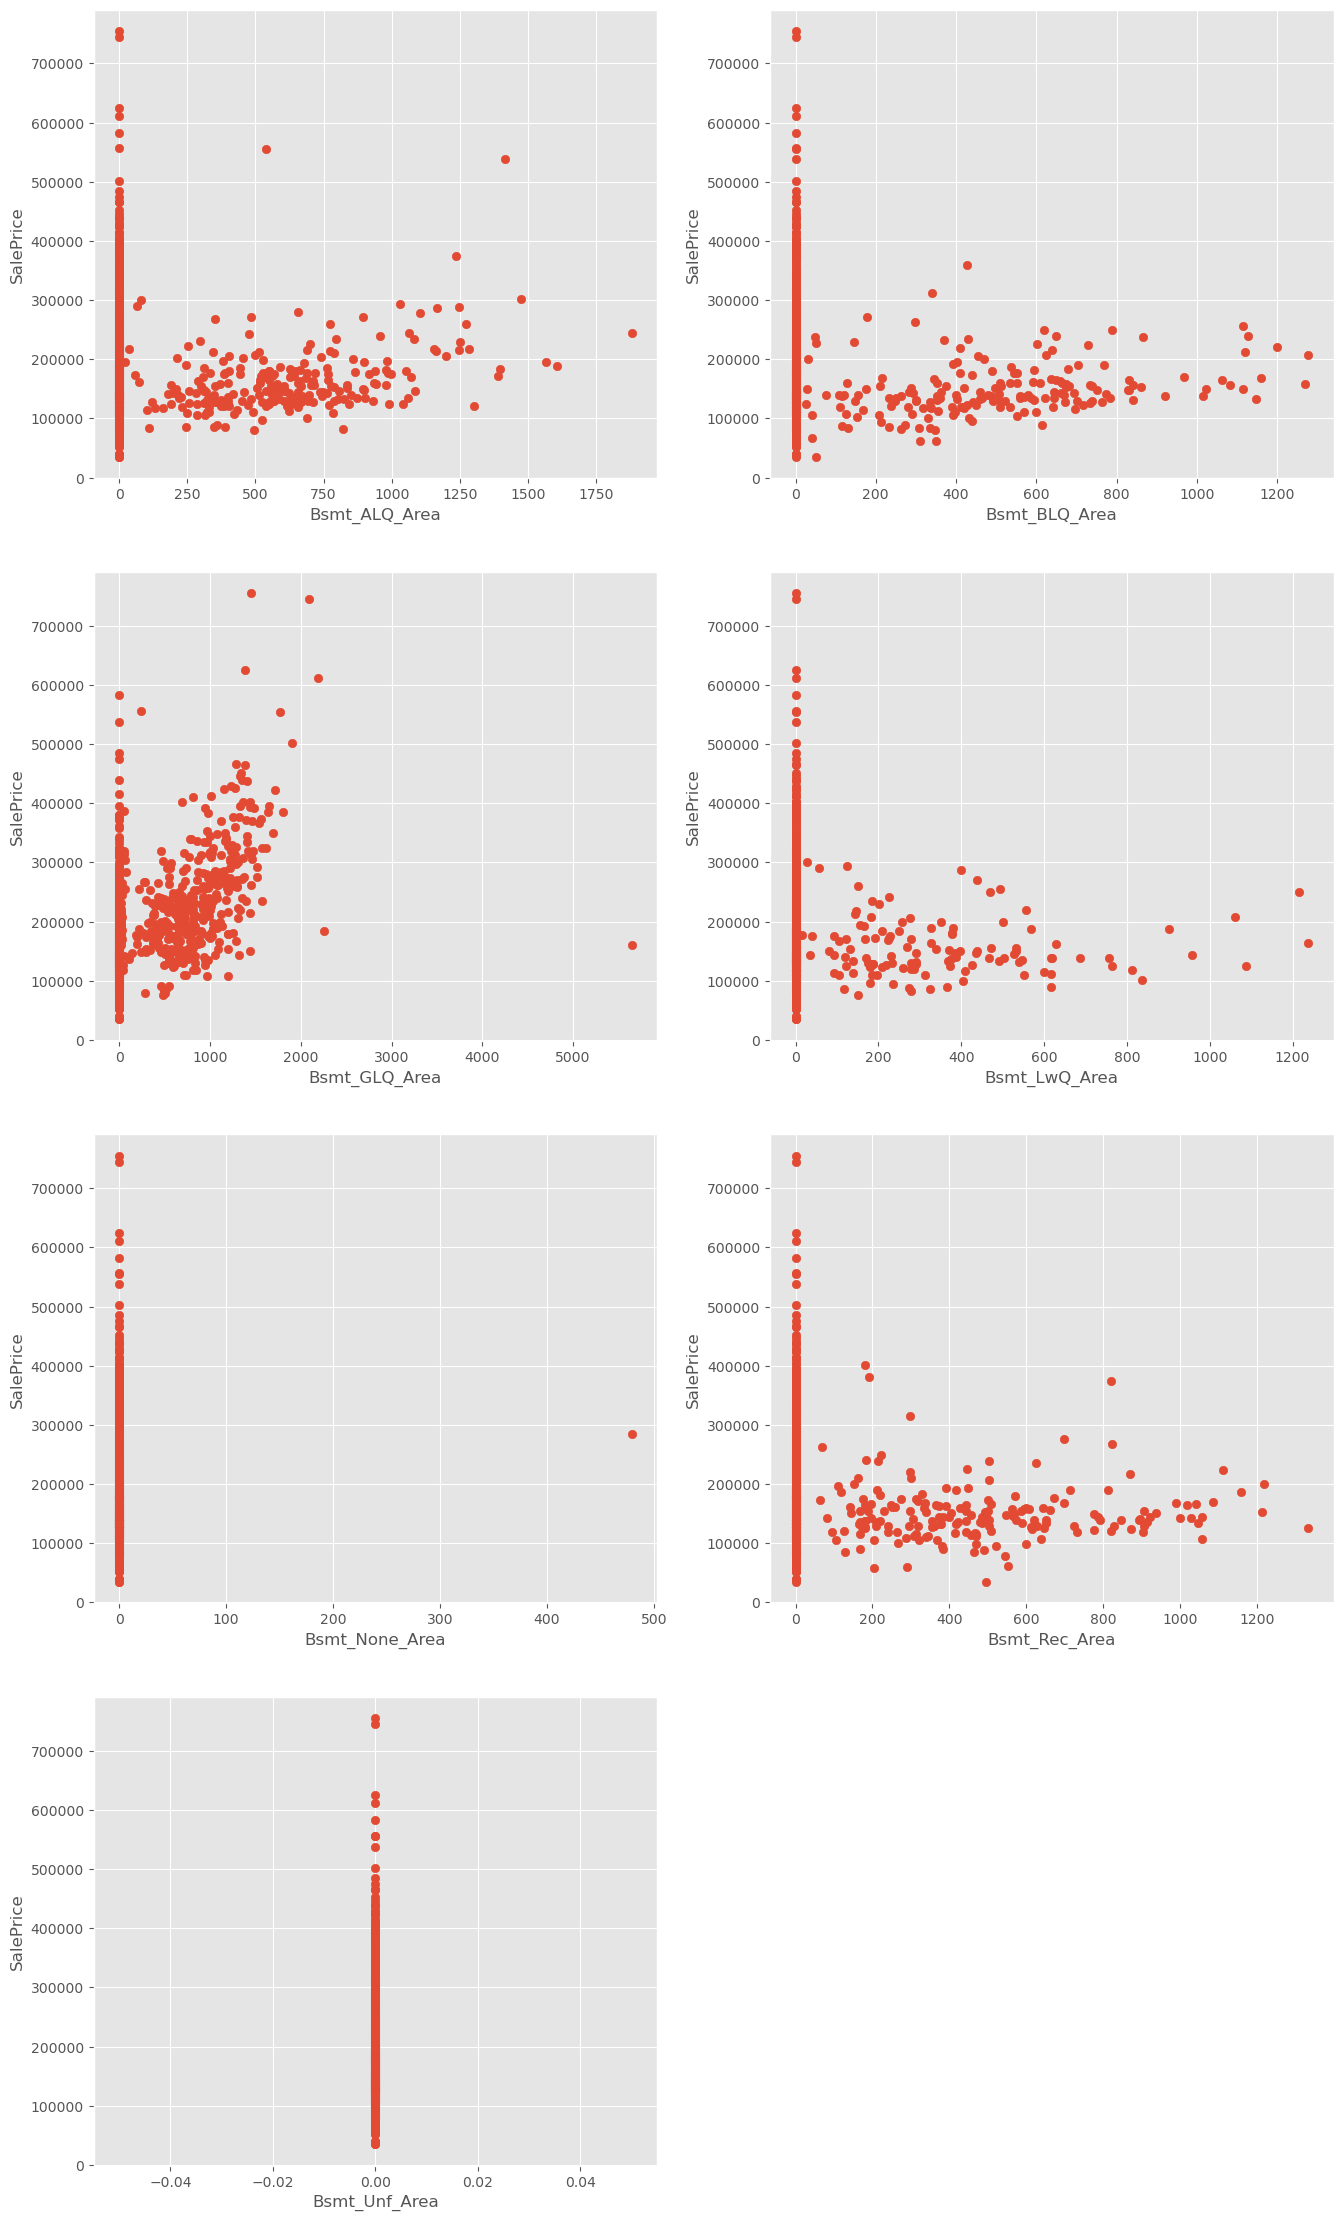

In [230]:
vs_price(BsmtAreaTypes.columns)

Generally, none of the basement area variables had a correlation with SalePrice. I'm going to delete the Grg_None_Area and Grg_Unf_Area columns because both of them practically only have one value, so it's pointless to include them.

In [231]:
df = df.drop(['Bsmt_None_Area','Bsmt_Unf_Area'],axis=1)

# Garage Variables

In [232]:
for col in ['GarageQual','GarageCond']:
    df[col] = df[col].map(excellency_d)
df['PavedDrive'] = df['PavedDrive'].map({'Y':1,'N':0,'P':0.5})    

/tmp/ipykernel_103485/2017967103.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(n_rows,2,i+1)


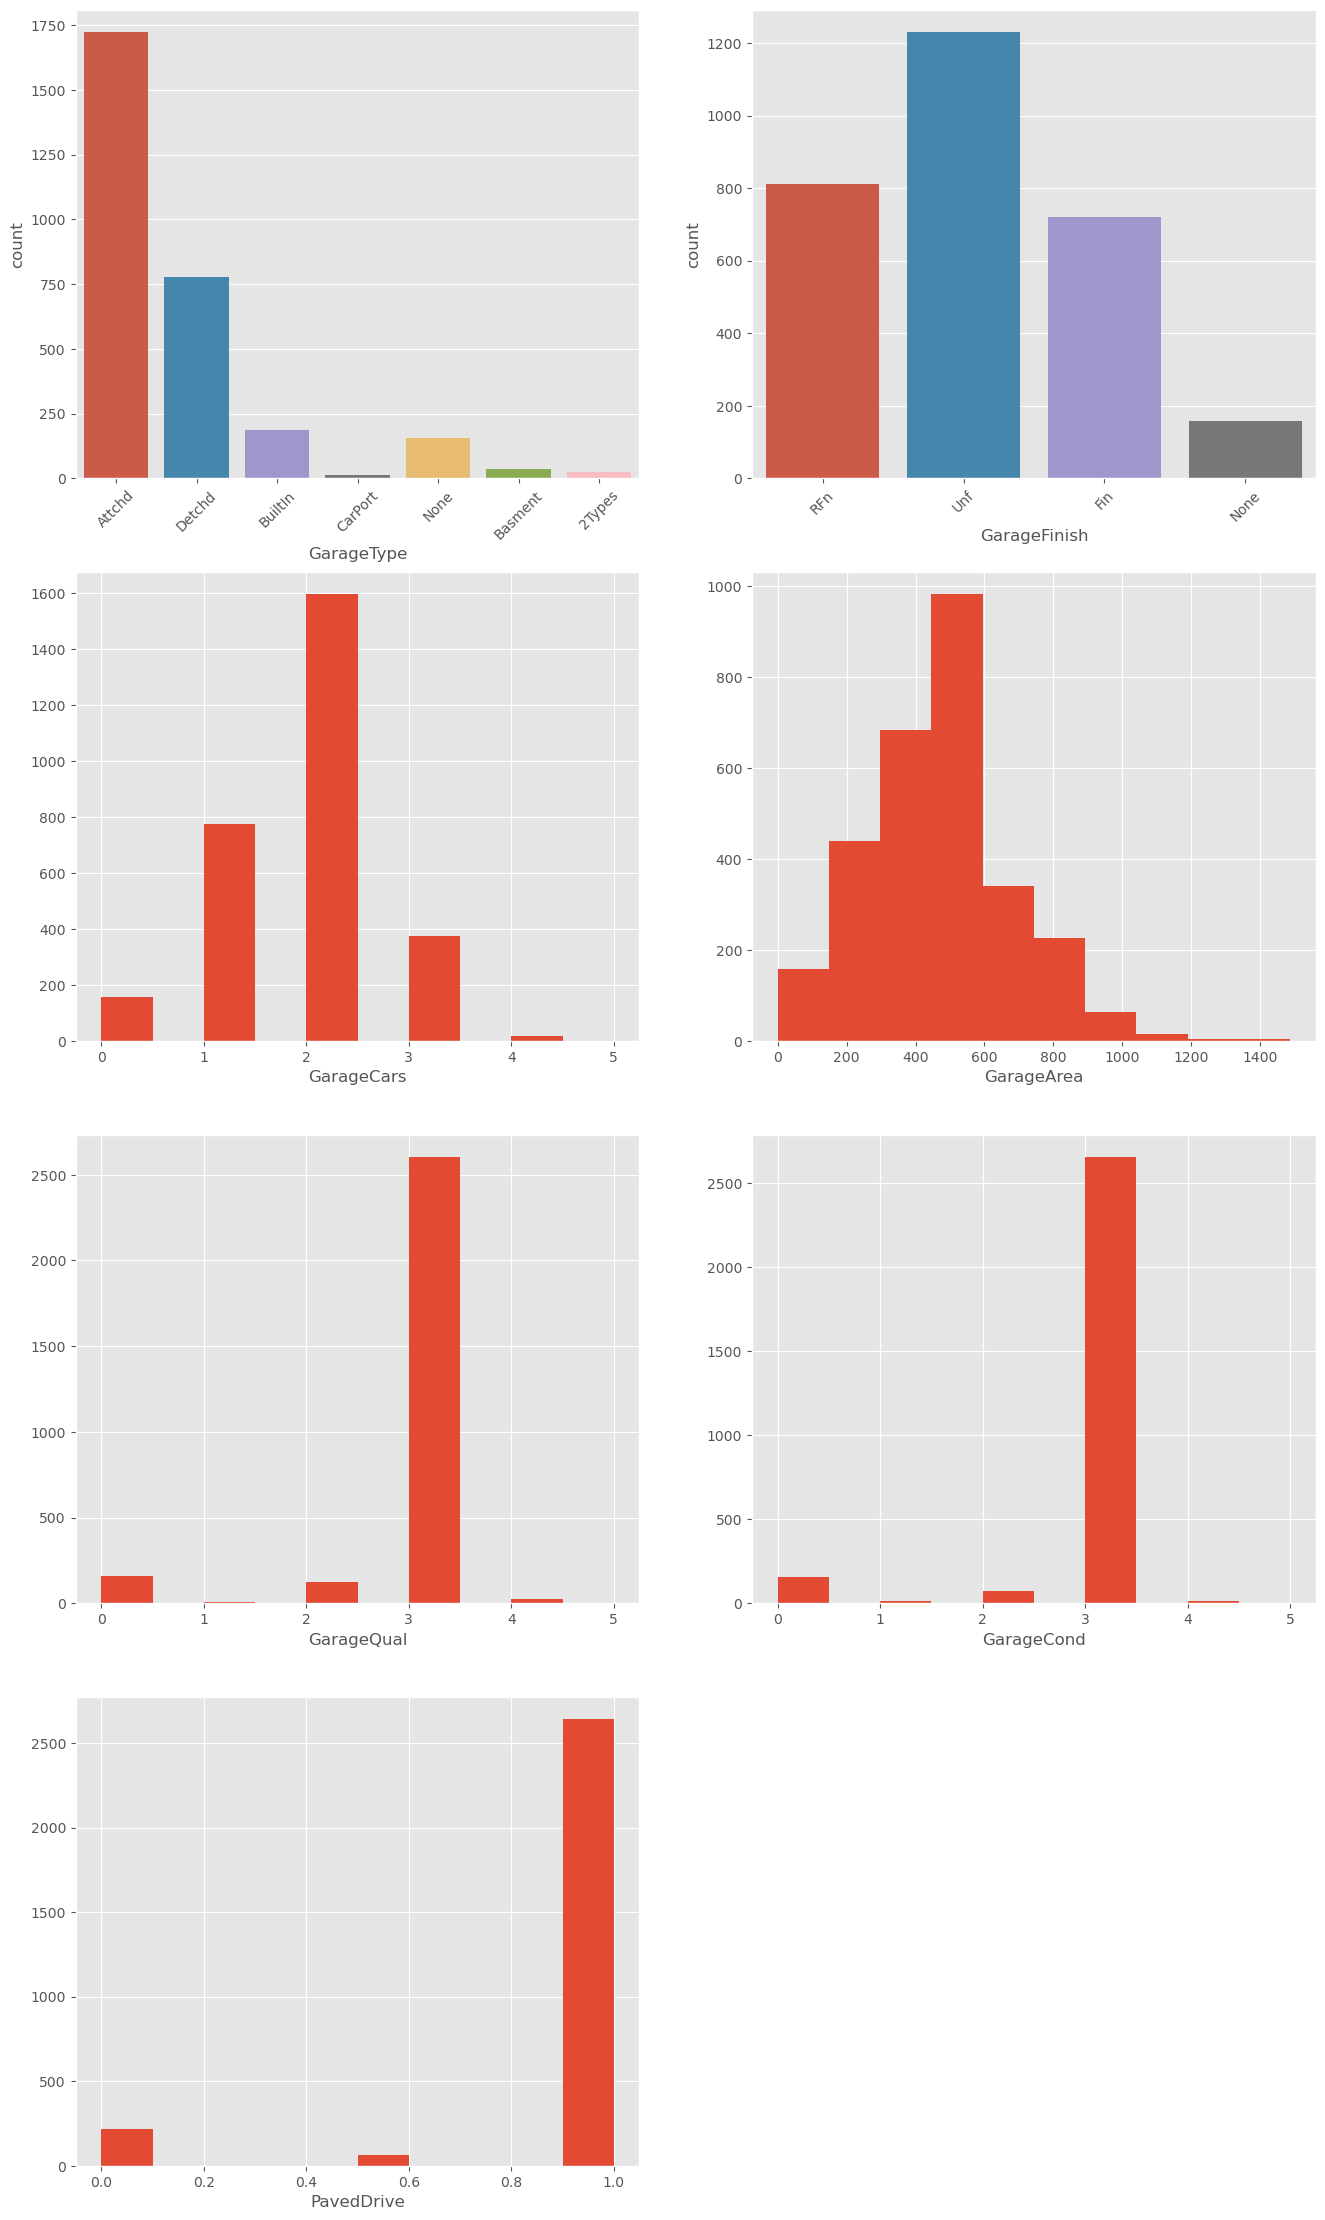

In [233]:
cols = ['GarageType','GarageFinish','GarageCars','GarageArea','GarageQual','GarageCond','PavedDrive']
plot_dists(cols)

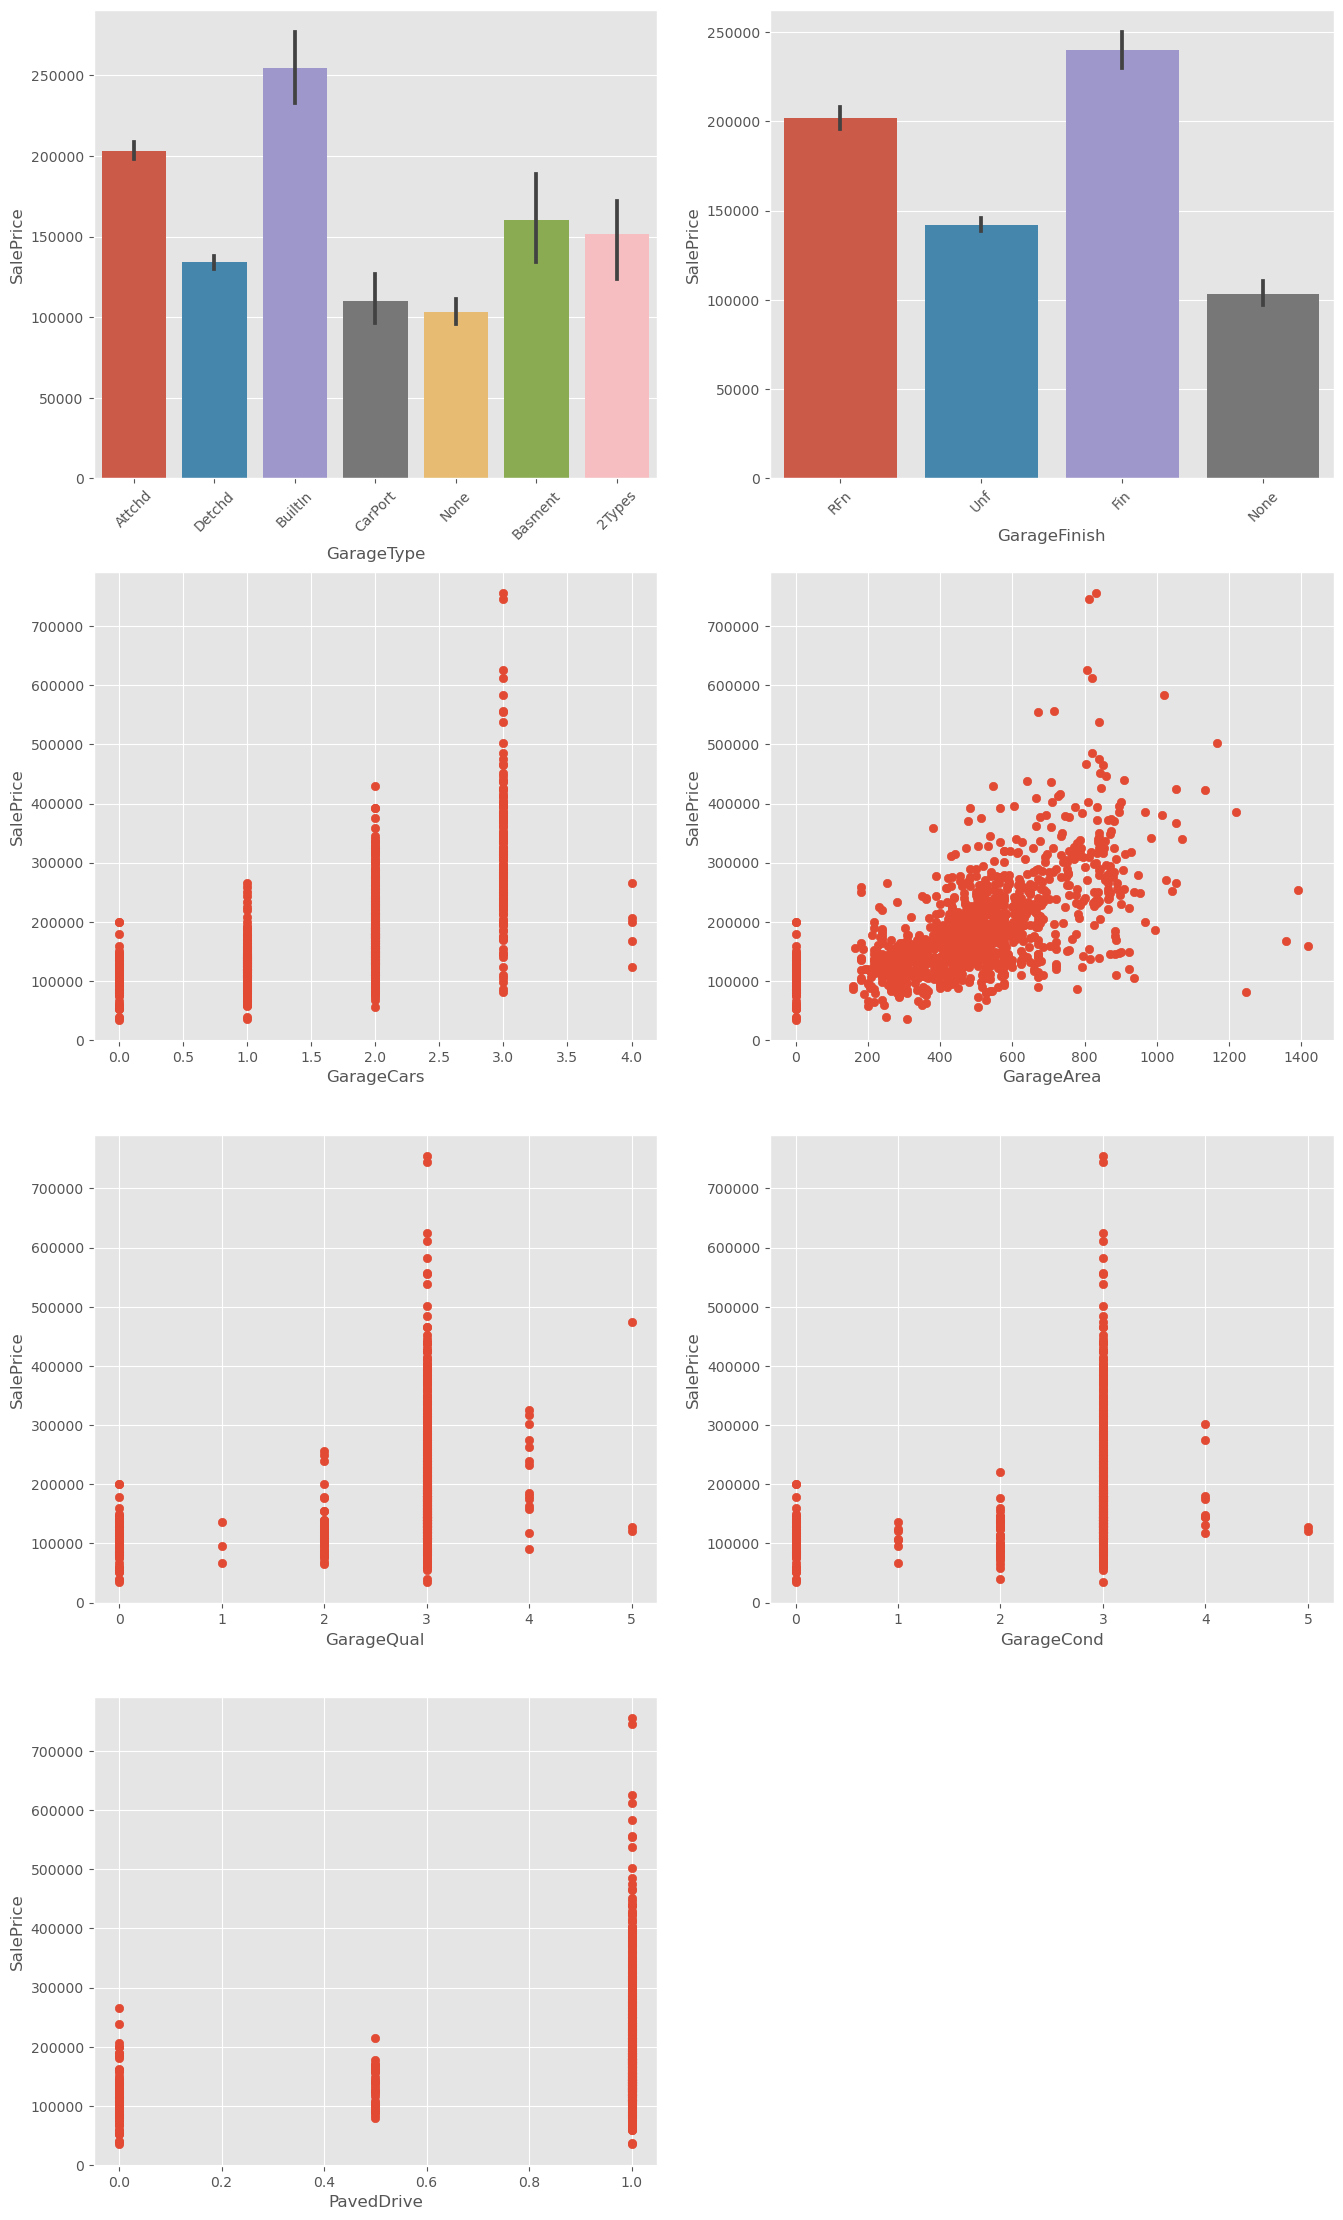

In [234]:
vs_price(cols)

Observations:
* GarageType: Builtin had the highest, and None and CarPort had the lowest. 
* GarageYrBuilt: generally demonstrated a positive linear relationship with the SalePrice. However, need to investigate is this is just a reflection of salePrice's relationship with the year the house was built.
* GarageFinish: All the different options had significantly different SalePrices
* GarageArea and GarageCars: both show that larger garages correlate with higher prices.
* GarageQual and GarageCond: Looks like an average/typical garage condition correlates with higher prices.
* PavedDrive: Looks like those with a paved Driveway had higher prices.

I am going to create two columns, IsAvgGCond and IsAvgGQual, indicating an average garage condition and an average garage quality, respectively. As shown in the plots below, such columns might be helpful for prediction.

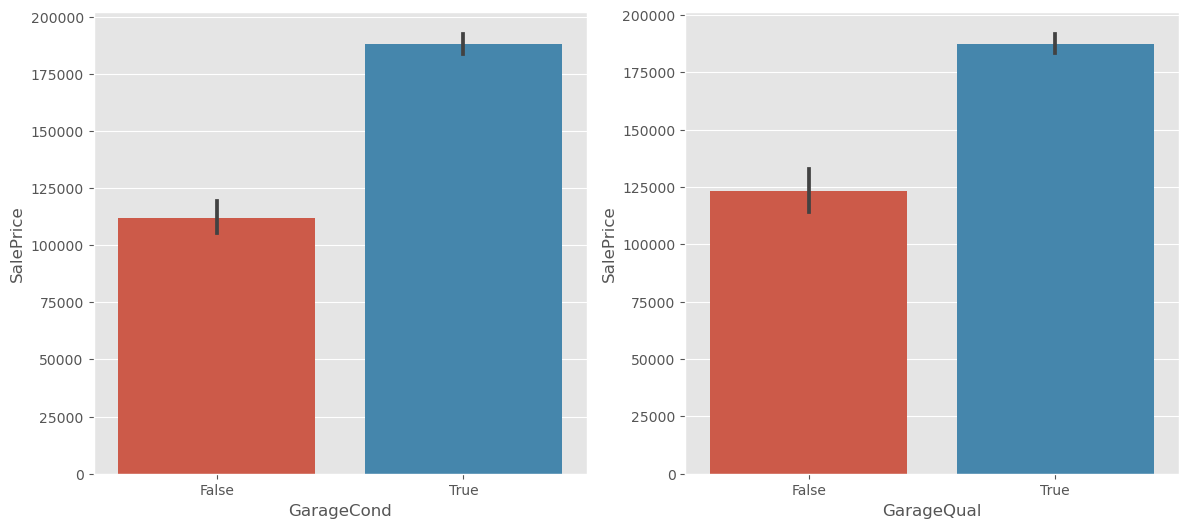

In [235]:
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
sns.barplot(x=(df['GarageCond']==3), y=(df['SalePrice']))

plt.subplot(1,2,2)
sns.barplot(x=(df['GarageQual']==3), y=(df['SalePrice']))
plt.show()

In [236]:
df['IsAvgGCond'] = df['GarageCond']==3
df['IsAvgGQual'] = df['GarageQual']==3

# Rooms above ground

In [237]:
df['KitchenQual'] = df['KitchenQual'].map(excellency_d) 

/tmp/ipykernel_103485/2017967103.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(n_rows,2,i+1)


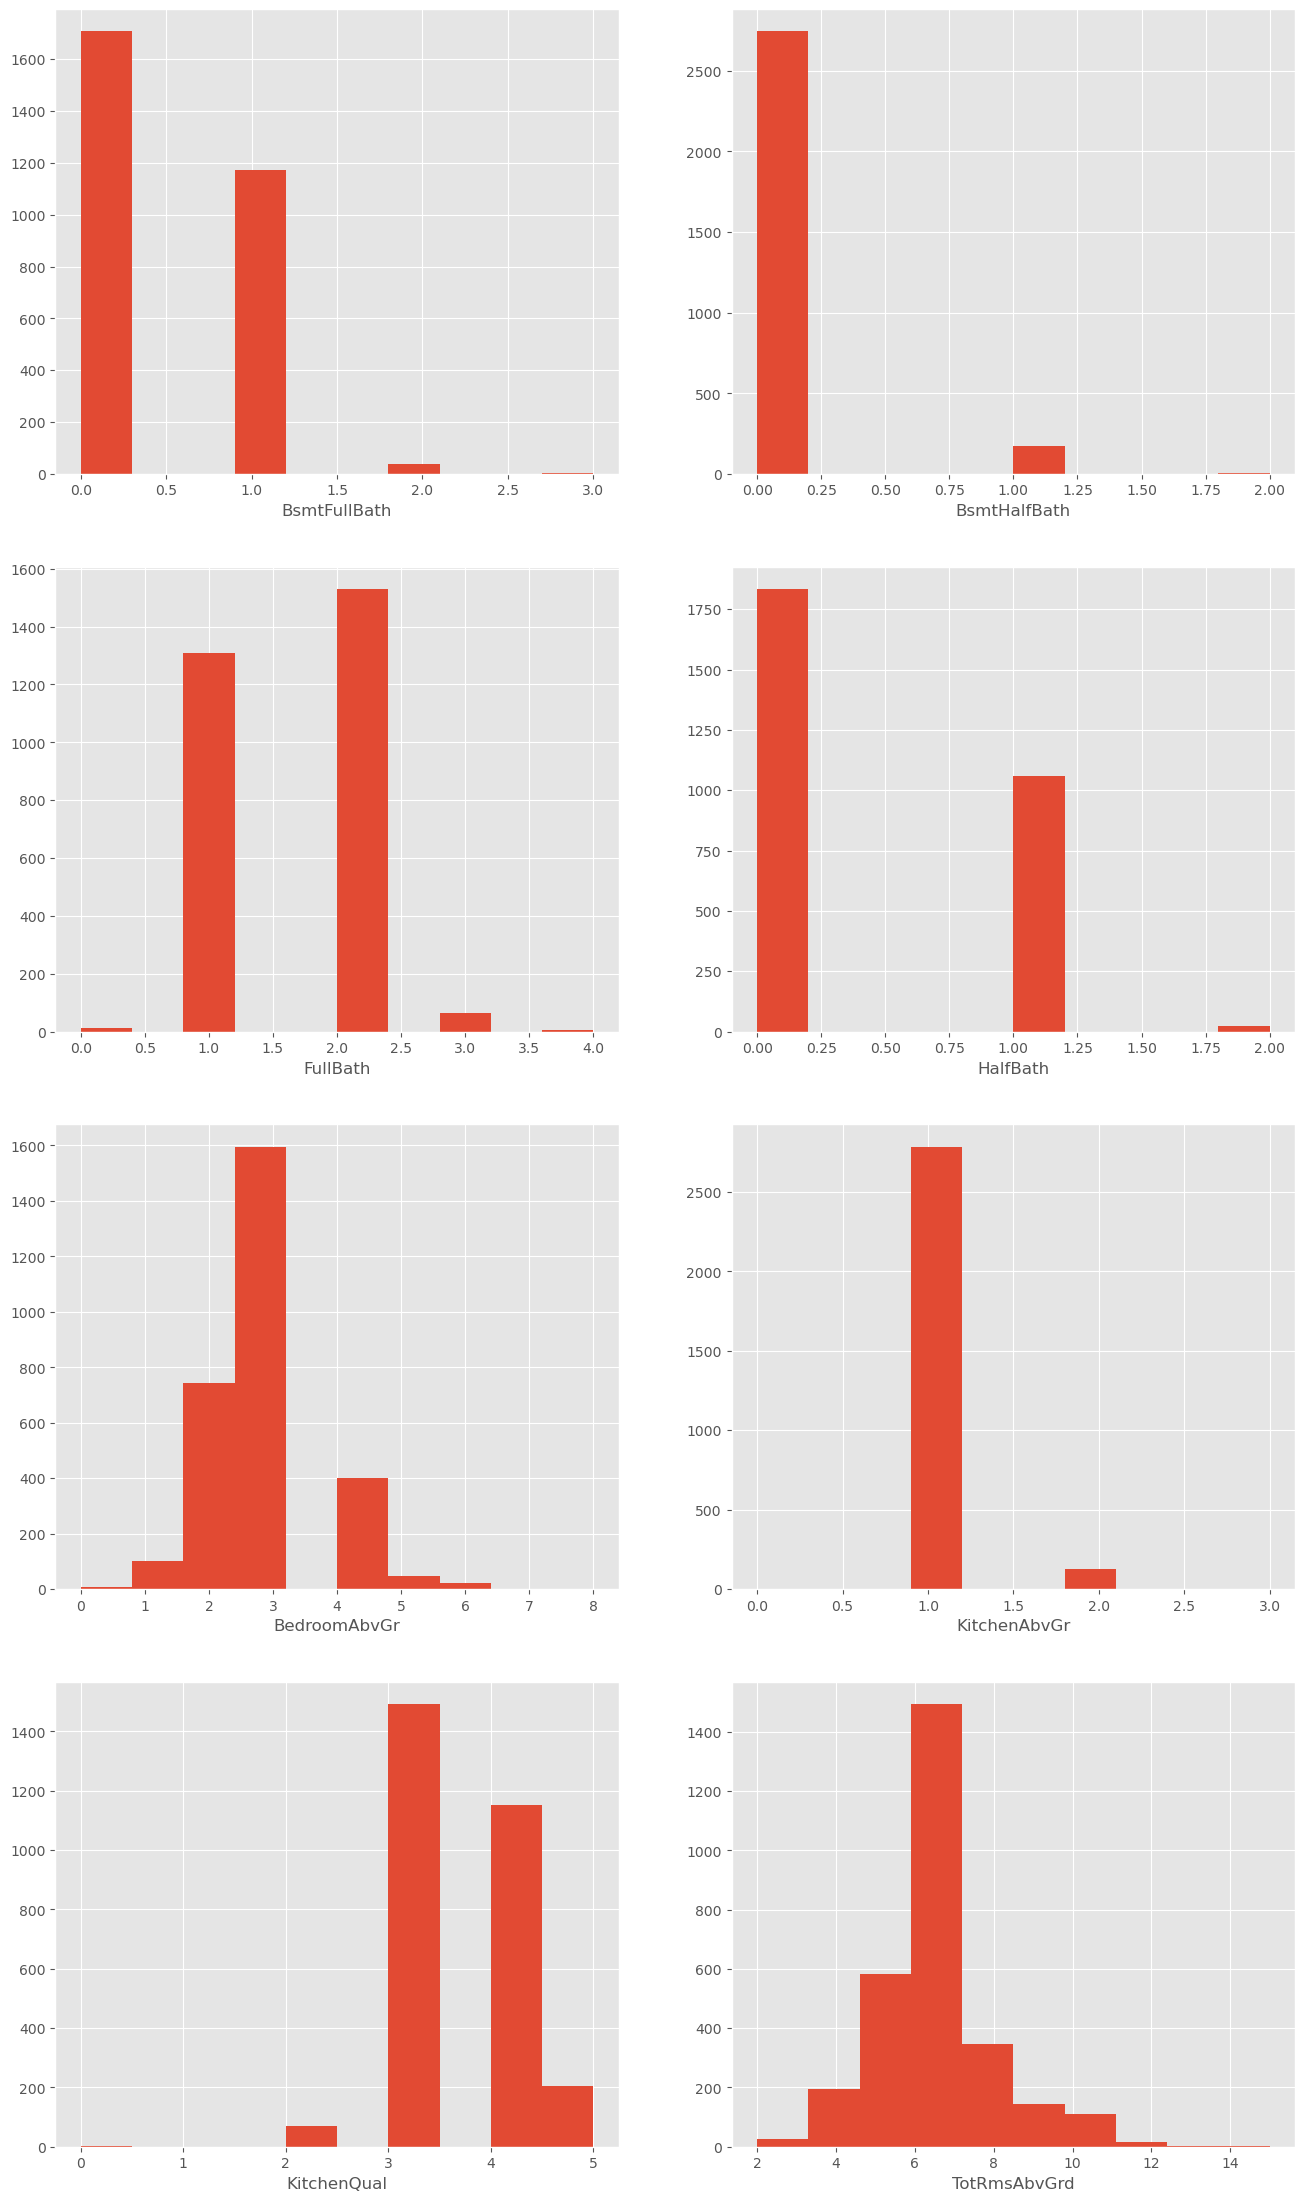

In [238]:
cols = ['BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','KitchenQual','TotRmsAbvGrd']
plot_dists(cols)

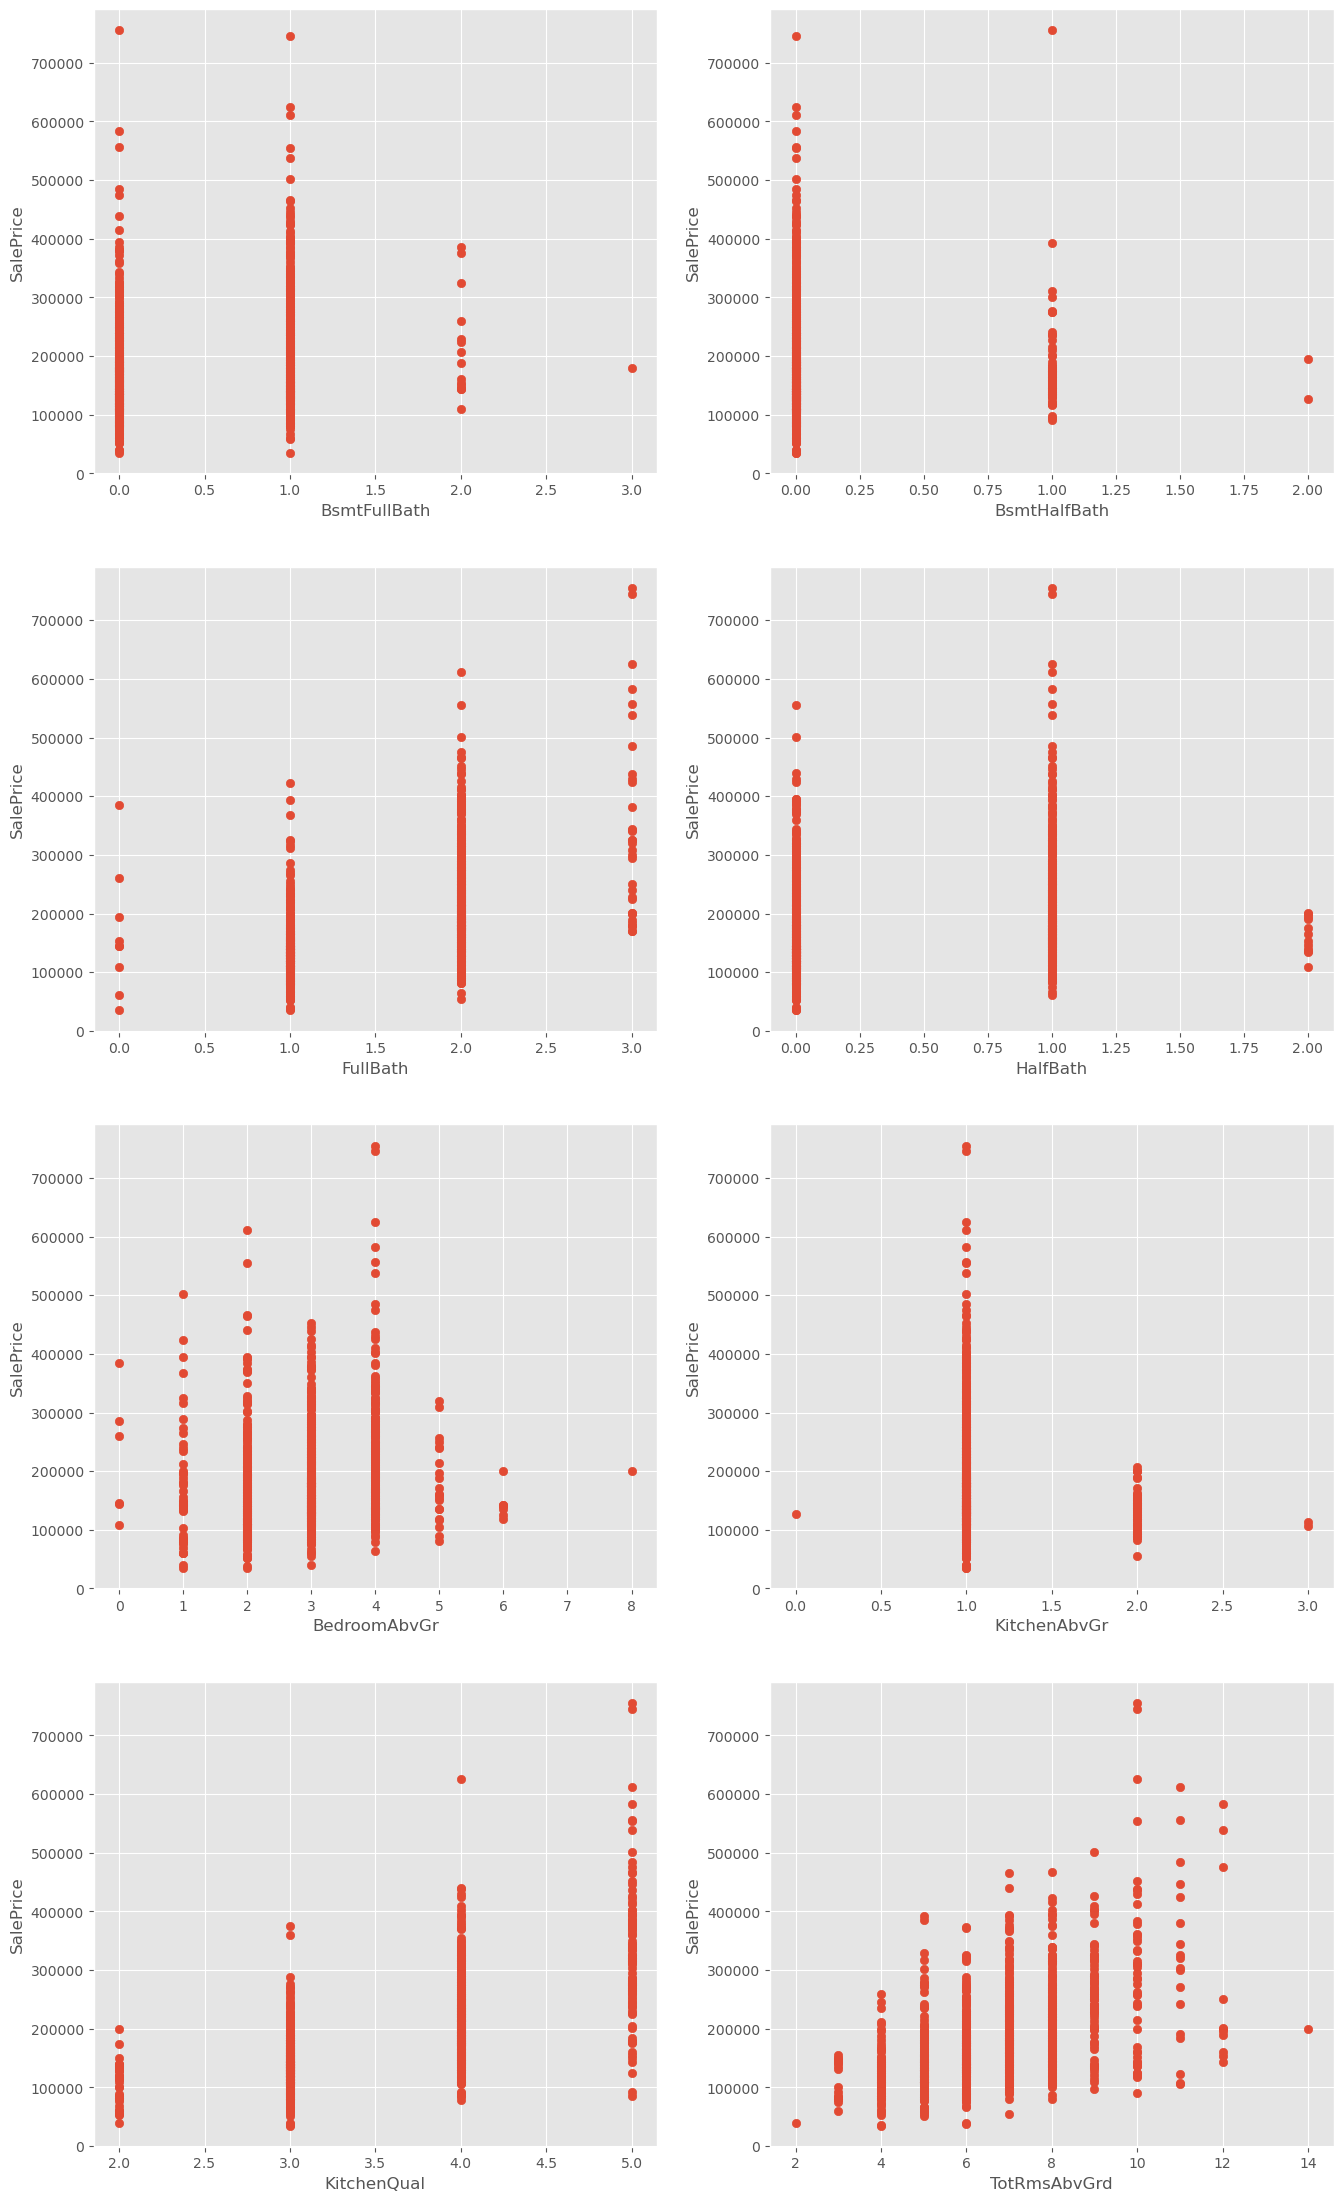

In [239]:
vs_price(cols)

Observations:
* Contrary to what we'd expect, even though TotRmsAbvGrd correlates positively with SalePrice, the number of different types of rooms in house--except for FullBath--don't. In fact, BsmtHalfBath and KitchenAbvGrd appear to have a negative correlation with SalePrice.
* Perhaps there's interaction between the number of different types of rooms, which makes sense, actually. Perhaps a house with too many bedrooms are lacking in other utilities, or a house with two half bathrooms has no full bathrooms, which decrease the price.
* But KitchenQual has a positive correlation with HousePrice.

I wonder if the size of the room (The total living area divided by number of rooms above ground) has an impact on the Price.

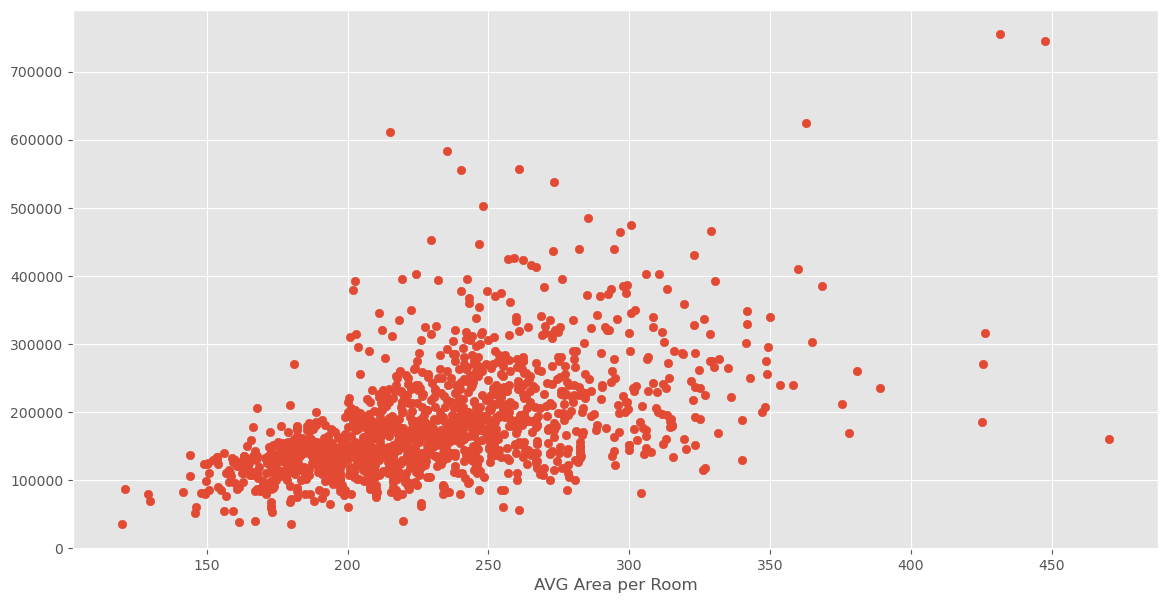

In [240]:
plt.figure(figsize=(14,7))
plt.scatter(df['GrLivArea']/df['TotRmsAbvGrd'], df['SalePrice'])
plt.xlabel('AVG Area per Room')
plt.show()

The above shows a positive correlation between the average room size and the house price. I guess that makes sense, considering more expensive houses typically have more rooms. I'll make this a new variable.

In [241]:
df['AvgRmSize'] = df['GrLivArea']/df['TotRmsAbvGrd']

I wonder if the percentage of rooms belonging to a specific type has an impact on the price. For example, maybe bedroom-heavy houses sell more than bathroom-heavy houses? It appears that for all specific room types, the higher percentage they occupy out of the total number of rooms above ground, the lower the price was. 

I also made variables out of them.

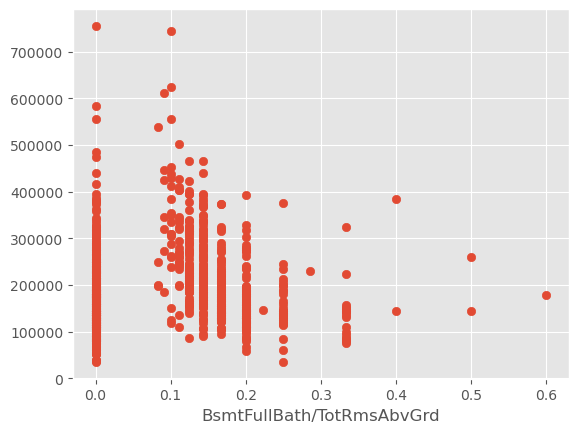

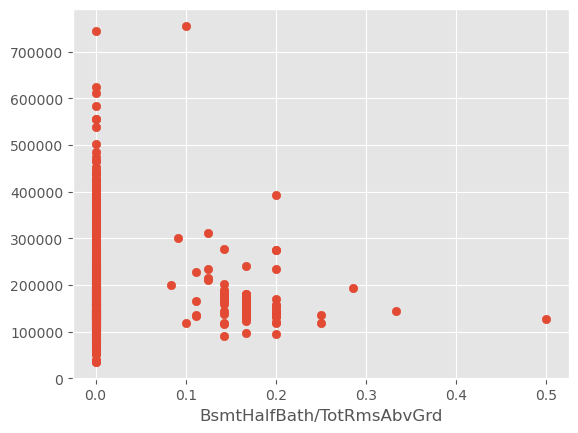

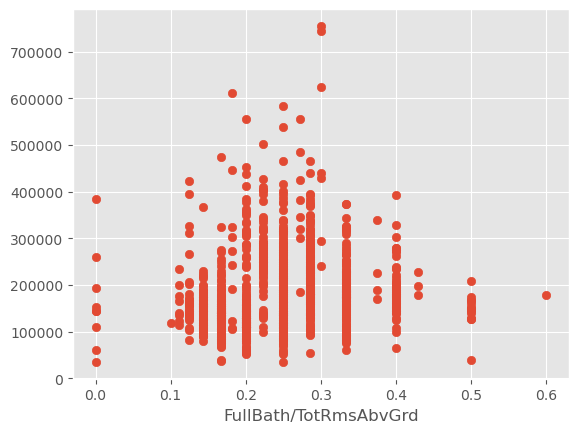

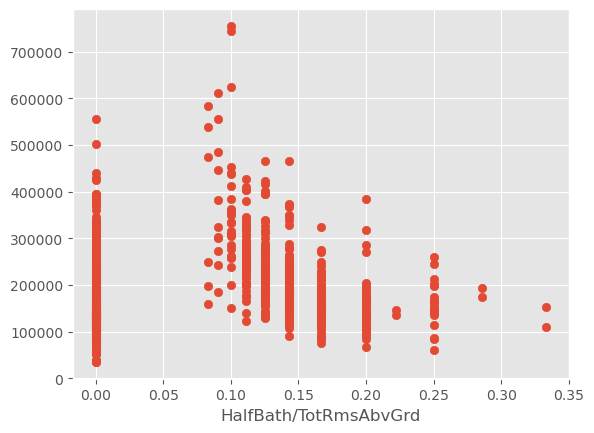

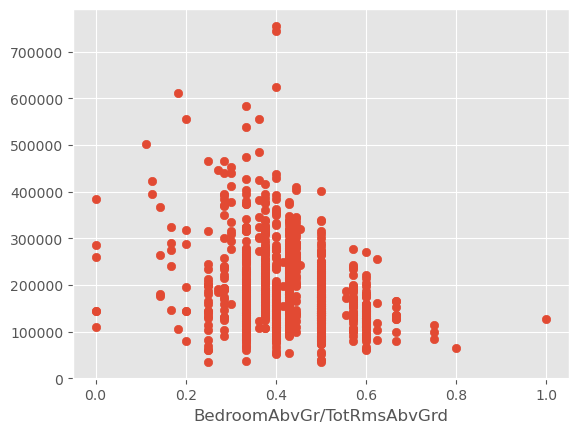

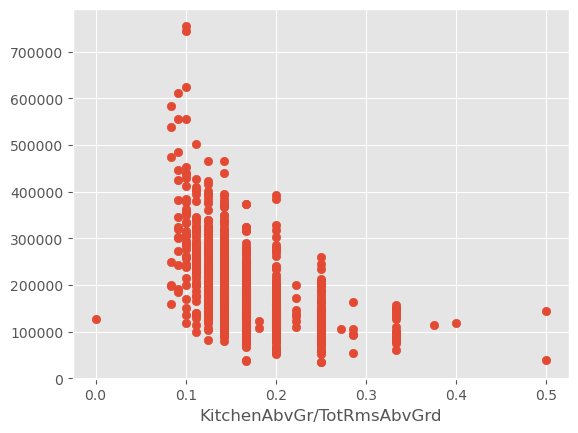

In [242]:
for x in ['BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr']:
    plt.scatter(df[x]/df['TotRmsAbvGrd'], df['SalePrice'])
    plt.xlabel(x+'/TotRmsAbvGrd')
    plt.show()

# Miscellaneous Functions

In [243]:
for col in ['FireplaceQu','PoolQC']:
    df[col] = df[col].map(excellency_d)

/tmp/ipykernel_103485/2017967103.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(n_rows,2,i+1)


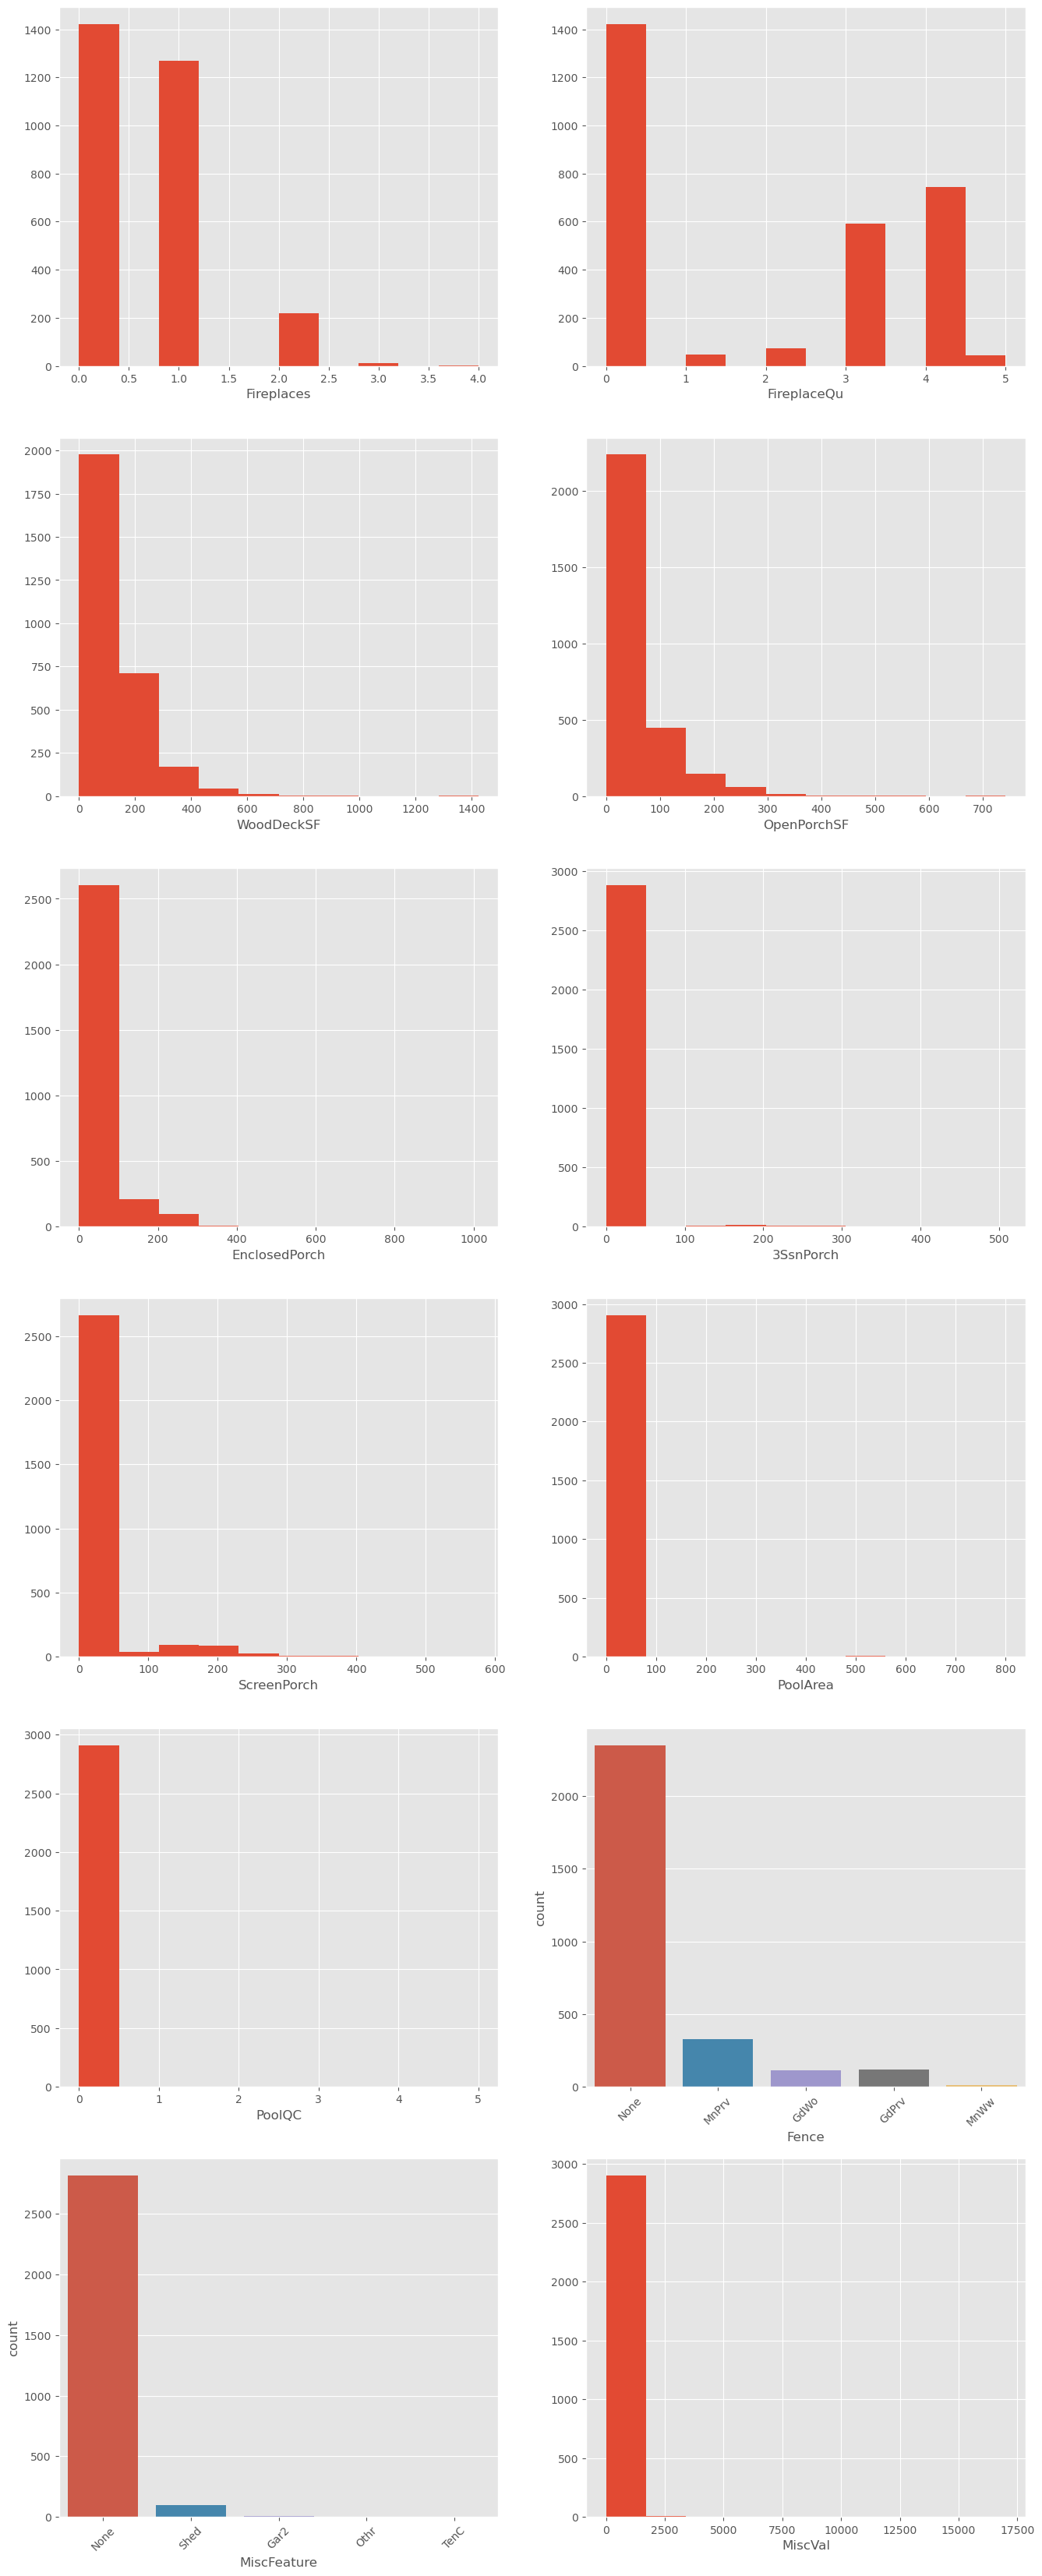

In [244]:
cols = ['Fireplaces','FireplaceQu','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','PoolQC','Fence','MiscFeature','MiscVal']
plot_dists(cols)

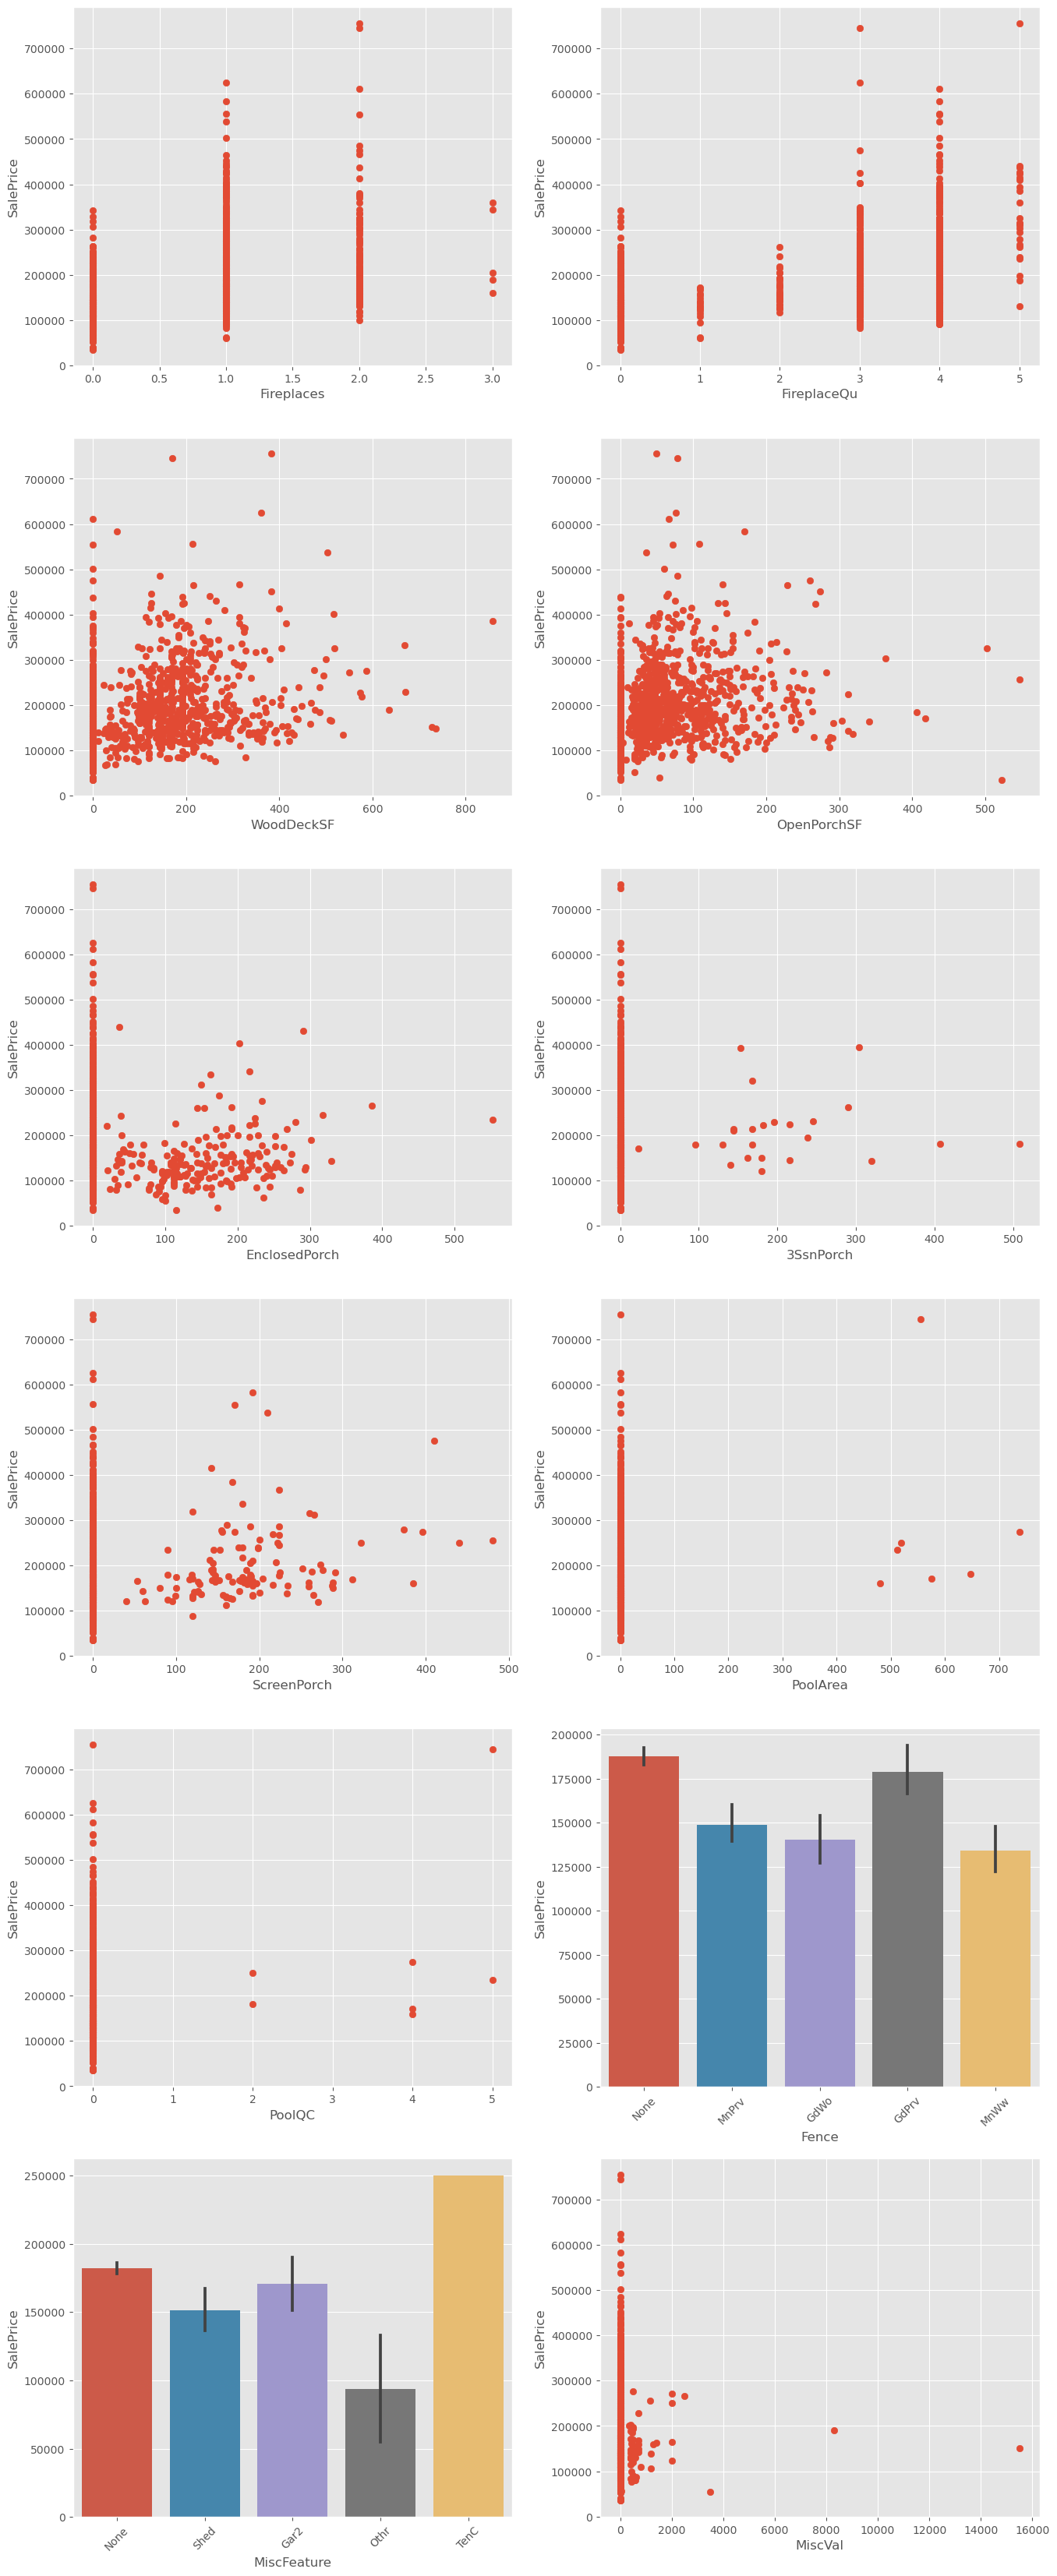

In [245]:
vs_price(cols)

Observations:
* It seems that PoolQC, MiscVal, ScreenPorch, EnclosedPorch, 3ssnPorch and PoolArea doesn't have an impact on the house price.
* In MiscFeature, Othr is the lowest with a high error bar.
* Both WoodDeckSF and OpenPorchSF have a positive correlation with SalePrice.
* Fireplaces and FireplaceQu have a correlation with SalePrice.
* In Fences, None and GdPrv have a higher price than the rest, but between them there is no difference.

For a good chunk of the variables, it just doesn't seem like there's enough non-0 data to draw a conclusive decision,

# Converting to Final Train /  Test Data

After doing all of this analysis, let's split this into training and testing data and save them.

In [246]:
df = pd.get_dummies(df).astype('float64')

In [265]:
df_train = df[df['train_test_train']==1].drop(['train_test_train'],axis=1)
df_test = df[df['train_test_test']==1].drop(['train_test_test','SalePrice'],axis=1)
df_train.to_csv('./Interim Data/cleaned_train.csv',index=False)
df_test.to_csv('./Interim Data/cleaned_test.csv',index=False)


## Statistical Analysis
#### Generating Summary
Next, we're going to take a numerical look at all the variables' relationship with our target variable. As we have almost 300 columns, it'd not be realistic to do individual regression analyses on all of them one by one.

In the below table, I extracted the summary statistics in the .describe() method, as well as some other relevant information pertaining to the variable's relation with SalePrice.

In [271]:
def extract_stat(col):
    print(col)
    table = pd.DataFrame(df_train[col].describe()).T
    table['kurt'] = df_train[col].kurt()
    table['skew'] = df_train[col].skew()
    f, p = stats.normaltest(df_train[col])
    if p > 0.05:
        table['IsNormal'] = True
    else:
        table['IsNormal'] = False
    slope, intercept, r_value, p_value, std_err = stats.linregress(df_train[col], df_train['SalePrice'])
    table['r^2'] = r_value**2
    table['slope'] = slope
    table['intercept'] = intercept
    table['p_value'] = p_value
    table['IsSignificant'] = p_value < 0.05
    return table
    
dfs = [extract_stat(col) for col in df_train.columns]
num_summary = pd.concat(dfs)
num_summary = num_summary.sort_values('r^2', ascending=False)

index
Norm
Feedr
PosN
Artery
RRAe
RRNn
RRAn
PosA
RRNe
Id
LotFrontage
LotArea
LotShape
LandSlope
OverallQual
OverallCond
YearBuilt
YearRemodAdd
MasVnrArea
ExterQual
ExterCond
BsmtQual
BsmtCond
BsmtExposure
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
HeatingQC
CentralAir
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
KitchenQual
TotRmsAbvGrd
Functional
Fireplaces
FireplaceQu
GarageYrBlt
GarageCars
GarageArea
GarageQual
GarageCond
PavedDrive
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
PoolQC
MiscVal
SalePrice
HasGarage
DiffHouseGarageYrs
HasLowGarageDiff
Has2ndFlr
HasLowQualSF
HasVnrArea
NumBsmtFinType
Bsmt_ALQ_Area
Bsmt_BLQ_Area
Bsmt_GLQ_Area
Bsmt_LwQ_Area
Bsmt_Rec_Area
IsAvgGCond
IsAvgGQual
AvgRmSize
MSSubClass_120
MSSubClass_150


ValueError: Cannot calculate a linear regression if all x values are identical

In [260]:
pd.set_option('display.max_rows', None)
num_summary

count           mean           std      min  \
index                       2919.0     729.250086    421.393596      0.0   
Norm                        2919.0       0.860226      0.346812      0.0   
Feedr                       2919.0       0.060637      0.244380      0.0   
PosN                        2919.0       0.014731      0.131380      0.0   
Artery                      2919.0       0.033231      0.183052      0.0   
RRAe                        2919.0       0.009935      0.099195      0.0   
RRNn                        2919.0       0.003768      0.061282      0.0   
RRAn                        2919.0       0.017472      0.131043      0.0   
PosA                        2919.0       0.008222      0.101061      0.0   
RRNe                        2919.0       0.002055      0.045299      0.0   
Id                          2919.0    1460.000000    842.787043      1.0   
LotFrontage                 2919.0      57.766701     33.481636      0.0   
LotArea                     2919.0   10168.114080   7886.996359   1300.0   
LotShape                    2919.0       0.400137      0.570175      0.0   
LandSlope                   2919.0       0.053786      0.248750      0.0   
OverallQual                 2919.0       6.089072      1.409947      1.0   
OverallCond                 2919.0       5.564577      1.113131      1.0   
YearBuilt                   2919.0    1971.312778     30.291442   1872.0   
YearRemodAdd                2919.0    1984.264474     20.894344   1950.0   
MasVnrArea                  2919.0     101.396026    178.854579      0.0   
ExterQual                   2919.0       3.396711      0.580293      2.0   
ExterCond                   2919.0       3.085646      0.372361      1.0   
BsmtQual                    2919.0       3.477561      0.905448      0.0   
BsmtCond                    2919.0       2.918465      0.574950      0.0   
BsmtExposure                2919.0       1.623844      1.070026      0.0   
BsmtFinSF1                  2919.0     441.272011    455.606014      0.0   
BsmtFinSF2                  2919.0      49.565262    169.179104      0.0   
BsmtUnfSF                   2919.0     560.579993    439.590889      0.0   
TotalBsmtSF                 2919.0    1051.417266    441.120498      0.0   
HeatingQC                   2919.0       4.151764      0.957952      1.0   
CentralAir                  2919.0       0.932854      0.250318      0.0   
1stFlrSF                    2919.0    1159.581706    392.362079    334.0   
2ndFlrSF                    2919.0     336.483727    428.701456      0.0   
LowQualFinSF                2919.0       4.694416     46.396825      0.0   
GrLivArea                   2919.0    1500.759849    506.051045    334.0   
BsmtFullBath                2919.0       0.429599      0.524676      0.0   
BsmtHalfBath                2919.0       0.061322      0.245608      0.0   
FullBath                    2919.0       1.568003      0.552969      0.0   
HalfBath                    2919.0       0.380267      0.502872      0.0   
BedroomAbvGr                2919.0       2.860226      0.822693      0.0   
KitchenAbvGr                2919.0       1.044536      0.214462      0.0   
KitchenQual                 2919.0       3.509764      0.665273      0.0   
TotRmsAbvGrd                2919.0       6.451524      1.569379      2.0   
Functional                  2919.0       0.151764      0.639613      0.0   
Fireplaces                  2919.0       0.597122      0.646129      0.0   
FireplaceQu                 2919.0       1.768071      1.806619      0.0   
GarageYrBlt                 2919.0    1976.253854     27.040351   1872.0   
GarageCars                  2919.0       1.766016      0.762196      0.0   
GarageArea                  2919.0     472.712573    215.535686      0.0   
GarageQual                  2919.0       2.800959      0.715863      0.0   
GarageCond                  2919.0       2.808839      0.712498      0.0   
PavedDrive                  2919.0       0.915382      0.268649      0.0   
W

There's a few observations to be made about the above analysis:
1. 7 of the 50 columns are not significant with an alpha of 0.05 (5e^-2)
2. The variables vary large in scale. Our target variable (SalePrice) spans across hundreds of thousands, while variables like BedroomAbvGr and KitchenAbvGr only have single digits. 
3. None of the columns are normal.

In [250]:
#Let's save this really quick, so we can refer back to this later.
num_summary.to_csv(r'./Interim Data/summary.csv', index=False)

#### Visualizing Intercorrelations

Next, we're going to look for any notable intercorrelations among our variables. While intercorrelation won't have an impact on the error of the regression itself, and we won't be able to completely eliminate it, it is still helpful to be aware.

As mentioned, it's not going to be helpful to look at 200+ columns via a heatmap. Thus, I'm going to find the correlation matrix and examine the most notable observations that way.

I'm not going to go into every single one of these many intercorrelations, but I will take the correlation matrix and examine the most notable intercorrelations. As I mentioned before, I might or might not remove some of these variables, but it's good to be aware.

In [251]:
correlations = pd.melt(df.corr(),id_vars=['index'])
correlations.to_csv('./Interim Data/multicollinearities.csv',index=False)

In [252]:
correlations[correlations.value<1].sort_values('value').head(20)

index           variable     value
20070  0.003971          HasGarage -1.000000
69240 -0.003971  GarageFinish_None -1.000000
32536 -0.005960        Street_Pave -1.000000
84662  0.000593    train_test_test -1.000000
32206  0.005960        Street_Grvl -1.000000
84992 -0.000593   train_test_train -1.000000
20068  0.002828          HasGarage -0.993331
68578 -0.003971    GarageType_None -0.993331
73039  0.029641   MiscFeature_Shed -0.949504
72379 -0.036433   MiscFeature_None -0.949504
69229 -0.011055  GarageFinish_None -0.946372
16429  0.003971         GarageCond -0.946372
16427  0.002828         GarageCond -0.940060
68567 -0.011055    GarageType_None -0.940060
51459 -0.011516      RoofStyle_Hip -0.939469
50799  0.015048    RoofStyle_Gable -0.939469
16098  0.003971         GarageQual -0.939281
69228 -0.011859  GarageFinish_None -0.939281
22029  0.028870     NumBsmtFinType -0.937395
60309 -0.032969   BsmtFinType1_Unf -0.937395

In [ ]:
def extract_stat(col):
    table = pd.DataFrame(df[col].describe()).T
    table['kurt'] = df[col].kurt()
    table['skew'] = df[col].skew()
    f, p = stats.normaltest(df[col])
    if p > 0.05:
        table['IsNormal'] = True
    else:
        table['IsNormal'] = False
    slope, intercept, r_value, p_value, std_err = stats.linregress(df[col], df['SalePrice'])
    table['r^2'] = r_value**2
    table['slope'] = slope
    table['intercept'] = intercept
    table['p_value'] = p_value
    table['IsSignificant'] = p_value < 0.05
    return table
    
dfs = [extract_stat(col) for col in df.columns]
num_summary = pd.concat(dfs)
num_summary = num_summary.sort_values('r^2', ascending=False)

In [274]:
df_train['MSSubClass_150'].unique()

array([0.])

In [270]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df_train[col], df_train['SalePrice'])

In [263]:
df_train['SalePrice'].unique()

array([208500., 181500., 223500., 140000., 250000., 143000., 307000.,
       200000., 129900., 118000., 129500., 345000., 144000., 279500.,
       157000., 132000., 149000.,  90000., 159000., 139000., 325300.,
       139400., 230000., 154000., 256300., 134800., 306000., 207500.,
        68500.,  40000., 149350., 179900., 165500., 277500., 309000.,
       145000., 153000., 109000.,  82000., 160000., 170000., 130250.,
       141000., 319900., 239686., 249700., 113000., 127000., 177000.,
       114500., 110000., 385000., 130000., 180500., 172500., 196500.,
       438780., 124900., 158000., 101000., 202500., 219500., 317000.,
       180000., 226000.,  80000., 225000., 244000., 185000., 144900.,
       107400.,  91000., 135750., 136500., 193500., 153500., 245000.,
       126500., 168500., 260000., 174000., 164500.,  85000., 123600.,
       109900.,  98600., 163500., 133900., 204750., 214000.,  94750.,
        83000., 128950., 205000., 178000., 118964., 198900., 169500.,
       100000., 1150